In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date


import gower
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [9]:
#VERIFICADO inconsistencia ou erro nos dados, entre clientID e data de nascimento, verificar na tabela fonte
#VERIFICADO se o tipo de todos os elementos de uma coluna são iguais
#As compras presenciais devem ser feitas por clientes cadastrados somente naquela loja?

#desconto pela quantidade, OBS:Só existem 2 valores de descontos
#disconto pelo preço, existem descontos aplicados em todos os produtos

#NÃO FOI VERIFICADO SE O DESCONTO MAIOR TEM A VER COM ÉPOCAS DE BAIXA VENDA

In [10]:
#AS FUNÇÕES UTILIZADAS ESTÃO NO FINAL, EXECUTA-LAS ANTES DE CHAMA-LAS
# As CONCLUSÕES MAIS SIGNIFICATIVAS ESTÃO PLOTADAS

# Carregando os dados

In [32]:
data = pd.read_csv(r"Base de Dados - Questionário.xlsx - Sheet1 - Copia.csv",sep=',')
data

,Unnamed: 0,Unnamed: 1,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019
...,...,...,...,...,...,...,...,...,...,...
32748,NaN,NaN,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018
32749,NaN,NaN,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019
32751,NaN,NaN,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019


In [62]:
data['Quantity'].sum()

34674

# Verificando se há linhas duplicadas

In [33]:
data.drop_duplicates()

,Unnamed: 0,Unnamed: 1,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019
...,...,...,...,...,...,...,...,...,...,...
32748,NaN,NaN,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018
32749,NaN,NaN,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019
32751,NaN,NaN,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019


# Verificando se há alguma correlação direta entre os dados

In [34]:
data.corr()

,Unnamed: 0,Unnamed: 1,ClientID,Quantity,StoreID
Unnamed: 0,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,NaN,NaN
ClientID,NaN,NaN,1.000000,-0.009241,0.148303
Quantity,NaN,NaN,-0.009241,1.000000,0.000788
StoreID,NaN,NaN,0.148303,0.000788,1.000000


In [35]:
data1 = pd.read_csv(r"Base de Dados - Questionário.xlsx - Sheet2.csv",sep=',')
data1

,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
...,...,...,...
68,0030e635639c898b323826589761cf233,Rick Morty,G
69,003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons,P
70,003128f981470c3e5a2e7445e4a771cd2,Homer Simpsons,M
71,003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons,G


In [36]:
data1['ID'].unique().size

73

In [37]:
data1['Size'].unique().size

4

# Verificando se não tem algum nome digitado incorretamente provocando diferenciação

In [38]:
data1['Name'].sort_values().unique()

array(['BIXDream', 'Batman', 'Bazinga', 'Capitã Marvel',
       'Capitão América', 'Ciclope', 'Coringa', 'Darth Vader', 'Deadpool',
       'Dragon Ball Z', 'Flash', 'Homer Simpsons', 'Iron Man',
       'League Legends', 'Mulher-Maravilha', 'Naruto', 'Pantera Negra',
       'Pokemon Go Squirtle', 'Rick Morty', 'Super Mario', 'Tempestade',
       'Thanos', 'Thor', 'Wolverine'], dtype=object)

In [39]:
data1[data1['ID'] == '00066f42aeeb9f3007548bb9d3f33c382']['Size'][1]

'M'

In [40]:
contador = 0
dicionario_data_aux = {}
for j in data1['ID'].unique():
    dicionario_data_aux[j] = (data1[data1['ID'] == j]['Name'][contador])+' '+(data1[data1['ID'] == j]['Size'][contador])
    contador += 1
dicionario_data_aux1 = pd.Series(dicionario_data_aux)
dicionario_data_aux1 = pd.DataFrame(dicionario_data_aux1)
dicionario_data_aux1

,0
00066f42aeeb9f3007548bb9d3f33c381,Capitão América P
00066f42aeeb9f3007548bb9d3f33c382,Capitão América M
00066f42aeeb9f3007548bb9d3f33c383,Capitão América G
00088930e925c41fd95ebfe695fd26551,Thor P
00088930e925c41fd95ebfe695fd26552,Thor M
...,...
0030e635639c898b323826589761cf233,Rick Morty G
003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons P
003128f981470c3e5a2e7445e4a771cd2,Homer Simpsons M
003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons G


In [41]:
dicionario_data_aux1[0].unique().size

73

In [42]:
data2 = pd.read_csv(r"Base de Dados - Questionário.xlsx - Sheet3.csv",sep=',')
data2

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,6/28/1985,Homem
1,14002,Florianópolis,SC,1/10/1987,Homem
2,14003,Rio de Janeiro,RJ,11/5/1979,Homem
3,14004,Rio de Janeiro,RJ,11/25/1983,Mulher
4,14005,Florianópolis,SC,4/7/1969,Homem
...,...,...,...,...,...
13645,28689,Belo Horizonte,MG,1/15/1999,Homem
13646,28691,Belo Horizonte,BH,2/7/1956,Homem
13647,28692,Porto Alegre,RS,10/19/1985,Homem
13648,28694,Curitiba,PR,10/22/1982,Homem


In [43]:
data2['ID'].unique().size

13650

In [44]:
data3 = pd.read_csv(r"Base de Dados - Questionário.xlsx - Sheet4.csv",sep=',')
data3

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


# Completando a primeira tabela com os dados da segunda, usando busca do tipo arvore

In [49]:
data2['ID'] = data2['ID'].sort_values( 
                          axis=0, 
                          ascending=True, 
                          inplace=False, 
                          kind='quicksort', 
                          na_position='last', 
                          ignore_index=False)
data_aux = pd.DataFrame()
for j in range(len(data)):
    print(round( (j/data.shape[0]*100), 2 ), '% concluido')
    aux = busca_arvore(data2['ID'], data['ClientID'][j])
    data_aux = pd.concat([data_aux,data2[aux:aux + 1]])
data_aux

0.0 % concluido
0.0 % concluido
0.01 % concluido
0.01 % concluido
0.01 % concluido
0.02 % concluido
0.02 % concluido
0.02 % concluido
0.02 % concluido
0.03 % concluido
0.03 % concluido
0.03 % concluido
0.04 % concluido
0.04 % concluido
0.04 % concluido
0.05 % concluido
0.05 % concluido
0.05 % concluido
0.05 % concluido
0.06 % concluido
0.06 % concluido
0.06 % concluido
0.07 % concluido
0.07 % concluido
0.07 % concluido
0.08 % concluido
0.08 % concluido
0.08 % concluido
0.09 % concluido
0.09 % concluido
0.09 % concluido
0.09 % concluido
0.1 % concluido
0.1 % concluido
0.1 % concluido
0.11 % concluido
0.11 % concluido
0.11 % concluido
0.12 % concluido
0.12 % concluido
0.12 % concluido
0.13 % concluido
0.13 % concluido
0.13 % concluido
0.13 % concluido
0.14 % concluido
0.14 % concluido
0.14 % concluido
0.15 % concluido
0.15 % concluido
0.15 % concluido
0.16 % concluido
0.16 % concluido
0.16 % concluido
0.16 % concluido
0.17 % concluido
0.17 % concluido
0.17 % concluido
0.18 % concluido
0.

1.55 % concluido
1.56 % concluido
1.56 % concluido
1.56 % concluido
1.57 % concluido
1.57 % concluido
1.57 % concluido
1.58 % concluido
1.58 % concluido
1.58 % concluido
1.58 % concluido
1.59 % concluido
1.59 % concluido
1.59 % concluido
1.6 % concluido
1.6 % concluido
1.6 % concluido
1.61 % concluido
1.61 % concluido
1.61 % concluido
1.62 % concluido
1.62 % concluido
1.62 % concluido
1.62 % concluido
1.63 % concluido
1.63 % concluido
1.63 % concluido
1.64 % concluido
1.64 % concluido
1.64 % concluido
1.65 % concluido
1.65 % concluido
1.65 % concluido
1.65 % concluido
1.66 % concluido
1.66 % concluido
1.66 % concluido
1.67 % concluido
1.67 % concluido
1.67 % concluido
1.68 % concluido
1.68 % concluido
1.68 % concluido
1.69 % concluido
1.69 % concluido
1.69 % concluido
1.69 % concluido
1.7 % concluido
1.7 % concluido
1.7 % concluido
1.71 % concluido
1.71 % concluido
1.71 % concluido
1.72 % concluido
1.72 % concluido
1.72 % concluido
1.73 % concluido
1.73 % concluido
1.73 % concluido
1.7

3.14 % concluido
3.14 % concluido
3.15 % concluido
3.15 % concluido
3.15 % concluido
3.16 % concluido
3.16 % concluido
3.16 % concluido
3.17 % concluido
3.17 % concluido
3.17 % concluido
3.18 % concluido
3.18 % concluido
3.18 % concluido
3.18 % concluido
3.19 % concluido
3.19 % concluido
3.19 % concluido
3.2 % concluido
3.2 % concluido
3.2 % concluido
3.21 % concluido
3.21 % concluido
3.21 % concluido
3.21 % concluido
3.22 % concluido
3.22 % concluido
3.22 % concluido
3.23 % concluido
3.23 % concluido
3.23 % concluido
3.24 % concluido
3.24 % concluido
3.24 % concluido
3.25 % concluido
3.25 % concluido
3.25 % concluido
3.25 % concluido
3.26 % concluido
3.26 % concluido
3.26 % concluido
3.27 % concluido
3.27 % concluido
3.27 % concluido
3.28 % concluido
3.28 % concluido
3.28 % concluido
3.29 % concluido
3.29 % concluido
3.29 % concluido
3.29 % concluido
3.3 % concluido
3.3 % concluido
3.3 % concluido
3.31 % concluido
3.31 % concluido
3.31 % concluido
3.32 % concluido
3.32 % concluido
3.3

4.64 % concluido
4.65 % concluido
4.65 % concluido
4.65 % concluido
4.66 % concluido
4.66 % concluido
4.66 % concluido
4.67 % concluido
4.67 % concluido
4.67 % concluido
4.67 % concluido
4.68 % concluido
4.68 % concluido
4.68 % concluido
4.69 % concluido
4.69 % concluido
4.69 % concluido
4.7 % concluido
4.7 % concluido
4.7 % concluido
4.7 % concluido
4.71 % concluido
4.71 % concluido
4.71 % concluido
4.72 % concluido
4.72 % concluido
4.72 % concluido
4.73 % concluido
4.73 % concluido
4.73 % concluido
4.74 % concluido
4.74 % concluido
4.74 % concluido
4.74 % concluido
4.75 % concluido
4.75 % concluido
4.75 % concluido
4.76 % concluido
4.76 % concluido
4.76 % concluido
4.77 % concluido
4.77 % concluido
4.77 % concluido
4.78 % concluido
4.78 % concluido
4.78 % concluido
4.78 % concluido
4.79 % concluido
4.79 % concluido
4.79 % concluido
4.8 % concluido
4.8 % concluido
4.8 % concluido
4.81 % concluido
4.81 % concluido
4.81 % concluido
4.81 % concluido
4.82 % concluido
4.82 % concluido
4.82

6.14 % concluido
6.14 % concluido
6.14 % concluido
6.15 % concluido
6.15 % concluido
6.15 % concluido
6.16 % concluido
6.16 % concluido
6.16 % concluido
6.16 % concluido
6.17 % concluido
6.17 % concluido
6.17 % concluido
6.18 % concluido
6.18 % concluido
6.18 % concluido
6.19 % concluido
6.19 % concluido
6.19 % concluido
6.19 % concluido
6.2 % concluido
6.2 % concluido
6.2 % concluido
6.21 % concluido
6.21 % concluido
6.21 % concluido
6.22 % concluido
6.22 % concluido
6.22 % concluido
6.23 % concluido
6.23 % concluido
6.23 % concluido
6.23 % concluido
6.24 % concluido
6.24 % concluido
6.24 % concluido
6.25 % concluido
6.25 % concluido
6.25 % concluido
6.26 % concluido
6.26 % concluido
6.26 % concluido
6.27 % concluido
6.27 % concluido
6.27 % concluido
6.27 % concluido
6.28 % concluido
6.28 % concluido
6.28 % concluido
6.29 % concluido
6.29 % concluido
6.29 % concluido
6.3 % concluido
6.3 % concluido
6.3 % concluido
6.3 % concluido
6.31 % concluido
6.31 % concluido
6.31 % concluido
6.32

7.84 % concluido
7.85 % concluido
7.85 % concluido
7.85 % concluido
7.86 % concluido
7.86 % concluido
7.86 % concluido
7.86 % concluido
7.87 % concluido
7.87 % concluido
7.87 % concluido
7.88 % concluido
7.88 % concluido
7.88 % concluido
7.89 % concluido
7.89 % concluido
7.89 % concluido
7.9 % concluido
7.9 % concluido
7.9 % concluido
7.9 % concluido
7.91 % concluido
7.91 % concluido
7.91 % concluido
7.92 % concluido
7.92 % concluido
7.92 % concluido
7.93 % concluido
7.93 % concluido
7.93 % concluido
7.94 % concluido
7.94 % concluido
7.94 % concluido
7.94 % concluido
7.95 % concluido
7.95 % concluido
7.95 % concluido
7.96 % concluido
7.96 % concluido
7.96 % concluido
7.97 % concluido
7.97 % concluido
7.97 % concluido
7.97 % concluido
7.98 % concluido
7.98 % concluido
7.98 % concluido
7.99 % concluido
7.99 % concluido
7.99 % concluido
8.0 % concluido
8.0 % concluido
8.0 % concluido
8.01 % concluido
8.01 % concluido
8.01 % concluido
8.01 % concluido
8.02 % concluido
8.02 % concluido
8.02

9.41 % concluido
9.41 % concluido
9.41 % concluido
9.42 % concluido
9.42 % concluido
9.42 % concluido
9.43 % concluido
9.43 % concluido
9.43 % concluido
9.43 % concluido
9.44 % concluido
9.44 % concluido
9.44 % concluido
9.45 % concluido
9.45 % concluido
9.45 % concluido
9.46 % concluido
9.46 % concluido
9.46 % concluido
9.46 % concluido
9.47 % concluido
9.47 % concluido
9.47 % concluido
9.48 % concluido
9.48 % concluido
9.48 % concluido
9.49 % concluido
9.49 % concluido
9.49 % concluido
9.5 % concluido
9.5 % concluido
9.5 % concluido
9.5 % concluido
9.51 % concluido
9.51 % concluido
9.51 % concluido
9.52 % concluido
9.52 % concluido
9.52 % concluido
9.53 % concluido
9.53 % concluido
9.53 % concluido
9.54 % concluido
9.54 % concluido
9.54 % concluido
9.54 % concluido
9.55 % concluido
9.55 % concluido
9.55 % concluido
9.56 % concluido
9.56 % concluido
9.56 % concluido
9.57 % concluido
9.57 % concluido
9.57 % concluido
9.57 % concluido
9.58 % concluido
9.58 % concluido
9.58 % concluido
9

10.84 % concluido
10.85 % concluido
10.85 % concluido
10.85 % concluido
10.86 % concluido
10.86 % concluido
10.86 % concluido
10.87 % concluido
10.87 % concluido
10.87 % concluido
10.88 % concluido
10.88 % concluido
10.88 % concluido
10.88 % concluido
10.89 % concluido
10.89 % concluido
10.89 % concluido
10.9 % concluido
10.9 % concluido
10.9 % concluido
10.91 % concluido
10.91 % concluido
10.91 % concluido
10.92 % concluido
10.92 % concluido
10.92 % concluido
10.92 % concluido
10.93 % concluido
10.93 % concluido
10.93 % concluido
10.94 % concluido
10.94 % concluido
10.94 % concluido
10.95 % concluido
10.95 % concluido
10.95 % concluido
10.95 % concluido
10.96 % concluido
10.96 % concluido
10.96 % concluido
10.97 % concluido
10.97 % concluido
10.97 % concluido
10.98 % concluido
10.98 % concluido
10.98 % concluido
10.99 % concluido
10.99 % concluido
10.99 % concluido
10.99 % concluido
11.0 % concluido
11.0 % concluido
11.0 % concluido
11.01 % concluido
11.01 % concluido
11.01 % concluid

12.44 % concluido
12.44 % concluido
12.44 % concluido
12.44 % concluido
12.45 % concluido
12.45 % concluido
12.45 % concluido
12.46 % concluido
12.46 % concluido
12.46 % concluido
12.47 % concluido
12.47 % concluido
12.47 % concluido
12.48 % concluido
12.48 % concluido
12.48 % concluido
12.48 % concluido
12.49 % concluido
12.49 % concluido
12.49 % concluido
12.5 % concluido
12.5 % concluido
12.5 % concluido
12.51 % concluido
12.51 % concluido
12.51 % concluido
12.51 % concluido
12.52 % concluido
12.52 % concluido
12.52 % concluido
12.53 % concluido
12.53 % concluido
12.53 % concluido
12.54 % concluido
12.54 % concluido
12.54 % concluido
12.55 % concluido
12.55 % concluido
12.55 % concluido
12.55 % concluido
12.56 % concluido
12.56 % concluido
12.56 % concluido
12.57 % concluido
12.57 % concluido
12.57 % concluido
12.58 % concluido
12.58 % concluido
12.58 % concluido
12.59 % concluido
12.59 % concluido
12.59 % concluido
12.59 % concluido
12.6 % concluido
12.6 % concluido
12.6 % concluid

13.93 % concluido
13.94 % concluido
13.94 % concluido
13.94 % concluido
13.95 % concluido
13.95 % concluido
13.95 % concluido
13.96 % concluido
13.96 % concluido
13.96 % concluido
13.97 % concluido
13.97 % concluido
13.97 % concluido
13.97 % concluido
13.98 % concluido
13.98 % concluido
13.98 % concluido
13.99 % concluido
13.99 % concluido
13.99 % concluido
14.0 % concluido
14.0 % concluido
14.0 % concluido
14.0 % concluido
14.01 % concluido
14.01 % concluido
14.01 % concluido
14.02 % concluido
14.02 % concluido
14.02 % concluido
14.03 % concluido
14.03 % concluido
14.03 % concluido
14.04 % concluido
14.04 % concluido
14.04 % concluido
14.04 % concluido
14.05 % concluido
14.05 % concluido
14.05 % concluido
14.06 % concluido
14.06 % concluido
14.06 % concluido
14.07 % concluido
14.07 % concluido
14.07 % concluido
14.08 % concluido
14.08 % concluido
14.08 % concluido
14.08 % concluido
14.09 % concluido
14.09 % concluido
14.09 % concluido
14.1 % concluido
14.1 % concluido
14.1 % concluido

15.51 % concluido
15.51 % concluido
15.52 % concluido
15.52 % concluido
15.52 % concluido
15.53 % concluido
15.53 % concluido
15.53 % concluido
15.53 % concluido
15.54 % concluido
15.54 % concluido
15.54 % concluido
15.55 % concluido
15.55 % concluido
15.55 % concluido
15.56 % concluido
15.56 % concluido
15.56 % concluido
15.56 % concluido
15.57 % concluido
15.57 % concluido
15.57 % concluido
15.58 % concluido
15.58 % concluido
15.58 % concluido
15.59 % concluido
15.59 % concluido
15.59 % concluido
15.6 % concluido
15.6 % concluido
15.6 % concluido
15.6 % concluido
15.61 % concluido
15.61 % concluido
15.61 % concluido
15.62 % concluido
15.62 % concluido
15.62 % concluido
15.63 % concluido
15.63 % concluido
15.63 % concluido
15.64 % concluido
15.64 % concluido
15.64 % concluido
15.64 % concluido
15.65 % concluido
15.65 % concluido
15.65 % concluido
15.66 % concluido
15.66 % concluido
15.66 % concluido
15.67 % concluido
15.67 % concluido
15.67 % concluido
15.67 % concluido
15.68 % conclu

16.99 % concluido
16.99 % concluido
17.0 % concluido
17.0 % concluido
17.0 % concluido
17.01 % concluido
17.01 % concluido
17.01 % concluido
17.02 % concluido
17.02 % concluido
17.02 % concluido
17.02 % concluido
17.03 % concluido
17.03 % concluido
17.03 % concluido
17.04 % concluido
17.04 % concluido
17.04 % concluido
17.05 % concluido
17.05 % concluido
17.05 % concluido
17.05 % concluido
17.06 % concluido
17.06 % concluido
17.06 % concluido
17.07 % concluido
17.07 % concluido
17.07 % concluido
17.08 % concluido
17.08 % concluido
17.08 % concluido
17.09 % concluido
17.09 % concluido
17.09 % concluido
17.09 % concluido
17.1 % concluido
17.1 % concluido
17.1 % concluido
17.11 % concluido
17.11 % concluido
17.11 % concluido
17.12 % concluido
17.12 % concluido
17.12 % concluido
17.13 % concluido
17.13 % concluido
17.13 % concluido
17.13 % concluido
17.14 % concluido
17.14 % concluido
17.14 % concluido
17.15 % concluido
17.15 % concluido
17.15 % concluido
17.16 % concluido
17.16 % concluid

18.5 % concluido
18.5 % concluido
18.5 % concluido
18.51 % concluido
18.51 % concluido
18.51 % concluido
18.51 % concluido
18.52 % concluido
18.52 % concluido
18.52 % concluido
18.53 % concluido
18.53 % concluido
18.53 % concluido
18.54 % concluido
18.54 % concluido
18.54 % concluido
18.54 % concluido
18.55 % concluido
18.55 % concluido
18.55 % concluido
18.56 % concluido
18.56 % concluido
18.56 % concluido
18.57 % concluido
18.57 % concluido
18.57 % concluido
18.58 % concluido
18.58 % concluido
18.58 % concluido
18.58 % concluido
18.59 % concluido
18.59 % concluido
18.59 % concluido
18.6 % concluido
18.6 % concluido
18.6 % concluido
18.61 % concluido
18.61 % concluido
18.61 % concluido
18.62 % concluido
18.62 % concluido
18.62 % concluido
18.62 % concluido
18.63 % concluido
18.63 % concluido
18.63 % concluido
18.64 % concluido
18.64 % concluido
18.64 % concluido
18.65 % concluido
18.65 % concluido
18.65 % concluido
18.65 % concluido
18.66 % concluido
18.66 % concluido
18.66 % concluid

20.03 % concluido
20.03 % concluido
20.03 % concluido
20.03 % concluido
20.04 % concluido
20.04 % concluido
20.04 % concluido
20.05 % concluido
20.05 % concluido
20.05 % concluido
20.06 % concluido
20.06 % concluido
20.06 % concluido
20.07 % concluido
20.07 % concluido
20.07 % concluido
20.07 % concluido
20.08 % concluido
20.08 % concluido
20.08 % concluido
20.09 % concluido
20.09 % concluido
20.09 % concluido
20.1 % concluido
20.1 % concluido
20.1 % concluido
20.11 % concluido
20.11 % concluido
20.11 % concluido
20.11 % concluido
20.12 % concluido
20.12 % concluido
20.12 % concluido
20.13 % concluido
20.13 % concluido
20.13 % concluido
20.14 % concluido
20.14 % concluido
20.14 % concluido
20.14 % concluido
20.15 % concluido
20.15 % concluido
20.15 % concluido
20.16 % concluido
20.16 % concluido
20.16 % concluido
20.17 % concluido
20.17 % concluido
20.17 % concluido
20.18 % concluido
20.18 % concluido
20.18 % concluido
20.18 % concluido
20.19 % concluido
20.19 % concluido
20.19 % concl

21.48 % concluido
21.49 % concluido
21.49 % concluido
21.49 % concluido
21.49 % concluido
21.5 % concluido
21.5 % concluido
21.5 % concluido
21.51 % concluido
21.51 % concluido
21.51 % concluido
21.52 % concluido
21.52 % concluido
21.52 % concluido
21.52 % concluido
21.53 % concluido
21.53 % concluido
21.53 % concluido
21.54 % concluido
21.54 % concluido
21.54 % concluido
21.55 % concluido
21.55 % concluido
21.55 % concluido
21.56 % concluido
21.56 % concluido
21.56 % concluido
21.56 % concluido
21.57 % concluido
21.57 % concluido
21.57 % concluido
21.58 % concluido
21.58 % concluido
21.58 % concluido
21.59 % concluido
21.59 % concluido
21.59 % concluido
21.59 % concluido
21.6 % concluido
21.6 % concluido
21.6 % concluido
21.61 % concluido
21.61 % concluido
21.61 % concluido
21.62 % concluido
21.62 % concluido
21.62 % concluido
21.63 % concluido
21.63 % concluido
21.63 % concluido
21.63 % concluido
21.64 % concluido
21.64 % concluido
21.64 % concluido
21.65 % concluido
21.65 % concluid

22.96 % concluido
22.97 % concluido
22.97 % concluido
22.97 % concluido
22.97 % concluido
22.98 % concluido
22.98 % concluido
22.98 % concluido
22.99 % concluido
22.99 % concluido
22.99 % concluido
23.0 % concluido
23.0 % concluido
23.0 % concluido
23.01 % concluido
23.01 % concluido
23.01 % concluido
23.01 % concluido
23.02 % concluido
23.02 % concluido
23.02 % concluido
23.03 % concluido
23.03 % concluido
23.03 % concluido
23.04 % concluido
23.04 % concluido
23.04 % concluido
23.05 % concluido
23.05 % concluido
23.05 % concluido
23.05 % concluido
23.06 % concluido
23.06 % concluido
23.06 % concluido
23.07 % concluido
23.07 % concluido
23.07 % concluido
23.08 % concluido
23.08 % concluido
23.08 % concluido
23.08 % concluido
23.09 % concluido
23.09 % concluido
23.09 % concluido
23.1 % concluido
23.1 % concluido
23.1 % concluido
23.11 % concluido
23.11 % concluido
23.11 % concluido
23.12 % concluido
23.12 % concluido
23.12 % concluido
23.12 % concluido
23.13 % concluido
23.13 % concluid

24.53 % concluido
24.54 % concluido
24.54 % concluido
24.54 % concluido
24.54 % concluido
24.55 % concluido
24.55 % concluido
24.55 % concluido
24.56 % concluido
24.56 % concluido
24.56 % concluido
24.57 % concluido
24.57 % concluido
24.57 % concluido
24.57 % concluido
24.58 % concluido
24.58 % concluido
24.58 % concluido
24.59 % concluido
24.59 % concluido
24.59 % concluido
24.6 % concluido
24.6 % concluido
24.6 % concluido
24.61 % concluido
24.61 % concluido
24.61 % concluido
24.61 % concluido
24.62 % concluido
24.62 % concluido
24.62 % concluido
24.63 % concluido
24.63 % concluido
24.63 % concluido
24.64 % concluido
24.64 % concluido
24.64 % concluido
24.65 % concluido
24.65 % concluido
24.65 % concluido
24.65 % concluido
24.66 % concluido
24.66 % concluido
24.66 % concluido
24.67 % concluido
24.67 % concluido
24.67 % concluido
24.68 % concluido
24.68 % concluido
24.68 % concluido
24.68 % concluido
24.69 % concluido
24.69 % concluido
24.69 % concluido
24.7 % concluido
24.7 % conclui

26.12 % concluido
26.12 % concluido
26.12 % concluido
26.13 % concluido
26.13 % concluido
26.13 % concluido
26.14 % concluido
26.14 % concluido
26.14 % concluido
26.14 % concluido
26.15 % concluido
26.15 % concluido
26.15 % concluido
26.16 % concluido
26.16 % concluido
26.16 % concluido
26.17 % concluido
26.17 % concluido
26.17 % concluido
26.17 % concluido
26.18 % concluido
26.18 % concluido
26.18 % concluido
26.19 % concluido
26.19 % concluido
26.19 % concluido
26.2 % concluido
26.2 % concluido
26.2 % concluido
26.21 % concluido
26.21 % concluido
26.21 % concluido
26.21 % concluido
26.22 % concluido
26.22 % concluido
26.22 % concluido
26.23 % concluido
26.23 % concluido
26.23 % concluido
26.24 % concluido
26.24 % concluido
26.24 % concluido
26.24 % concluido
26.25 % concluido
26.25 % concluido
26.25 % concluido
26.26 % concluido
26.26 % concluido
26.26 % concluido
26.27 % concluido
26.27 % concluido
26.27 % concluido
26.28 % concluido
26.28 % concluido
26.28 % concluido
26.28 % concl

27.73 % concluido
27.73 % concluido
27.73 % concluido
27.73 % concluido
27.74 % concluido
27.74 % concluido
27.74 % concluido
27.75 % concluido
27.75 % concluido
27.75 % concluido
27.76 % concluido
27.76 % concluido
27.76 % concluido
27.77 % concluido
27.77 % concluido
27.77 % concluido
27.77 % concluido
27.78 % concluido
27.78 % concluido
27.78 % concluido
27.79 % concluido
27.79 % concluido
27.79 % concluido
27.8 % concluido
27.8 % concluido
27.8 % concluido
27.81 % concluido
27.81 % concluido
27.81 % concluido
27.81 % concluido
27.82 % concluido
27.82 % concluido
27.82 % concluido
27.83 % concluido
27.83 % concluido
27.83 % concluido
27.84 % concluido
27.84 % concluido
27.84 % concluido
27.84 % concluido
27.85 % concluido
27.85 % concluido
27.85 % concluido
27.86 % concluido
27.86 % concluido
27.86 % concluido
27.87 % concluido
27.87 % concluido
27.87 % concluido
27.88 % concluido
27.88 % concluido
27.88 % concluido
27.88 % concluido
27.89 % concluido
27.89 % concluido
27.89 % concl

29.21 % concluido
29.21 % concluido
29.21 % concluido
29.22 % concluido
29.22 % concluido
29.22 % concluido
29.22 % concluido
29.23 % concluido
29.23 % concluido
29.23 % concluido
29.24 % concluido
29.24 % concluido
29.24 % concluido
29.25 % concluido
29.25 % concluido
29.25 % concluido
29.26 % concluido
29.26 % concluido
29.26 % concluido
29.26 % concluido
29.27 % concluido
29.27 % concluido
29.27 % concluido
29.28 % concluido
29.28 % concluido
29.28 % concluido
29.29 % concluido
29.29 % concluido
29.29 % concluido
29.3 % concluido
29.3 % concluido
29.3 % concluido
29.3 % concluido
29.31 % concluido
29.31 % concluido
29.31 % concluido
29.32 % concluido
29.32 % concluido
29.32 % concluido
29.33 % concluido
29.33 % concluido
29.33 % concluido
29.33 % concluido
29.34 % concluido
29.34 % concluido
29.34 % concluido
29.35 % concluido
29.35 % concluido
29.35 % concluido
29.36 % concluido
29.36 % concluido
29.36 % concluido
29.37 % concluido
29.37 % concluido
29.37 % concluido
29.37 % conclu

30.68 % concluido
30.68 % concluido
30.68 % concluido
30.69 % concluido
30.69 % concluido
30.69 % concluido
30.7 % concluido
30.7 % concluido
30.7 % concluido
30.71 % concluido
30.71 % concluido
30.71 % concluido
30.71 % concluido
30.72 % concluido
30.72 % concluido
30.72 % concluido
30.73 % concluido
30.73 % concluido
30.73 % concluido
30.74 % concluido
30.74 % concluido
30.74 % concluido
30.75 % concluido
30.75 % concluido
30.75 % concluido
30.75 % concluido
30.76 % concluido
30.76 % concluido
30.76 % concluido
30.77 % concluido
30.77 % concluido
30.77 % concluido
30.78 % concluido
30.78 % concluido
30.78 % concluido
30.78 % concluido
30.79 % concluido
30.79 % concluido
30.79 % concluido
30.8 % concluido
30.8 % concluido
30.8 % concluido
30.81 % concluido
30.81 % concluido
30.81 % concluido
30.82 % concluido
30.82 % concluido
30.82 % concluido
30.82 % concluido
30.83 % concluido
30.83 % concluido
30.83 % concluido
30.84 % concluido
30.84 % concluido
30.84 % concluido
30.85 % concluid

32.1 % concluido
32.1 % concluido
32.1 % concluido
32.11 % concluido
32.11 % concluido
32.11 % concluido
32.12 % concluido
32.12 % concluido
32.12 % concluido
32.13 % concluido
32.13 % concluido
32.13 % concluido
32.13 % concluido
32.14 % concluido
32.14 % concluido
32.14 % concluido
32.15 % concluido
32.15 % concluido
32.15 % concluido
32.16 % concluido
32.16 % concluido
32.16 % concluido
32.16 % concluido
32.17 % concluido
32.17 % concluido
32.17 % concluido
32.18 % concluido
32.18 % concluido
32.18 % concluido
32.19 % concluido
32.19 % concluido
32.19 % concluido
32.2 % concluido
32.2 % concluido
32.2 % concluido
32.2 % concluido
32.21 % concluido
32.21 % concluido
32.21 % concluido
32.22 % concluido
32.22 % concluido
32.22 % concluido
32.23 % concluido
32.23 % concluido
32.23 % concluido
32.24 % concluido
32.24 % concluido
32.24 % concluido
32.24 % concluido
32.25 % concluido
32.25 % concluido
32.25 % concluido
32.26 % concluido
32.26 % concluido
32.26 % concluido
32.27 % concluido

33.53 % concluido
33.53 % concluido
33.53 % concluido
33.54 % concluido
33.54 % concluido
33.54 % concluido
33.55 % concluido
33.55 % concluido
33.55 % concluido
33.55 % concluido
33.56 % concluido
33.56 % concluido
33.56 % concluido
33.57 % concluido
33.57 % concluido
33.57 % concluido
33.58 % concluido
33.58 % concluido
33.58 % concluido
33.58 % concluido
33.59 % concluido
33.59 % concluido
33.59 % concluido
33.6 % concluido
33.6 % concluido
33.6 % concluido
33.61 % concluido
33.61 % concluido
33.61 % concluido
33.62 % concluido
33.62 % concluido
33.62 % concluido
33.62 % concluido
33.63 % concluido
33.63 % concluido
33.63 % concluido
33.64 % concluido
33.64 % concluido
33.64 % concluido
33.65 % concluido
33.65 % concluido
33.65 % concluido
33.65 % concluido
33.66 % concluido
33.66 % concluido
33.66 % concluido
33.67 % concluido
33.67 % concluido
33.67 % concluido
33.68 % concluido
33.68 % concluido
33.68 % concluido
33.69 % concluido
33.69 % concluido
33.69 % concluido
33.69 % concl

34.97 % concluido
34.98 % concluido
34.98 % concluido
34.98 % concluido
34.99 % concluido
34.99 % concluido
34.99 % concluido
35.0 % concluido
35.0 % concluido
35.0 % concluido
35.0 % concluido
35.01 % concluido
35.01 % concluido
35.01 % concluido
35.02 % concluido
35.02 % concluido
35.02 % concluido
35.03 % concluido
35.03 % concluido
35.03 % concluido
35.03 % concluido
35.04 % concluido
35.04 % concluido
35.04 % concluido
35.05 % concluido
35.05 % concluido
35.05 % concluido
35.06 % concluido
35.06 % concluido
35.06 % concluido
35.07 % concluido
35.07 % concluido
35.07 % concluido
35.07 % concluido
35.08 % concluido
35.08 % concluido
35.08 % concluido
35.09 % concluido
35.09 % concluido
35.09 % concluido
35.1 % concluido
35.1 % concluido
35.1 % concluido
35.11 % concluido
35.11 % concluido
35.11 % concluido
35.11 % concluido
35.12 % concluido
35.12 % concluido
35.12 % concluido
35.13 % concluido
35.13 % concluido
35.13 % concluido
35.14 % concluido
35.14 % concluido
35.14 % concluido

36.42 % concluido
36.42 % concluido
36.43 % concluido
36.43 % concluido
36.43 % concluido
36.44 % concluido
36.44 % concluido
36.44 % concluido
36.45 % concluido
36.45 % concluido
36.45 % concluido
36.45 % concluido
36.46 % concluido
36.46 % concluido
36.46 % concluido
36.47 % concluido
36.47 % concluido
36.47 % concluido
36.48 % concluido
36.48 % concluido
36.48 % concluido
36.49 % concluido
36.49 % concluido
36.49 % concluido
36.49 % concluido
36.5 % concluido
36.5 % concluido
36.5 % concluido
36.51 % concluido
36.51 % concluido
36.51 % concluido
36.52 % concluido
36.52 % concluido
36.52 % concluido
36.52 % concluido
36.53 % concluido
36.53 % concluido
36.53 % concluido
36.54 % concluido
36.54 % concluido
36.54 % concluido
36.55 % concluido
36.55 % concluido
36.55 % concluido
36.56 % concluido
36.56 % concluido
36.56 % concluido
36.56 % concluido
36.57 % concluido
36.57 % concluido
36.57 % concluido
36.58 % concluido
36.58 % concluido
36.58 % concluido
36.59 % concluido
36.59 % concl

37.82 % concluido
37.83 % concluido
37.83 % concluido
37.83 % concluido
37.83 % concluido
37.84 % concluido
37.84 % concluido
37.84 % concluido
37.85 % concluido
37.85 % concluido
37.85 % concluido
37.86 % concluido
37.86 % concluido
37.86 % concluido
37.87 % concluido
37.87 % concluido
37.87 % concluido
37.87 % concluido
37.88 % concluido
37.88 % concluido
37.88 % concluido
37.89 % concluido
37.89 % concluido
37.89 % concluido
37.9 % concluido
37.9 % concluido
37.9 % concluido
37.9 % concluido
37.91 % concluido
37.91 % concluido
37.91 % concluido
37.92 % concluido
37.92 % concluido
37.92 % concluido
37.93 % concluido
37.93 % concluido
37.93 % concluido
37.94 % concluido
37.94 % concluido
37.94 % concluido
37.94 % concluido
37.95 % concluido
37.95 % concluido
37.95 % concluido
37.96 % concluido
37.96 % concluido
37.96 % concluido
37.97 % concluido
37.97 % concluido
37.97 % concluido
37.98 % concluido
37.98 % concluido
37.98 % concluido
37.98 % concluido
37.99 % concluido
37.99 % conclu

39.44 % concluido
39.44 % concluido
39.45 % concluido
39.45 % concluido
39.45 % concluido
39.46 % concluido
39.46 % concluido
39.46 % concluido
39.47 % concluido
39.47 % concluido
39.47 % concluido
39.47 % concluido
39.48 % concluido
39.48 % concluido
39.48 % concluido
39.49 % concluido
39.49 % concluido
39.49 % concluido
39.5 % concluido
39.5 % concluido
39.5 % concluido
39.5 % concluido
39.51 % concluido
39.51 % concluido
39.51 % concluido
39.52 % concluido
39.52 % concluido
39.52 % concluido
39.53 % concluido
39.53 % concluido
39.53 % concluido
39.54 % concluido
39.54 % concluido
39.54 % concluido
39.54 % concluido
39.55 % concluido
39.55 % concluido
39.55 % concluido
39.56 % concluido
39.56 % concluido
39.56 % concluido
39.57 % concluido
39.57 % concluido
39.57 % concluido
39.58 % concluido
39.58 % concluido
39.58 % concluido
39.58 % concluido
39.59 % concluido
39.59 % concluido
39.59 % concluido
39.6 % concluido
39.6 % concluido
39.6 % concluido
39.61 % concluido
39.61 % concluido

40.86 % concluido
40.86 % concluido
40.87 % concluido
40.87 % concluido
40.87 % concluido
40.88 % concluido
40.88 % concluido
40.88 % concluido
40.88 % concluido
40.89 % concluido
40.89 % concluido
40.89 % concluido
40.9 % concluido
40.9 % concluido
40.9 % concluido
40.91 % concluido
40.91 % concluido
40.91 % concluido
40.92 % concluido
40.92 % concluido
40.92 % concluido
40.92 % concluido
40.93 % concluido
40.93 % concluido
40.93 % concluido
40.94 % concluido
40.94 % concluido
40.94 % concluido
40.95 % concluido
40.95 % concluido
40.95 % concluido
40.96 % concluido
40.96 % concluido
40.96 % concluido
40.96 % concluido
40.97 % concluido
40.97 % concluido
40.97 % concluido
40.98 % concluido
40.98 % concluido
40.98 % concluido
40.99 % concluido
40.99 % concluido
40.99 % concluido
40.99 % concluido
41.0 % concluido
41.0 % concluido
41.0 % concluido
41.01 % concluido
41.01 % concluido
41.01 % concluido
41.02 % concluido
41.02 % concluido
41.02 % concluido
41.03 % concluido
41.03 % concluid

42.3 % concluido
42.3 % concluido
42.3 % concluido
42.3 % concluido
42.31 % concluido
42.31 % concluido
42.31 % concluido
42.32 % concluido
42.32 % concluido
42.32 % concluido
42.33 % concluido
42.33 % concluido
42.33 % concluido
42.34 % concluido
42.34 % concluido
42.34 % concluido
42.34 % concluido
42.35 % concluido
42.35 % concluido
42.35 % concluido
42.36 % concluido
42.36 % concluido
42.36 % concluido
42.37 % concluido
42.37 % concluido
42.37 % concluido
42.37 % concluido
42.38 % concluido
42.38 % concluido
42.38 % concluido
42.39 % concluido
42.39 % concluido
42.39 % concluido
42.4 % concluido
42.4 % concluido
42.4 % concluido
42.41 % concluido
42.41 % concluido
42.41 % concluido
42.41 % concluido
42.42 % concluido
42.42 % concluido
42.42 % concluido
42.43 % concluido
42.43 % concluido
42.43 % concluido
42.44 % concluido
42.44 % concluido
42.44 % concluido
42.44 % concluido
42.45 % concluido
42.45 % concluido
42.45 % concluido
42.46 % concluido
42.46 % concluido
42.46 % concluido

43.88 % concluido
43.88 % concluido
43.89 % concluido
43.89 % concluido
43.89 % concluido
43.9 % concluido
43.9 % concluido
43.9 % concluido
43.9 % concluido
43.91 % concluido
43.91 % concluido
43.91 % concluido
43.92 % concluido
43.92 % concluido
43.92 % concluido
43.93 % concluido
43.93 % concluido
43.93 % concluido
43.93 % concluido
43.94 % concluido
43.94 % concluido
43.94 % concluido
43.95 % concluido
43.95 % concluido
43.95 % concluido
43.96 % concluido
43.96 % concluido
43.96 % concluido
43.97 % concluido
43.97 % concluido
43.97 % concluido
43.97 % concluido
43.98 % concluido
43.98 % concluido
43.98 % concluido
43.99 % concluido
43.99 % concluido
43.99 % concluido
44.0 % concluido
44.0 % concluido
44.0 % concluido
44.01 % concluido
44.01 % concluido
44.01 % concluido
44.01 % concluido
44.02 % concluido
44.02 % concluido
44.02 % concluido
44.03 % concluido
44.03 % concluido
44.03 % concluido
44.04 % concluido
44.04 % concluido
44.04 % concluido
44.04 % concluido
44.05 % concluido

45.44 % concluido
45.44 % concluido
45.44 % concluido
45.45 % concluido
45.45 % concluido
45.45 % concluido
45.46 % concluido
45.46 % concluido
45.46 % concluido
45.46 % concluido
45.47 % concluido
45.47 % concluido
45.47 % concluido
45.48 % concluido
45.48 % concluido
45.48 % concluido
45.49 % concluido
45.49 % concluido
45.49 % concluido
45.5 % concluido
45.5 % concluido
45.5 % concluido
45.5 % concluido
45.51 % concluido
45.51 % concluido
45.51 % concluido
45.52 % concluido
45.52 % concluido
45.52 % concluido
45.53 % concluido
45.53 % concluido
45.53 % concluido
45.53 % concluido
45.54 % concluido
45.54 % concluido
45.54 % concluido
45.55 % concluido
45.55 % concluido
45.55 % concluido
45.56 % concluido
45.56 % concluido
45.56 % concluido
45.57 % concluido
45.57 % concluido
45.57 % concluido
45.57 % concluido
45.58 % concluido
45.58 % concluido
45.58 % concluido
45.59 % concluido
45.59 % concluido
45.59 % concluido
45.6 % concluido
45.6 % concluido
45.6 % concluido
45.6 % concluido


46.93 % concluido
46.94 % concluido
46.94 % concluido
46.94 % concluido
46.95 % concluido
46.95 % concluido
46.95 % concluido
46.95 % concluido
46.96 % concluido
46.96 % concluido
46.96 % concluido
46.97 % concluido
46.97 % concluido
46.97 % concluido
46.98 % concluido
46.98 % concluido
46.98 % concluido
46.99 % concluido
46.99 % concluido
46.99 % concluido
46.99 % concluido
47.0 % concluido
47.0 % concluido
47.0 % concluido
47.01 % concluido
47.01 % concluido
47.01 % concluido
47.02 % concluido
47.02 % concluido
47.02 % concluido
47.02 % concluido
47.03 % concluido
47.03 % concluido
47.03 % concluido
47.04 % concluido
47.04 % concluido
47.04 % concluido
47.05 % concluido
47.05 % concluido
47.05 % concluido
47.06 % concluido
47.06 % concluido
47.06 % concluido
47.06 % concluido
47.07 % concluido
47.07 % concluido
47.07 % concluido
47.08 % concluido
47.08 % concluido
47.08 % concluido
47.09 % concluido
47.09 % concluido
47.09 % concluido
47.09 % concluido
47.1 % concluido
47.1 % conclui

48.49 % concluido
48.49 % concluido
48.5 % concluido
48.5 % concluido
48.5 % concluido
48.51 % concluido
48.51 % concluido
48.51 % concluido
48.51 % concluido
48.52 % concluido
48.52 % concluido
48.52 % concluido
48.53 % concluido
48.53 % concluido
48.53 % concluido
48.54 % concluido
48.54 % concluido
48.54 % concluido
48.55 % concluido
48.55 % concluido
48.55 % concluido
48.55 % concluido
48.56 % concluido
48.56 % concluido
48.56 % concluido
48.57 % concluido
48.57 % concluido
48.57 % concluido
48.58 % concluido
48.58 % concluido
48.58 % concluido
48.58 % concluido
48.59 % concluido
48.59 % concluido
48.59 % concluido
48.6 % concluido
48.6 % concluido
48.6 % concluido
48.61 % concluido
48.61 % concluido
48.61 % concluido
48.62 % concluido
48.62 % concluido
48.62 % concluido
48.62 % concluido
48.63 % concluido
48.63 % concluido
48.63 % concluido
48.64 % concluido
48.64 % concluido
48.64 % concluido
48.65 % concluido
48.65 % concluido
48.65 % concluido
48.66 % concluido
48.66 % concluid

49.99 % concluido
49.99 % concluido
49.99 % concluido
50.0 % concluido
50.0 % concluido
50.0 % concluido
50.0 % concluido
50.01 % concluido
50.01 % concluido
50.01 % concluido
50.02 % concluido
50.02 % concluido
50.02 % concluido
50.03 % concluido
50.03 % concluido
50.03 % concluido
50.04 % concluido
50.04 % concluido
50.04 % concluido
50.04 % concluido
50.05 % concluido
50.05 % concluido
50.05 % concluido
50.06 % concluido
50.06 % concluido
50.06 % concluido
50.07 % concluido
50.07 % concluido
50.07 % concluido
50.07 % concluido
50.08 % concluido
50.08 % concluido
50.08 % concluido
50.09 % concluido
50.09 % concluido
50.09 % concluido
50.1 % concluido
50.1 % concluido
50.1 % concluido
50.11 % concluido
50.11 % concluido
50.11 % concluido
50.11 % concluido
50.12 % concluido
50.12 % concluido
50.12 % concluido
50.13 % concluido
50.13 % concluido
50.13 % concluido
50.14 % concluido
50.14 % concluido
50.14 % concluido
50.15 % concluido
50.15 % concluido
50.15 % concluido
50.15 % concluido

51.45 % concluido
51.45 % concluido
51.45 % concluido
51.46 % concluido
51.46 % concluido
51.46 % concluido
51.47 % concluido
51.47 % concluido
51.47 % concluido
51.48 % concluido
51.48 % concluido
51.48 % concluido
51.49 % concluido
51.49 % concluido
51.49 % concluido
51.49 % concluido
51.5 % concluido
51.5 % concluido
51.5 % concluido
51.51 % concluido
51.51 % concluido
51.51 % concluido
51.52 % concluido
51.52 % concluido
51.52 % concluido
51.53 % concluido
51.53 % concluido
51.53 % concluido
51.53 % concluido
51.54 % concluido
51.54 % concluido
51.54 % concluido
51.55 % concluido
51.55 % concluido
51.55 % concluido
51.56 % concluido
51.56 % concluido
51.56 % concluido
51.56 % concluido
51.57 % concluido
51.57 % concluido
51.57 % concluido
51.58 % concluido
51.58 % concluido
51.58 % concluido
51.59 % concluido
51.59 % concluido
51.59 % concluido
51.6 % concluido
51.6 % concluido
51.6 % concluido
51.6 % concluido
51.61 % concluido
51.61 % concluido
51.61 % concluido
51.62 % concluido

53.01 % concluido
53.01 % concluido
53.01 % concluido
53.02 % concluido
53.02 % concluido
53.02 % concluido
53.03 % concluido
53.03 % concluido
53.03 % concluido
53.04 % concluido
53.04 % concluido
53.04 % concluido
53.05 % concluido
53.05 % concluido
53.05 % concluido
53.05 % concluido
53.06 % concluido
53.06 % concluido
53.06 % concluido
53.07 % concluido
53.07 % concluido
53.07 % concluido
53.08 % concluido
53.08 % concluido
53.08 % concluido
53.09 % concluido
53.09 % concluido
53.09 % concluido
53.09 % concluido
53.1 % concluido
53.1 % concluido
53.1 % concluido
53.11 % concluido
53.11 % concluido
53.11 % concluido
53.12 % concluido
53.12 % concluido
53.12 % concluido
53.12 % concluido
53.13 % concluido
53.13 % concluido
53.13 % concluido
53.14 % concluido
53.14 % concluido
53.14 % concluido
53.15 % concluido
53.15 % concluido
53.15 % concluido
53.16 % concluido
53.16 % concluido
53.16 % concluido
53.16 % concluido
53.17 % concluido
53.17 % concluido
53.17 % concluido
53.18 % concl

54.57 % concluido
54.57 % concluido
54.58 % concluido
54.58 % concluido
54.58 % concluido
54.58 % concluido
54.59 % concluido
54.59 % concluido
54.59 % concluido
54.6 % concluido
54.6 % concluido
54.6 % concluido
54.61 % concluido
54.61 % concluido
54.61 % concluido
54.61 % concluido
54.62 % concluido
54.62 % concluido
54.62 % concluido
54.63 % concluido
54.63 % concluido
54.63 % concluido
54.64 % concluido
54.64 % concluido
54.64 % concluido
54.65 % concluido
54.65 % concluido
54.65 % concluido
54.65 % concluido
54.66 % concluido
54.66 % concluido
54.66 % concluido
54.67 % concluido
54.67 % concluido
54.67 % concluido
54.68 % concluido
54.68 % concluido
54.68 % concluido
54.69 % concluido
54.69 % concluido
54.69 % concluido
54.69 % concluido
54.7 % concluido
54.7 % concluido
54.7 % concluido
54.71 % concluido
54.71 % concluido
54.71 % concluido
54.72 % concluido
54.72 % concluido
54.72 % concluido
54.72 % concluido
54.73 % concluido
54.73 % concluido
54.73 % concluido
54.74 % concluid

56.18 % concluido
56.19 % concluido
56.19 % concluido
56.19 % concluido
56.2 % concluido
56.2 % concluido
56.2 % concluido
56.21 % concluido
56.21 % concluido
56.21 % concluido
56.21 % concluido
56.22 % concluido
56.22 % concluido
56.22 % concluido
56.23 % concluido
56.23 % concluido
56.23 % concluido
56.24 % concluido
56.24 % concluido
56.24 % concluido
56.25 % concluido
56.25 % concluido
56.25 % concluido
56.25 % concluido
56.26 % concluido
56.26 % concluido
56.26 % concluido
56.27 % concluido
56.27 % concluido
56.27 % concluido
56.28 % concluido
56.28 % concluido
56.28 % concluido
56.28 % concluido
56.29 % concluido
56.29 % concluido
56.29 % concluido
56.3 % concluido
56.3 % concluido
56.3 % concluido
56.31 % concluido
56.31 % concluido
56.31 % concluido
56.32 % concluido
56.32 % concluido
56.32 % concluido
56.32 % concluido
56.33 % concluido
56.33 % concluido
56.33 % concluido
56.34 % concluido
56.34 % concluido
56.34 % concluido
56.35 % concluido
56.35 % concluido
56.35 % concluid

57.67 % concluido
57.67 % concluido
57.68 % concluido
57.68 % concluido
57.68 % concluido
57.69 % concluido
57.69 % concluido
57.69 % concluido
57.7 % concluido
57.7 % concluido
57.7 % concluido
57.7 % concluido
57.71 % concluido
57.71 % concluido
57.71 % concluido
57.72 % concluido
57.72 % concluido
57.72 % concluido
57.73 % concluido
57.73 % concluido
57.73 % concluido
57.74 % concluido
57.74 % concluido
57.74 % concluido
57.74 % concluido
57.75 % concluido
57.75 % concluido
57.75 % concluido
57.76 % concluido
57.76 % concluido
57.76 % concluido
57.77 % concluido
57.77 % concluido
57.77 % concluido
57.77 % concluido
57.78 % concluido
57.78 % concluido
57.78 % concluido
57.79 % concluido
57.79 % concluido
57.79 % concluido
57.8 % concluido
57.8 % concluido
57.8 % concluido
57.81 % concluido
57.81 % concluido
57.81 % concluido
57.81 % concluido
57.82 % concluido
57.82 % concluido
57.82 % concluido
57.83 % concluido
57.83 % concluido
57.83 % concluido
57.84 % concluido
57.84 % concluido

59.23 % concluido
59.24 % concluido
59.24 % concluido
59.24 % concluido
59.25 % concluido
59.25 % concluido
59.25 % concluido
59.26 % concluido
59.26 % concluido
59.26 % concluido
59.26 % concluido
59.27 % concluido
59.27 % concluido
59.27 % concluido
59.28 % concluido
59.28 % concluido
59.28 % concluido
59.29 % concluido
59.29 % concluido
59.29 % concluido
59.3 % concluido
59.3 % concluido
59.3 % concluido
59.3 % concluido
59.31 % concluido
59.31 % concluido
59.31 % concluido
59.32 % concluido
59.32 % concluido
59.32 % concluido
59.33 % concluido
59.33 % concluido
59.33 % concluido
59.34 % concluido
59.34 % concluido
59.34 % concluido
59.34 % concluido
59.35 % concluido
59.35 % concluido
59.35 % concluido
59.36 % concluido
59.36 % concluido
59.36 % concluido
59.37 % concluido
59.37 % concluido
59.37 % concluido
59.37 % concluido
59.38 % concluido
59.38 % concluido
59.38 % concluido
59.39 % concluido
59.39 % concluido
59.39 % concluido
59.4 % concluido
59.4 % concluido
59.4 % concluido

60.75 % concluido
60.76 % concluido
60.76 % concluido
60.76 % concluido
60.77 % concluido
60.77 % concluido
60.77 % concluido
60.78 % concluido
60.78 % concluido
60.78 % concluido
60.79 % concluido
60.79 % concluido
60.79 % concluido
60.79 % concluido
60.8 % concluido
60.8 % concluido
60.8 % concluido
60.81 % concluido
60.81 % concluido
60.81 % concluido
60.82 % concluido
60.82 % concluido
60.82 % concluido
60.82 % concluido
60.83 % concluido
60.83 % concluido
60.83 % concluido
60.84 % concluido
60.84 % concluido
60.84 % concluido
60.85 % concluido
60.85 % concluido
60.85 % concluido
60.86 % concluido
60.86 % concluido
60.86 % concluido
60.86 % concluido
60.87 % concluido
60.87 % concluido
60.87 % concluido
60.88 % concluido
60.88 % concluido
60.88 % concluido
60.89 % concluido
60.89 % concluido
60.89 % concluido
60.9 % concluido
60.9 % concluido
60.9 % concluido
60.9 % concluido
60.91 % concluido
60.91 % concluido
60.91 % concluido
60.92 % concluido
60.92 % concluido
60.92 % concluido

62.28 % concluido
62.28 % concluido
62.29 % concluido
62.29 % concluido
62.29 % concluido
62.3 % concluido
62.3 % concluido
62.3 % concluido
62.31 % concluido
62.31 % concluido
62.31 % concluido
62.31 % concluido
62.32 % concluido
62.32 % concluido
62.32 % concluido
62.33 % concluido
62.33 % concluido
62.33 % concluido
62.34 % concluido
62.34 % concluido
62.34 % concluido
62.35 % concluido
62.35 % concluido
62.35 % concluido
62.35 % concluido
62.36 % concluido
62.36 % concluido
62.36 % concluido
62.37 % concluido
62.37 % concluido
62.37 % concluido
62.38 % concluido
62.38 % concluido
62.38 % concluido
62.39 % concluido
62.39 % concluido
62.39 % concluido
62.39 % concluido
62.4 % concluido
62.4 % concluido
62.4 % concluido
62.41 % concluido
62.41 % concluido
62.41 % concluido
62.42 % concluido
62.42 % concluido
62.42 % concluido
62.42 % concluido
62.43 % concluido
62.43 % concluido
62.43 % concluido
62.44 % concluido
62.44 % concluido
62.44 % concluido
62.45 % concluido
62.45 % concluid

63.78 % concluido
63.78 % concluido
63.78 % concluido
63.79 % concluido
63.79 % concluido
63.79 % concluido
63.8 % concluido
63.8 % concluido
63.8 % concluido
63.8 % concluido
63.81 % concluido
63.81 % concluido
63.81 % concluido
63.82 % concluido
63.82 % concluido
63.82 % concluido
63.83 % concluido
63.83 % concluido
63.83 % concluido
63.84 % concluido
63.84 % concluido
63.84 % concluido
63.84 % concluido
63.85 % concluido
63.85 % concluido
63.85 % concluido
63.86 % concluido
63.86 % concluido
63.86 % concluido
63.87 % concluido
63.87 % concluido
63.87 % concluido
63.88 % concluido
63.88 % concluido
63.88 % concluido
63.88 % concluido
63.89 % concluido
63.89 % concluido
63.89 % concluido
63.9 % concluido
63.9 % concluido
63.9 % concluido
63.91 % concluido
63.91 % concluido
63.91 % concluido
63.91 % concluido
63.92 % concluido
63.92 % concluido
63.92 % concluido
63.93 % concluido
63.93 % concluido
63.93 % concluido
63.94 % concluido
63.94 % concluido
63.94 % concluido
63.95 % concluido

65.22 % concluido
65.22 % concluido
65.22 % concluido
65.23 % concluido
65.23 % concluido
65.23 % concluido
65.24 % concluido
65.24 % concluido
65.24 % concluido
65.25 % concluido
65.25 % concluido
65.25 % concluido
65.26 % concluido
65.26 % concluido
65.26 % concluido
65.26 % concluido
65.27 % concluido
65.27 % concluido
65.27 % concluido
65.28 % concluido
65.28 % concluido
65.28 % concluido
65.29 % concluido
65.29 % concluido
65.29 % concluido
65.29 % concluido
65.3 % concluido
65.3 % concluido
65.3 % concluido
65.31 % concluido
65.31 % concluido
65.31 % concluido
65.32 % concluido
65.32 % concluido
65.32 % concluido
65.33 % concluido
65.33 % concluido
65.33 % concluido
65.33 % concluido
65.34 % concluido
65.34 % concluido
65.34 % concluido
65.35 % concluido
65.35 % concluido
65.35 % concluido
65.36 % concluido
65.36 % concluido
65.36 % concluido
65.37 % concluido
65.37 % concluido
65.37 % concluido
65.37 % concluido
65.38 % concluido
65.38 % concluido
65.38 % concluido
65.39 % concl

66.71 % concluido
66.71 % concluido
66.71 % concluido
66.71 % concluido
66.72 % concluido
66.72 % concluido
66.72 % concluido
66.73 % concluido
66.73 % concluido
66.73 % concluido
66.74 % concluido
66.74 % concluido
66.74 % concluido
66.75 % concluido
66.75 % concluido
66.75 % concluido
66.75 % concluido
66.76 % concluido
66.76 % concluido
66.76 % concluido
66.77 % concluido
66.77 % concluido
66.77 % concluido
66.78 % concluido
66.78 % concluido
66.78 % concluido
66.78 % concluido
66.79 % concluido
66.79 % concluido
66.79 % concluido
66.8 % concluido
66.8 % concluido
66.8 % concluido
66.81 % concluido
66.81 % concluido
66.81 % concluido
66.82 % concluido
66.82 % concluido
66.82 % concluido
66.82 % concluido
66.83 % concluido
66.83 % concluido
66.83 % concluido
66.84 % concluido
66.84 % concluido
66.84 % concluido
66.85 % concluido
66.85 % concluido
66.85 % concluido
66.85 % concluido
66.86 % concluido
66.86 % concluido
66.86 % concluido
66.87 % concluido
66.87 % concluido
66.87 % concl

68.21 % concluido
68.22 % concluido
68.22 % concluido
68.22 % concluido
68.23 % concluido
68.23 % concluido
68.23 % concluido
68.23 % concluido
68.24 % concluido
68.24 % concluido
68.24 % concluido
68.25 % concluido
68.25 % concluido
68.25 % concluido
68.26 % concluido
68.26 % concluido
68.26 % concluido
68.27 % concluido
68.27 % concluido
68.27 % concluido
68.27 % concluido
68.28 % concluido
68.28 % concluido
68.28 % concluido
68.29 % concluido
68.29 % concluido
68.29 % concluido
68.3 % concluido
68.3 % concluido
68.3 % concluido
68.31 % concluido
68.31 % concluido
68.31 % concluido
68.31 % concluido
68.32 % concluido
68.32 % concluido
68.32 % concluido
68.33 % concluido
68.33 % concluido
68.33 % concluido
68.34 % concluido
68.34 % concluido
68.34 % concluido
68.34 % concluido
68.35 % concluido
68.35 % concluido
68.35 % concluido
68.36 % concluido
68.36 % concluido
68.36 % concluido
68.37 % concluido
68.37 % concluido
68.37 % concluido
68.38 % concluido
68.38 % concluido
68.38 % concl

69.71 % concluido
69.71 % concluido
69.72 % concluido
69.72 % concluido
69.72 % concluido
69.72 % concluido
69.73 % concluido
69.73 % concluido
69.73 % concluido
69.74 % concluido
69.74 % concluido
69.74 % concluido
69.75 % concluido
69.75 % concluido
69.75 % concluido
69.76 % concluido
69.76 % concluido
69.76 % concluido
69.76 % concluido
69.77 % concluido
69.77 % concluido
69.77 % concluido
69.78 % concluido
69.78 % concluido
69.78 % concluido
69.79 % concluido
69.79 % concluido
69.79 % concluido
69.8 % concluido
69.8 % concluido
69.8 % concluido
69.8 % concluido
69.81 % concluido
69.81 % concluido
69.81 % concluido
69.82 % concluido
69.82 % concluido
69.82 % concluido
69.83 % concluido
69.83 % concluido
69.83 % concluido
69.83 % concluido
69.84 % concluido
69.84 % concluido
69.84 % concluido
69.85 % concluido
69.85 % concluido
69.85 % concluido
69.86 % concluido
69.86 % concluido
69.86 % concluido
69.87 % concluido
69.87 % concluido
69.87 % concluido
69.87 % concluido
69.88 % conclu

71.23 % concluido
71.23 % concluido
71.23 % concluido
71.24 % concluido
71.24 % concluido
71.24 % concluido
71.25 % concluido
71.25 % concluido
71.25 % concluido
71.25 % concluido
71.26 % concluido
71.26 % concluido
71.26 % concluido
71.27 % concluido
71.27 % concluido
71.27 % concluido
71.28 % concluido
71.28 % concluido
71.28 % concluido
71.29 % concluido
71.29 % concluido
71.29 % concluido
71.29 % concluido
71.3 % concluido
71.3 % concluido
71.3 % concluido
71.31 % concluido
71.31 % concluido
71.31 % concluido
71.32 % concluido
71.32 % concluido
71.32 % concluido
71.32 % concluido
71.33 % concluido
71.33 % concluido
71.33 % concluido
71.34 % concluido
71.34 % concluido
71.34 % concluido
71.35 % concluido
71.35 % concluido
71.35 % concluido
71.36 % concluido
71.36 % concluido
71.36 % concluido
71.36 % concluido
71.37 % concluido
71.37 % concluido
71.37 % concluido
71.38 % concluido
71.38 % concluido
71.38 % concluido
71.39 % concluido
71.39 % concluido
71.39 % concluido
71.39 % concl

72.72 % concluido
72.72 % concluido
72.73 % concluido
72.73 % concluido
72.73 % concluido
72.74 % concluido
72.74 % concluido
72.74 % concluido
72.74 % concluido
72.75 % concluido
72.75 % concluido
72.75 % concluido
72.76 % concluido
72.76 % concluido
72.76 % concluido
72.77 % concluido
72.77 % concluido
72.77 % concluido
72.78 % concluido
72.78 % concluido
72.78 % concluido
72.78 % concluido
72.79 % concluido
72.79 % concluido
72.79 % concluido
72.8 % concluido
72.8 % concluido
72.8 % concluido
72.81 % concluido
72.81 % concluido
72.81 % concluido
72.81 % concluido
72.82 % concluido
72.82 % concluido
72.82 % concluido
72.83 % concluido
72.83 % concluido
72.83 % concluido
72.84 % concluido
72.84 % concluido
72.84 % concluido
72.85 % concluido
72.85 % concluido
72.85 % concluido
72.85 % concluido
72.86 % concluido
72.86 % concluido
72.86 % concluido
72.87 % concluido
72.87 % concluido
72.87 % concluido
72.88 % concluido
72.88 % concluido
72.88 % concluido
72.88 % concluido
72.89 % concl

74.16 % concluido
74.17 % concluido
74.17 % concluido
74.17 % concluido
74.18 % concluido
74.18 % concluido
74.18 % concluido
74.19 % concluido
74.19 % concluido
74.19 % concluido
74.19 % concluido
74.2 % concluido
74.2 % concluido
74.2 % concluido
74.21 % concluido
74.21 % concluido
74.21 % concluido
74.22 % concluido
74.22 % concluido
74.22 % concluido
74.23 % concluido
74.23 % concluido
74.23 % concluido
74.23 % concluido
74.24 % concluido
74.24 % concluido
74.24 % concluido
74.25 % concluido
74.25 % concluido
74.25 % concluido
74.26 % concluido
74.26 % concluido
74.26 % concluido
74.26 % concluido
74.27 % concluido
74.27 % concluido
74.27 % concluido
74.28 % concluido
74.28 % concluido
74.28 % concluido
74.29 % concluido
74.29 % concluido
74.29 % concluido
74.3 % concluido
74.3 % concluido
74.3 % concluido
74.3 % concluido
74.31 % concluido
74.31 % concluido
74.31 % concluido
74.32 % concluido
74.32 % concluido
74.32 % concluido
74.33 % concluido
74.33 % concluido
74.33 % concluido

75.73 % concluido
75.74 % concluido
75.74 % concluido
75.74 % concluido
75.75 % concluido
75.75 % concluido
75.75 % concluido
75.75 % concluido
75.76 % concluido
75.76 % concluido
75.76 % concluido
75.77 % concluido
75.77 % concluido
75.77 % concluido
75.78 % concluido
75.78 % concluido
75.78 % concluido
75.79 % concluido
75.79 % concluido
75.79 % concluido
75.79 % concluido
75.8 % concluido
75.8 % concluido
75.8 % concluido
75.81 % concluido
75.81 % concluido
75.81 % concluido
75.82 % concluido
75.82 % concluido
75.82 % concluido
75.83 % concluido
75.83 % concluido
75.83 % concluido
75.83 % concluido
75.84 % concluido
75.84 % concluido
75.84 % concluido
75.85 % concluido
75.85 % concluido
75.85 % concluido
75.86 % concluido
75.86 % concluido
75.86 % concluido
75.86 % concluido
75.87 % concluido
75.87 % concluido
75.87 % concluido
75.88 % concluido
75.88 % concluido
75.88 % concluido
75.89 % concluido
75.89 % concluido
75.89 % concluido
75.9 % concluido
75.9 % concluido
75.9 % concluid

77.25 % concluido
77.25 % concluido
77.26 % concluido
77.26 % concluido
77.26 % concluido
77.27 % concluido
77.27 % concluido
77.27 % concluido
77.28 % concluido
77.28 % concluido
77.28 % concluido
77.28 % concluido
77.29 % concluido
77.29 % concluido
77.29 % concluido
77.3 % concluido
77.3 % concluido
77.3 % concluido
77.31 % concluido
77.31 % concluido
77.31 % concluido
77.32 % concluido
77.32 % concluido
77.32 % concluido
77.32 % concluido
77.33 % concluido
77.33 % concluido
77.33 % concluido
77.34 % concluido
77.34 % concluido
77.34 % concluido
77.35 % concluido
77.35 % concluido
77.35 % concluido
77.35 % concluido
77.36 % concluido
77.36 % concluido
77.36 % concluido
77.37 % concluido
77.37 % concluido
77.37 % concluido
77.38 % concluido
77.38 % concluido
77.38 % concluido
77.39 % concluido
77.39 % concluido
77.39 % concluido
77.39 % concluido
77.4 % concluido
77.4 % concluido
77.4 % concluido
77.41 % concluido
77.41 % concluido
77.41 % concluido
77.42 % concluido
77.42 % concluid

78.67 % concluido
78.68 % concluido
78.68 % concluido
78.68 % concluido
78.69 % concluido
78.69 % concluido
78.69 % concluido
78.7 % concluido
78.7 % concluido
78.7 % concluido
78.7 % concluido
78.71 % concluido
78.71 % concluido
78.71 % concluido
78.72 % concluido
78.72 % concluido
78.72 % concluido
78.73 % concluido
78.73 % concluido
78.73 % concluido
78.73 % concluido
78.74 % concluido
78.74 % concluido
78.74 % concluido
78.75 % concluido
78.75 % concluido
78.75 % concluido
78.76 % concluido
78.76 % concluido
78.76 % concluido
78.77 % concluido
78.77 % concluido
78.77 % concluido
78.77 % concluido
78.78 % concluido
78.78 % concluido
78.78 % concluido
78.79 % concluido
78.79 % concluido
78.79 % concluido
78.8 % concluido
78.8 % concluido
78.8 % concluido
78.8 % concluido
78.81 % concluido
78.81 % concluido
78.81 % concluido
78.82 % concluido
78.82 % concluido
78.82 % concluido
78.83 % concluido
78.83 % concluido
78.83 % concluido
78.84 % concluido
78.84 % concluido
78.84 % concluido


80.11 % concluido
80.12 % concluido
80.12 % concluido
80.12 % concluido
80.13 % concluido
80.13 % concluido
80.13 % concluido
80.14 % concluido
80.14 % concluido
80.14 % concluido
80.15 % concluido
80.15 % concluido
80.15 % concluido
80.15 % concluido
80.16 % concluido
80.16 % concluido
80.16 % concluido
80.17 % concluido
80.17 % concluido
80.17 % concluido
80.18 % concluido
80.18 % concluido
80.18 % concluido
80.19 % concluido
80.19 % concluido
80.19 % concluido
80.19 % concluido
80.2 % concluido
80.2 % concluido
80.2 % concluido
80.21 % concluido
80.21 % concluido
80.21 % concluido
80.22 % concluido
80.22 % concluido
80.22 % concluido
80.22 % concluido
80.23 % concluido
80.23 % concluido
80.23 % concluido
80.24 % concluido
80.24 % concluido
80.24 % concluido
80.25 % concluido
80.25 % concluido
80.25 % concluido
80.26 % concluido
80.26 % concluido
80.26 % concluido
80.26 % concluido
80.27 % concluido
80.27 % concluido
80.27 % concluido
80.28 % concluido
80.28 % concluido
80.28 % concl

81.69 % concluido
81.69 % concluido
81.69 % concluido
81.7 % concluido
81.7 % concluido
81.7 % concluido
81.71 % concluido
81.71 % concluido
81.71 % concluido
81.71 % concluido
81.72 % concluido
81.72 % concluido
81.72 % concluido
81.73 % concluido
81.73 % concluido
81.73 % concluido
81.74 % concluido
81.74 % concluido
81.74 % concluido
81.75 % concluido
81.75 % concluido
81.75 % concluido
81.75 % concluido
81.76 % concluido
81.76 % concluido
81.76 % concluido
81.77 % concluido
81.77 % concluido
81.77 % concluido
81.78 % concluido
81.78 % concluido
81.78 % concluido
81.78 % concluido
81.79 % concluido
81.79 % concluido
81.79 % concluido
81.8 % concluido
81.8 % concluido
81.8 % concluido
81.81 % concluido
81.81 % concluido
81.81 % concluido
81.82 % concluido
81.82 % concluido
81.82 % concluido
81.82 % concluido
81.83 % concluido
81.83 % concluido
81.83 % concluido
81.84 % concluido
81.84 % concluido
81.84 % concluido
81.85 % concluido
81.85 % concluido
81.85 % concluido
81.86 % concluid

83.26 % concluido
83.26 % concluido
83.26 % concluido
83.27 % concluido
83.27 % concluido
83.27 % concluido
83.27 % concluido
83.28 % concluido
83.28 % concluido
83.28 % concluido
83.29 % concluido
83.29 % concluido
83.29 % concluido
83.3 % concluido
83.3 % concluido
83.3 % concluido
83.31 % concluido
83.31 % concluido
83.31 % concluido
83.31 % concluido
83.32 % concluido
83.32 % concluido
83.32 % concluido
83.33 % concluido
83.33 % concluido
83.33 % concluido
83.34 % concluido
83.34 % concluido
83.34 % concluido
83.35 % concluido
83.35 % concluido
83.35 % concluido
83.35 % concluido
83.36 % concluido
83.36 % concluido
83.36 % concluido
83.37 % concluido
83.37 % concluido
83.37 % concluido
83.38 % concluido
83.38 % concluido
83.38 % concluido
83.38 % concluido
83.39 % concluido
83.39 % concluido
83.39 % concluido
83.4 % concluido
83.4 % concluido
83.4 % concluido
83.41 % concluido
83.41 % concluido
83.41 % concluido
83.42 % concluido
83.42 % concluido
83.42 % concluido
83.42 % concluid

84.71 % concluido
84.72 % concluido
84.72 % concluido
84.72 % concluido
84.73 % concluido
84.73 % concluido
84.73 % concluido
84.73 % concluido
84.74 % concluido
84.74 % concluido
84.74 % concluido
84.75 % concluido
84.75 % concluido
84.75 % concluido
84.76 % concluido
84.76 % concluido
84.76 % concluido
84.76 % concluido
84.77 % concluido
84.77 % concluido
84.77 % concluido
84.78 % concluido
84.78 % concluido
84.78 % concluido
84.79 % concluido
84.79 % concluido
84.79 % concluido
84.8 % concluido
84.8 % concluido
84.8 % concluido
84.8 % concluido
84.81 % concluido
84.81 % concluido
84.81 % concluido
84.82 % concluido
84.82 % concluido
84.82 % concluido
84.83 % concluido
84.83 % concluido
84.83 % concluido
84.83 % concluido
84.84 % concluido
84.84 % concluido
84.84 % concluido
84.85 % concluido
84.85 % concluido
84.85 % concluido
84.86 % concluido
84.86 % concluido
84.86 % concluido
84.87 % concluido
84.87 % concluido
84.87 % concluido
84.87 % concluido
84.88 % concluido
84.88 % conclu

86.13 % concluido
86.13 % concluido
86.14 % concluido
86.14 % concluido
86.14 % concluido
86.14 % concluido
86.15 % concluido
86.15 % concluido
86.15 % concluido
86.16 % concluido
86.16 % concluido
86.16 % concluido
86.17 % concluido
86.17 % concluido
86.17 % concluido
86.18 % concluido
86.18 % concluido
86.18 % concluido
86.18 % concluido
86.19 % concluido
86.19 % concluido
86.19 % concluido
86.2 % concluido
86.2 % concluido
86.2 % concluido
86.21 % concluido
86.21 % concluido
86.21 % concluido
86.22 % concluido
86.22 % concluido
86.22 % concluido
86.22 % concluido
86.23 % concluido
86.23 % concluido
86.23 % concluido
86.24 % concluido
86.24 % concluido
86.24 % concluido
86.25 % concluido
86.25 % concluido
86.25 % concluido
86.25 % concluido
86.26 % concluido
86.26 % concluido
86.26 % concluido
86.27 % concluido
86.27 % concluido
86.27 % concluido
86.28 % concluido
86.28 % concluido
86.28 % concluido
86.29 % concluido
86.29 % concluido
86.29 % concluido
86.29 % concluido
86.3 % conclu

87.55 % concluido
87.55 % concluido
87.56 % concluido
87.56 % concluido
87.56 % concluido
87.56 % concluido
87.57 % concluido
87.57 % concluido
87.57 % concluido
87.58 % concluido
87.58 % concluido
87.58 % concluido
87.59 % concluido
87.59 % concluido
87.59 % concluido
87.6 % concluido
87.6 % concluido
87.6 % concluido
87.6 % concluido
87.61 % concluido
87.61 % concluido
87.61 % concluido
87.62 % concluido
87.62 % concluido
87.62 % concluido
87.63 % concluido
87.63 % concluido
87.63 % concluido
87.63 % concluido
87.64 % concluido
87.64 % concluido
87.64 % concluido
87.65 % concluido
87.65 % concluido
87.65 % concluido
87.66 % concluido
87.66 % concluido
87.66 % concluido
87.67 % concluido
87.67 % concluido
87.67 % concluido
87.67 % concluido
87.68 % concluido
87.68 % concluido
87.68 % concluido
87.69 % concluido
87.69 % concluido
87.69 % concluido
87.7 % concluido
87.7 % concluido
87.7 % concluido
87.7 % concluido
87.71 % concluido
87.71 % concluido
87.71 % concluido
87.72 % concluido


88.98 % concluido
88.98 % concluido
88.98 % concluido
88.98 % concluido
88.99 % concluido
88.99 % concluido
88.99 % concluido
89.0 % concluido
89.0 % concluido
89.0 % concluido
89.01 % concluido
89.01 % concluido
89.01 % concluido
89.01 % concluido
89.02 % concluido
89.02 % concluido
89.02 % concluido
89.03 % concluido
89.03 % concluido
89.03 % concluido
89.04 % concluido
89.04 % concluido
89.04 % concluido
89.05 % concluido
89.05 % concluido
89.05 % concluido
89.05 % concluido
89.06 % concluido
89.06 % concluido
89.06 % concluido
89.07 % concluido
89.07 % concluido
89.07 % concluido
89.08 % concluido
89.08 % concluido
89.08 % concluido
89.08 % concluido
89.09 % concluido
89.09 % concluido
89.09 % concluido
89.1 % concluido
89.1 % concluido
89.1 % concluido
89.11 % concluido
89.11 % concluido
89.11 % concluido
89.12 % concluido
89.12 % concluido
89.12 % concluido
89.12 % concluido
89.13 % concluido
89.13 % concluido
89.13 % concluido
89.14 % concluido
89.14 % concluido
89.14 % concluid

90.55 % concluido
90.55 % concluido
90.55 % concluido
90.56 % concluido
90.56 % concluido
90.56 % concluido
90.57 % concluido
90.57 % concluido
90.57 % concluido
90.57 % concluido
90.58 % concluido
90.58 % concluido
90.58 % concluido
90.59 % concluido
90.59 % concluido
90.59 % concluido
90.6 % concluido
90.6 % concluido
90.6 % concluido
90.61 % concluido
90.61 % concluido
90.61 % concluido
90.61 % concluido
90.62 % concluido
90.62 % concluido
90.62 % concluido
90.63 % concluido
90.63 % concluido
90.63 % concluido
90.64 % concluido
90.64 % concluido
90.64 % concluido
90.65 % concluido
90.65 % concluido
90.65 % concluido
90.65 % concluido
90.66 % concluido
90.66 % concluido
90.66 % concluido
90.67 % concluido
90.67 % concluido
90.67 % concluido
90.68 % concluido
90.68 % concluido
90.68 % concluido
90.68 % concluido
90.69 % concluido
90.69 % concluido
90.69 % concluido
90.7 % concluido
90.7 % concluido
90.7 % concluido
90.71 % concluido
90.71 % concluido
90.71 % concluido
90.72 % concluid

92.14 % concluido
92.14 % concluido
92.15 % concluido
92.15 % concluido
92.15 % concluido
92.16 % concluido
92.16 % concluido
92.16 % concluido
92.17 % concluido
92.17 % concluido
92.17 % concluido
92.17 % concluido
92.18 % concluido
92.18 % concluido
92.18 % concluido
92.19 % concluido
92.19 % concluido
92.19 % concluido
92.2 % concluido
92.2 % concluido
92.2 % concluido
92.21 % concluido
92.21 % concluido
92.21 % concluido
92.21 % concluido
92.22 % concluido
92.22 % concluido
92.22 % concluido
92.23 % concluido
92.23 % concluido
92.23 % concluido
92.24 % concluido
92.24 % concluido
92.24 % concluido
92.24 % concluido
92.25 % concluido
92.25 % concluido
92.25 % concluido
92.26 % concluido
92.26 % concluido
92.26 % concluido
92.27 % concluido
92.27 % concluido
92.27 % concluido
92.28 % concluido
92.28 % concluido
92.28 % concluido
92.28 % concluido
92.29 % concluido
92.29 % concluido
92.29 % concluido
92.3 % concluido
92.3 % concluido
92.3 % concluido
92.31 % concluido
92.31 % concluid

93.7 % concluido
93.7 % concluido
93.71 % concluido
93.71 % concluido
93.71 % concluido
93.72 % concluido
93.72 % concluido
93.72 % concluido
93.73 % concluido
93.73 % concluido
93.73 % concluido
93.73 % concluido
93.74 % concluido
93.74 % concluido
93.74 % concluido
93.75 % concluido
93.75 % concluido
93.75 % concluido
93.76 % concluido
93.76 % concluido
93.76 % concluido
93.77 % concluido
93.77 % concluido
93.77 % concluido
93.77 % concluido
93.78 % concluido
93.78 % concluido
93.78 % concluido
93.79 % concluido
93.79 % concluido
93.79 % concluido
93.8 % concluido
93.8 % concluido
93.8 % concluido
93.81 % concluido
93.81 % concluido
93.81 % concluido
93.81 % concluido
93.82 % concluido
93.82 % concluido
93.82 % concluido
93.83 % concluido
93.83 % concluido
93.83 % concluido
93.84 % concluido
93.84 % concluido
93.84 % concluido
93.84 % concluido
93.85 % concluido
93.85 % concluido
93.85 % concluido
93.86 % concluido
93.86 % concluido
93.86 % concluido
93.87 % concluido
93.87 % conclui

95.26 % concluido
95.27 % concluido
95.27 % concluido
95.27 % concluido
95.28 % concluido
95.28 % concluido
95.28 % concluido
95.29 % concluido
95.29 % concluido
95.29 % concluido
95.3 % concluido
95.3 % concluido
95.3 % concluido
95.3 % concluido
95.31 % concluido
95.31 % concluido
95.31 % concluido
95.32 % concluido
95.32 % concluido
95.32 % concluido
95.33 % concluido
95.33 % concluido
95.33 % concluido
95.33 % concluido
95.34 % concluido
95.34 % concluido
95.34 % concluido
95.35 % concluido
95.35 % concluido
95.35 % concluido
95.36 % concluido
95.36 % concluido
95.36 % concluido
95.37 % concluido
95.37 % concluido
95.37 % concluido
95.37 % concluido
95.38 % concluido
95.38 % concluido
95.38 % concluido
95.39 % concluido
95.39 % concluido
95.39 % concluido
95.4 % concluido
95.4 % concluido
95.4 % concluido
95.41 % concluido
95.41 % concluido
95.41 % concluido
95.41 % concluido
95.42 % concluido
95.42 % concluido
95.42 % concluido
95.43 % concluido
95.43 % concluido
95.43 % concluido

96.79 % concluido
96.79 % concluido
96.79 % concluido
96.8 % concluido
96.8 % concluido
96.8 % concluido
96.81 % concluido
96.81 % concluido
96.81 % concluido
96.82 % concluido
96.82 % concluido
96.82 % concluido
96.82 % concluido
96.83 % concluido
96.83 % concluido
96.83 % concluido
96.84 % concluido
96.84 % concluido
96.84 % concluido
96.85 % concluido
96.85 % concluido
96.85 % concluido
96.86 % concluido
96.86 % concluido
96.86 % concluido
96.86 % concluido
96.87 % concluido
96.87 % concluido
96.87 % concluido
96.88 % concluido
96.88 % concluido
96.88 % concluido
96.89 % concluido
96.89 % concluido
96.89 % concluido
96.89 % concluido
96.9 % concluido
96.9 % concluido
96.9 % concluido
96.91 % concluido
96.91 % concluido
96.91 % concluido
96.92 % concluido
96.92 % concluido
96.92 % concluido
96.93 % concluido
96.93 % concluido
96.93 % concluido
96.93 % concluido
96.94 % concluido
96.94 % concluido
96.94 % concluido
96.95 % concluido
96.95 % concluido
96.95 % concluido
96.96 % concluid

98.32 % concluido
98.33 % concluido
98.33 % concluido
98.33 % concluido
98.34 % concluido
98.34 % concluido
98.34 % concluido
98.35 % concluido
98.35 % concluido
98.35 % concluido
98.35 % concluido
98.36 % concluido
98.36 % concluido
98.36 % concluido
98.37 % concluido
98.37 % concluido
98.37 % concluido
98.38 % concluido
98.38 % concluido
98.38 % concluido
98.38 % concluido
98.39 % concluido
98.39 % concluido
98.39 % concluido
98.4 % concluido
98.4 % concluido
98.4 % concluido
98.41 % concluido
98.41 % concluido
98.41 % concluido
98.42 % concluido
98.42 % concluido
98.42 % concluido
98.42 % concluido
98.43 % concluido
98.43 % concluido
98.43 % concluido
98.44 % concluido
98.44 % concluido
98.44 % concluido
98.45 % concluido
98.45 % concluido
98.45 % concluido
98.46 % concluido
98.46 % concluido
98.46 % concluido
98.46 % concluido
98.47 % concluido
98.47 % concluido
98.47 % concluido
98.48 % concluido
98.48 % concluido
98.48 % concluido
98.49 % concluido
98.49 % concluido
98.49 % concl

99.83 % concluido
99.83 % concluido
99.83 % concluido
99.84 % concluido
99.84 % concluido
99.84 % concluido
99.84 % concluido
99.85 % concluido
99.85 % concluido
99.85 % concluido
99.86 % concluido
99.86 % concluido
99.86 % concluido
99.87 % concluido
99.87 % concluido
99.87 % concluido
99.87 % concluido
99.88 % concluido
99.88 % concluido
99.88 % concluido
99.89 % concluido
99.89 % concluido
99.89 % concluido
99.9 % concluido
99.9 % concluido
99.9 % concluido
99.91 % concluido
99.91 % concluido
99.91 % concluido
99.91 % concluido
99.92 % concluido
99.92 % concluido
99.92 % concluido
99.93 % concluido
99.93 % concluido
99.93 % concluido
99.94 % concluido
99.94 % concluido
99.94 % concluido
99.95 % concluido
99.95 % concluido
99.95 % concluido
99.95 % concluido
99.96 % concluido
99.96 % concluido
99.96 % concluido
99.97 % concluido
99.97 % concluido
99.97 % concluido
99.98 % concluido
99.98 % concluido
99.98 % concluido
99.98 % concluido
99.99 % concluido
99.99 % concluido
99.99 % concl

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,6/28/1985,Homem
0,14001,Curitiba,PR,6/28/1985,Homem
0,14001,Curitiba,PR,6/28/1985,Homem
1,14002,Florianópolis,SC,1/10/1987,Homem
1,14002,Florianópolis,SC,1/10/1987,Homem
...,...,...,...,...,...
13648,28694,Curitiba,PR,10/22/1982,Homem
13648,28694,Curitiba,PR,10/22/1982,Homem
13648,28694,Curitiba,PR,10/22/1982,Homem
13648,28694,Curitiba,PR,10/22/1982,Homem


In [50]:
data_aux.index = np.arange(0, data_aux.shape[0], 1, int)
data_aux

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,6/28/1985,Homem
1,14001,Curitiba,PR,6/28/1985,Homem
2,14001,Curitiba,PR,6/28/1985,Homem
3,14002,Florianópolis,SC,1/10/1987,Homem
4,14002,Florianópolis,SC,1/10/1987,Homem
...,...,...,...,...,...
32748,28694,Curitiba,PR,10/22/1982,Homem
32749,28694,Curitiba,PR,10/22/1982,Homem
32750,28694,Curitiba,PR,10/22/1982,Homem
32751,28694,Curitiba,PR,10/22/1982,Homem


In [51]:
data_aux1 = pd.merge(data, data_aux, left_index=True, right_index=True)
data_aux1

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018,14001,Curitiba,PR,6/28/1985,Homem
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019,14001,Curitiba,PR,6/28/1985,Homem
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018,14002,Florianópolis,SC,1/10/1987,Homem
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019,14002,Florianópolis,SC,1/10/1987,Homem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,NaN,NaN,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018,28694,Curitiba,PR,10/22/1982,Homem
32749,NaN,NaN,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018,28694,Curitiba,PR,10/22/1982,Homem
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019,28694,Curitiba,PR,10/22/1982,Homem
32751,NaN,NaN,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019,28694,Curitiba,PR,10/22/1982,Homem


# Completando a primeira tabela com os dados da segunda, usando comparação comum

In [52]:
data_aux2 = pd.DataFrame()
for j in range(len(data)):
    print(round( (j/data.shape[0]*100), 2 ), '% concluido')
    for i in range(len(data1)):
        if(data1['ID'][i] == data['ProductID'][j]):
            data_aux2 = pd.concat([data_aux2,data1[i:i+1]])
            break
        

0.0 % concluido
0.0 % concluido
0.01 % concluido
0.01 % concluido
0.01 % concluido
0.02 % concluido
0.02 % concluido
0.02 % concluido
0.02 % concluido
0.03 % concluido
0.03 % concluido
0.03 % concluido
0.04 % concluido
0.04 % concluido
0.04 % concluido
0.05 % concluido
0.05 % concluido
0.05 % concluido
0.05 % concluido
0.06 % concluido
0.06 % concluido
0.06 % concluido
0.07 % concluido
0.07 % concluido
0.07 % concluido
0.08 % concluido
0.08 % concluido
0.08 % concluido
0.09 % concluido
0.09 % concluido
0.09 % concluido
0.09 % concluido
0.1 % concluido
0.1 % concluido
0.1 % concluido
0.11 % concluido
0.11 % concluido
0.11 % concluido
0.12 % concluido
0.12 % concluido
0.12 % concluido
0.13 % concluido
0.13 % concluido
0.13 % concluido
0.13 % concluido
0.14 % concluido
0.14 % concluido
0.14 % concluido
0.15 % concluido
0.15 % concluido
0.15 % concluido
0.16 % concluido
0.16 % concluido
0.16 % concluido
0.16 % concluido
0.17 % concluido
0.17 % concluido
0.17 % concluido
0.18 % concluido
0.

1.65 % concluido
1.65 % concluido
1.65 % concluido
1.65 % concluido
1.66 % concluido
1.66 % concluido
1.66 % concluido
1.67 % concluido
1.67 % concluido
1.67 % concluido
1.68 % concluido
1.68 % concluido
1.68 % concluido
1.69 % concluido
1.69 % concluido
1.69 % concluido
1.69 % concluido
1.7 % concluido
1.7 % concluido
1.7 % concluido
1.71 % concluido
1.71 % concluido
1.71 % concluido
1.72 % concluido
1.72 % concluido
1.72 % concluido
1.73 % concluido
1.73 % concluido
1.73 % concluido
1.73 % concluido
1.74 % concluido
1.74 % concluido
1.74 % concluido
1.75 % concluido
1.75 % concluido
1.75 % concluido
1.76 % concluido
1.76 % concluido
1.76 % concluido
1.76 % concluido
1.77 % concluido
1.77 % concluido
1.77 % concluido
1.78 % concluido
1.78 % concluido
1.78 % concluido
1.79 % concluido
1.79 % concluido
1.79 % concluido
1.8 % concluido
1.8 % concluido
1.8 % concluido
1.8 % concluido
1.81 % concluido
1.81 % concluido
1.81 % concluido
1.82 % concluido
1.82 % concluido
1.82 % concluido
1.83

3.32 % concluido
3.32 % concluido
3.32 % concluido
3.33 % concluido
3.33 % concluido
3.33 % concluido
3.34 % concluido
3.34 % concluido
3.34 % concluido
3.35 % concluido
3.35 % concluido
3.35 % concluido
3.36 % concluido
3.36 % concluido
3.36 % concluido
3.36 % concluido
3.37 % concluido
3.37 % concluido
3.37 % concluido
3.38 % concluido
3.38 % concluido
3.38 % concluido
3.39 % concluido
3.39 % concluido
3.39 % concluido
3.4 % concluido
3.4 % concluido
3.4 % concluido
3.4 % concluido
3.41 % concluido
3.41 % concluido
3.41 % concluido
3.42 % concluido
3.42 % concluido
3.42 % concluido
3.43 % concluido
3.43 % concluido
3.43 % concluido
3.43 % concluido
3.44 % concluido
3.44 % concluido
3.44 % concluido
3.45 % concluido
3.45 % concluido
3.45 % concluido
3.46 % concluido
3.46 % concluido
3.46 % concluido
3.47 % concluido
3.47 % concluido
3.47 % concluido
3.47 % concluido
3.48 % concluido
3.48 % concluido
3.48 % concluido
3.49 % concluido
3.49 % concluido
3.49 % concluido
3.5 % concluido
3.

5.09 % concluido
5.1 % concluido
5.1 % concluido
5.1 % concluido
5.1 % concluido
5.11 % concluido
5.11 % concluido
5.11 % concluido
5.12 % concluido
5.12 % concluido
5.12 % concluido
5.13 % concluido
5.13 % concluido
5.13 % concluido
5.14 % concluido
5.14 % concluido
5.14 % concluido
5.14 % concluido
5.15 % concluido
5.15 % concluido
5.15 % concluido
5.16 % concluido
5.16 % concluido
5.16 % concluido
5.17 % concluido
5.17 % concluido
5.17 % concluido
5.18 % concluido
5.18 % concluido
5.18 % concluido
5.18 % concluido
5.19 % concluido
5.19 % concluido
5.19 % concluido
5.2 % concluido
5.2 % concluido
5.2 % concluido
5.21 % concluido
5.21 % concluido
5.21 % concluido
5.21 % concluido
5.22 % concluido
5.22 % concluido
5.22 % concluido
5.23 % concluido
5.23 % concluido
5.23 % concluido
5.24 % concluido
5.24 % concluido
5.24 % concluido
5.25 % concluido
5.25 % concluido
5.25 % concluido
5.25 % concluido
5.26 % concluido
5.26 % concluido
5.26 % concluido
5.27 % concluido
5.27 % concluido
5.27

6.68 % concluido
6.69 % concluido
6.69 % concluido
6.69 % concluido
6.7 % concluido
6.7 % concluido
6.7 % concluido
6.7 % concluido
6.71 % concluido
6.71 % concluido
6.71 % concluido
6.72 % concluido
6.72 % concluido
6.72 % concluido
6.73 % concluido
6.73 % concluido
6.73 % concluido
6.74 % concluido
6.74 % concluido
6.74 % concluido
6.74 % concluido
6.75 % concluido
6.75 % concluido
6.75 % concluido
6.76 % concluido
6.76 % concluido
6.76 % concluido
6.77 % concluido
6.77 % concluido
6.77 % concluido
6.77 % concluido
6.78 % concluido
6.78 % concluido
6.78 % concluido
6.79 % concluido
6.79 % concluido
6.79 % concluido
6.8 % concluido
6.8 % concluido
6.8 % concluido
6.81 % concluido
6.81 % concluido
6.81 % concluido
6.81 % concluido
6.82 % concluido
6.82 % concluido
6.82 % concluido
6.83 % concluido
6.83 % concluido
6.83 % concluido
6.84 % concluido
6.84 % concluido
6.84 % concluido
6.85 % concluido
6.85 % concluido
6.85 % concluido
6.85 % concluido
6.86 % concluido
6.86 % concluido
6.86

8.36 % concluido
8.36 % concluido
8.36 % concluido
8.37 % concluido
8.37 % concluido
8.37 % concluido
8.37 % concluido
8.38 % concluido
8.38 % concluido
8.38 % concluido
8.39 % concluido
8.39 % concluido
8.39 % concluido
8.4 % concluido
8.4 % concluido
8.4 % concluido
8.41 % concluido
8.41 % concluido
8.41 % concluido
8.41 % concluido
8.42 % concluido
8.42 % concluido
8.42 % concluido
8.43 % concluido
8.43 % concluido
8.43 % concluido
8.44 % concluido
8.44 % concluido
8.44 % concluido
8.45 % concluido
8.45 % concluido
8.45 % concluido
8.45 % concluido
8.46 % concluido
8.46 % concluido
8.46 % concluido
8.47 % concluido
8.47 % concluido
8.47 % concluido
8.48 % concluido
8.48 % concluido
8.48 % concluido
8.48 % concluido
8.49 % concluido
8.49 % concluido
8.49 % concluido
8.5 % concluido
8.5 % concluido
8.5 % concluido
8.51 % concluido
8.51 % concluido
8.51 % concluido
8.52 % concluido
8.52 % concluido
8.52 % concluido
8.52 % concluido
8.53 % concluido
8.53 % concluido
8.53 % concluido
8.5

10.05 % concluido
10.06 % concluido
10.06 % concluido
10.06 % concluido
10.07 % concluido
10.07 % concluido
10.07 % concluido
10.08 % concluido
10.08 % concluido
10.08 % concluido
10.08 % concluido
10.09 % concluido
10.09 % concluido
10.09 % concluido
10.1 % concluido
10.1 % concluido
10.1 % concluido
10.11 % concluido
10.11 % concluido
10.11 % concluido
10.12 % concluido
10.12 % concluido
10.12 % concluido
10.12 % concluido
10.13 % concluido
10.13 % concluido
10.13 % concluido
10.14 % concluido
10.14 % concluido
10.14 % concluido
10.15 % concluido
10.15 % concluido
10.15 % concluido
10.15 % concluido
10.16 % concluido
10.16 % concluido
10.16 % concluido
10.17 % concluido
10.17 % concluido
10.17 % concluido
10.18 % concluido
10.18 % concluido
10.18 % concluido
10.19 % concluido
10.19 % concluido
10.19 % concluido
10.19 % concluido
10.2 % concluido
10.2 % concluido
10.2 % concluido
10.21 % concluido
10.21 % concluido
10.21 % concluido
10.22 % concluido
10.22 % concluido
10.22 % concluid

11.78 % concluido
11.78 % concluido
11.79 % concluido
11.79 % concluido
11.79 % concluido
11.79 % concluido
11.8 % concluido
11.8 % concluido
11.8 % concluido
11.81 % concluido
11.81 % concluido
11.81 % concluido
11.82 % concluido
11.82 % concluido
11.82 % concluido
11.82 % concluido
11.83 % concluido
11.83 % concluido
11.83 % concluido
11.84 % concluido
11.84 % concluido
11.84 % concluido
11.85 % concluido
11.85 % concluido
11.85 % concluido
11.86 % concluido
11.86 % concluido
11.86 % concluido
11.86 % concluido
11.87 % concluido
11.87 % concluido
11.87 % concluido
11.88 % concluido
11.88 % concluido
11.88 % concluido
11.89 % concluido
11.89 % concluido
11.89 % concluido
11.9 % concluido
11.9 % concluido
11.9 % concluido
11.9 % concluido
11.91 % concluido
11.91 % concluido
11.91 % concluido
11.92 % concluido
11.92 % concluido
11.92 % concluido
11.93 % concluido
11.93 % concluido
11.93 % concluido
11.93 % concluido
11.94 % concluido
11.94 % concluido
11.94 % concluido
11.95 % concluido

13.36 % concluido
13.36 % concluido
13.36 % concluido
13.37 % concluido
13.37 % concluido
13.37 % concluido
13.38 % concluido
13.38 % concluido
13.38 % concluido
13.39 % concluido
13.39 % concluido
13.39 % concluido
13.39 % concluido
13.4 % concluido
13.4 % concluido
13.4 % concluido
13.41 % concluido
13.41 % concluido
13.41 % concluido
13.42 % concluido
13.42 % concluido
13.42 % concluido
13.42 % concluido
13.43 % concluido
13.43 % concluido
13.43 % concluido
13.44 % concluido
13.44 % concluido
13.44 % concluido
13.45 % concluido
13.45 % concluido
13.45 % concluido
13.46 % concluido
13.46 % concluido
13.46 % concluido
13.46 % concluido
13.47 % concluido
13.47 % concluido
13.47 % concluido
13.48 % concluido
13.48 % concluido
13.48 % concluido
13.49 % concluido
13.49 % concluido
13.49 % concluido
13.49 % concluido
13.5 % concluido
13.5 % concluido
13.5 % concluido
13.51 % concluido
13.51 % concluido
13.51 % concluido
13.52 % concluido
13.52 % concluido
13.52 % concluido
13.53 % concluid

14.96 % concluido
14.97 % concluido
14.97 % concluido
14.97 % concluido
14.98 % concluido
14.98 % concluido
14.98 % concluido
14.98 % concluido
14.99 % concluido
14.99 % concluido
14.99 % concluido
15.0 % concluido
15.0 % concluido
15.0 % concluido
15.01 % concluido
15.01 % concluido
15.01 % concluido
15.02 % concluido
15.02 % concluido
15.02 % concluido
15.02 % concluido
15.03 % concluido
15.03 % concluido
15.03 % concluido
15.04 % concluido
15.04 % concluido
15.04 % concluido
15.05 % concluido
15.05 % concluido
15.05 % concluido
15.06 % concluido
15.06 % concluido
15.06 % concluido
15.06 % concluido
15.07 % concluido
15.07 % concluido
15.07 % concluido
15.08 % concluido
15.08 % concluido
15.08 % concluido
15.09 % concluido
15.09 % concluido
15.09 % concluido
15.09 % concluido
15.1 % concluido
15.1 % concluido
15.1 % concluido
15.11 % concluido
15.11 % concluido
15.11 % concluido
15.12 % concluido
15.12 % concluido
15.12 % concluido
15.13 % concluido
15.13 % concluido
15.13 % concluid

16.61 % concluido
16.61 % concluido
16.62 % concluido
16.62 % concluido
16.62 % concluido
16.62 % concluido
16.63 % concluido
16.63 % concluido
16.63 % concluido
16.64 % concluido
16.64 % concluido
16.64 % concluido
16.65 % concluido
16.65 % concluido
16.65 % concluido
16.65 % concluido
16.66 % concluido
16.66 % concluido
16.66 % concluido
16.67 % concluido
16.67 % concluido
16.67 % concluido
16.68 % concluido
16.68 % concluido
16.68 % concluido
16.69 % concluido
16.69 % concluido
16.69 % concluido
16.69 % concluido
16.7 % concluido
16.7 % concluido
16.7 % concluido
16.71 % concluido
16.71 % concluido
16.71 % concluido
16.72 % concluido
16.72 % concluido
16.72 % concluido
16.73 % concluido
16.73 % concluido
16.73 % concluido
16.73 % concluido
16.74 % concluido
16.74 % concluido
16.74 % concluido
16.75 % concluido
16.75 % concluido
16.75 % concluido
16.76 % concluido
16.76 % concluido
16.76 % concluido
16.76 % concluido
16.77 % concluido
16.77 % concluido
16.77 % concluido
16.78 % concl

18.05 % concluido
18.06 % concluido
18.06 % concluido
18.06 % concluido
18.07 % concluido
18.07 % concluido
18.07 % concluido
18.07 % concluido
18.08 % concluido
18.08 % concluido
18.08 % concluido
18.09 % concluido
18.09 % concluido
18.09 % concluido
18.1 % concluido
18.1 % concluido
18.1 % concluido
18.11 % concluido
18.11 % concluido
18.11 % concluido
18.11 % concluido
18.12 % concluido
18.12 % concluido
18.12 % concluido
18.13 % concluido
18.13 % concluido
18.13 % concluido
18.14 % concluido
18.14 % concluido
18.14 % concluido
18.14 % concluido
18.15 % concluido
18.15 % concluido
18.15 % concluido
18.16 % concluido
18.16 % concluido
18.16 % concluido
18.17 % concluido
18.17 % concluido
18.17 % concluido
18.18 % concluido
18.18 % concluido
18.18 % concluido
18.18 % concluido
18.19 % concluido
18.19 % concluido
18.19 % concluido
18.2 % concluido
18.2 % concluido
18.2 % concluido
18.21 % concluido
18.21 % concluido
18.21 % concluido
18.22 % concluido
18.22 % concluido
18.22 % concluid

19.52 % concluido
19.52 % concluido
19.52 % concluido
19.53 % concluido
19.53 % concluido
19.53 % concluido
19.54 % concluido
19.54 % concluido
19.54 % concluido
19.55 % concluido
19.55 % concluido
19.55 % concluido
19.56 % concluido
19.56 % concluido
19.56 % concluido
19.56 % concluido
19.57 % concluido
19.57 % concluido
19.57 % concluido
19.58 % concluido
19.58 % concluido
19.58 % concluido
19.59 % concluido
19.59 % concluido
19.59 % concluido
19.6 % concluido
19.6 % concluido
19.6 % concluido
19.6 % concluido
19.61 % concluido
19.61 % concluido
19.61 % concluido
19.62 % concluido
19.62 % concluido
19.62 % concluido
19.63 % concluido
19.63 % concluido
19.63 % concluido
19.63 % concluido
19.64 % concluido
19.64 % concluido
19.64 % concluido
19.65 % concluido
19.65 % concluido
19.65 % concluido
19.66 % concluido
19.66 % concluido
19.66 % concluido
19.67 % concluido
19.67 % concluido
19.67 % concluido
19.67 % concluido
19.68 % concluido
19.68 % concluido
19.68 % concluido
19.69 % conclu

21.05 % concluido
21.06 % concluido
21.06 % concluido
21.06 % concluido
21.07 % concluido
21.07 % concluido
21.07 % concluido
21.08 % concluido
21.08 % concluido
21.08 % concluido
21.09 % concluido
21.09 % concluido
21.09 % concluido
21.09 % concluido
21.1 % concluido
21.1 % concluido
21.1 % concluido
21.11 % concluido
21.11 % concluido
21.11 % concluido
21.12 % concluido
21.12 % concluido
21.12 % concluido
21.12 % concluido
21.13 % concluido
21.13 % concluido
21.13 % concluido
21.14 % concluido
21.14 % concluido
21.14 % concluido
21.15 % concluido
21.15 % concluido
21.15 % concluido
21.16 % concluido
21.16 % concluido
21.16 % concluido
21.16 % concluido
21.17 % concluido
21.17 % concluido
21.17 % concluido
21.18 % concluido
21.18 % concluido
21.18 % concluido
21.19 % concluido
21.19 % concluido
21.19 % concluido
21.2 % concluido
21.2 % concluido
21.2 % concluido
21.2 % concluido
21.21 % concluido
21.21 % concluido
21.21 % concluido
21.22 % concluido
21.22 % concluido
21.22 % concluido

22.63 % concluido
22.63 % concluido
22.63 % concluido
22.64 % concluido
22.64 % concluido
22.64 % concluido
22.65 % concluido
22.65 % concluido
22.65 % concluido
22.65 % concluido
22.66 % concluido
22.66 % concluido
22.66 % concluido
22.67 % concluido
22.67 % concluido
22.67 % concluido
22.68 % concluido
22.68 % concluido
22.68 % concluido
22.68 % concluido
22.69 % concluido
22.69 % concluido
22.69 % concluido
22.7 % concluido
22.7 % concluido
22.7 % concluido
22.71 % concluido
22.71 % concluido
22.71 % concluido
22.72 % concluido
22.72 % concluido
22.72 % concluido
22.72 % concluido
22.73 % concluido
22.73 % concluido
22.73 % concluido
22.74 % concluido
22.74 % concluido
22.74 % concluido
22.75 % concluido
22.75 % concluido
22.75 % concluido
22.76 % concluido
22.76 % concluido
22.76 % concluido
22.76 % concluido
22.77 % concluido
22.77 % concluido
22.77 % concluido
22.78 % concluido
22.78 % concluido
22.78 % concluido
22.79 % concluido
22.79 % concluido
22.79 % concluido
22.79 % concl

24.2 % concluido
24.21 % concluido
24.21 % concluido
24.21 % concluido
24.21 % concluido
24.22 % concluido
24.22 % concluido
24.22 % concluido
24.23 % concluido
24.23 % concluido
24.23 % concluido
24.24 % concluido
24.24 % concluido
24.24 % concluido
24.25 % concluido
24.25 % concluido
24.25 % concluido
24.25 % concluido
24.26 % concluido
24.26 % concluido
24.26 % concluido
24.27 % concluido
24.27 % concluido
24.27 % concluido
24.28 % concluido
24.28 % concluido
24.28 % concluido
24.28 % concluido
24.29 % concluido
24.29 % concluido
24.29 % concluido
24.3 % concluido
24.3 % concluido
24.3 % concluido
24.31 % concluido
24.31 % concluido
24.31 % concluido
24.32 % concluido
24.32 % concluido
24.32 % concluido
24.32 % concluido
24.33 % concluido
24.33 % concluido
24.33 % concluido
24.34 % concluido
24.34 % concluido
24.34 % concluido
24.35 % concluido
24.35 % concluido
24.35 % concluido
24.36 % concluido
24.36 % concluido
24.36 % concluido
24.36 % concluido
24.37 % concluido
24.37 % conclu

25.74 % concluido
25.74 % concluido
25.74 % concluido
25.74 % concluido
25.75 % concluido
25.75 % concluido
25.75 % concluido
25.76 % concluido
25.76 % concluido
25.76 % concluido
25.77 % concluido
25.77 % concluido
25.77 % concluido
25.77 % concluido
25.78 % concluido
25.78 % concluido
25.78 % concluido
25.79 % concluido
25.79 % concluido
25.79 % concluido
25.8 % concluido
25.8 % concluido
25.8 % concluido
25.81 % concluido
25.81 % concluido
25.81 % concluido
25.81 % concluido
25.82 % concluido
25.82 % concluido
25.82 % concluido
25.83 % concluido
25.83 % concluido
25.83 % concluido
25.84 % concluido
25.84 % concluido
25.84 % concluido
25.84 % concluido
25.85 % concluido
25.85 % concluido
25.85 % concluido
25.86 % concluido
25.86 % concluido
25.86 % concluido
25.87 % concluido
25.87 % concluido
25.87 % concluido
25.88 % concluido
25.88 % concluido
25.88 % concluido
25.88 % concluido
25.89 % concluido
25.89 % concluido
25.89 % concluido
25.9 % concluido
25.9 % concluido
25.9 % concluid

27.31 % concluido
27.31 % concluido
27.32 % concluido
27.32 % concluido
27.32 % concluido
27.33 % concluido
27.33 % concluido
27.33 % concluido
27.33 % concluido
27.34 % concluido
27.34 % concluido
27.34 % concluido
27.35 % concluido
27.35 % concluido
27.35 % concluido
27.36 % concluido
27.36 % concluido
27.36 % concluido
27.37 % concluido
27.37 % concluido
27.37 % concluido
27.37 % concluido
27.38 % concluido
27.38 % concluido
27.38 % concluido
27.39 % concluido
27.39 % concluido
27.39 % concluido
27.4 % concluido
27.4 % concluido
27.4 % concluido
27.41 % concluido
27.41 % concluido
27.41 % concluido
27.41 % concluido
27.42 % concluido
27.42 % concluido
27.42 % concluido
27.43 % concluido
27.43 % concluido
27.43 % concluido
27.44 % concluido
27.44 % concluido
27.44 % concluido
27.44 % concluido
27.45 % concluido
27.45 % concluido
27.45 % concluido
27.46 % concluido
27.46 % concluido
27.46 % concluido
27.47 % concluido
27.47 % concluido
27.47 % concluido
27.48 % concluido
27.48 % concl

28.86 % concluido
28.86 % concluido
28.86 % concluido
28.86 % concluido
28.87 % concluido
28.87 % concluido
28.87 % concluido
28.88 % concluido
28.88 % concluido
28.88 % concluido
28.89 % concluido
28.89 % concluido
28.89 % concluido
28.9 % concluido
28.9 % concluido
28.9 % concluido
28.9 % concluido
28.91 % concluido
28.91 % concluido
28.91 % concluido
28.92 % concluido
28.92 % concluido
28.92 % concluido
28.93 % concluido
28.93 % concluido
28.93 % concluido
28.93 % concluido
28.94 % concluido
28.94 % concluido
28.94 % concluido
28.95 % concluido
28.95 % concluido
28.95 % concluido
28.96 % concluido
28.96 % concluido
28.96 % concluido
28.97 % concluido
28.97 % concluido
28.97 % concluido
28.97 % concluido
28.98 % concluido
28.98 % concluido
28.98 % concluido
28.99 % concluido
28.99 % concluido
28.99 % concluido
29.0 % concluido
29.0 % concluido
29.0 % concluido
29.0 % concluido
29.01 % concluido
29.01 % concluido
29.01 % concluido
29.02 % concluido
29.02 % concluido
29.02 % concluido


30.34 % concluido
30.34 % concluido
30.35 % concluido
30.35 % concluido
30.35 % concluido
30.35 % concluido
30.36 % concluido
30.36 % concluido
30.36 % concluido
30.37 % concluido
30.37 % concluido
30.37 % concluido
30.38 % concluido
30.38 % concluido
30.38 % concluido
30.39 % concluido
30.39 % concluido
30.39 % concluido
30.39 % concluido
30.4 % concluido
30.4 % concluido
30.4 % concluido
30.41 % concluido
30.41 % concluido
30.41 % concluido
30.42 % concluido
30.42 % concluido
30.42 % concluido
30.42 % concluido
30.43 % concluido
30.43 % concluido
30.43 % concluido
30.44 % concluido
30.44 % concluido
30.44 % concluido
30.45 % concluido
30.45 % concluido
30.45 % concluido
30.46 % concluido
30.46 % concluido
30.46 % concluido
30.46 % concluido
30.47 % concluido
30.47 % concluido
30.47 % concluido
30.48 % concluido
30.48 % concluido
30.48 % concluido
30.49 % concluido
30.49 % concluido
30.49 % concluido
30.49 % concluido
30.5 % concluido
30.5 % concluido
30.5 % concluido
30.51 % concluid

31.85 % concluido
31.85 % concluido
31.86 % concluido
31.86 % concluido
31.86 % concluido
31.87 % concluido
31.87 % concluido
31.87 % concluido
31.87 % concluido
31.88 % concluido
31.88 % concluido
31.88 % concluido
31.89 % concluido
31.89 % concluido
31.89 % concluido
31.9 % concluido
31.9 % concluido
31.9 % concluido
31.91 % concluido
31.91 % concluido
31.91 % concluido
31.91 % concluido
31.92 % concluido
31.92 % concluido
31.92 % concluido
31.93 % concluido
31.93 % concluido
31.93 % concluido
31.94 % concluido
31.94 % concluido
31.94 % concluido
31.95 % concluido
31.95 % concluido
31.95 % concluido
31.95 % concluido
31.96 % concluido
31.96 % concluido
31.96 % concluido
31.97 % concluido
31.97 % concluido
31.97 % concluido
31.98 % concluido
31.98 % concluido
31.98 % concluido
31.98 % concluido
31.99 % concluido
31.99 % concluido
31.99 % concluido
32.0 % concluido
32.0 % concluido
32.0 % concluido
32.01 % concluido
32.01 % concluido
32.01 % concluido
32.02 % concluido
32.02 % concluid

33.39 % concluido
33.4 % concluido
33.4 % concluido
33.4 % concluido
33.4 % concluido
33.41 % concluido
33.41 % concluido
33.41 % concluido
33.42 % concluido
33.42 % concluido
33.42 % concluido
33.43 % concluido
33.43 % concluido
33.43 % concluido
33.44 % concluido
33.44 % concluido
33.44 % concluido
33.44 % concluido
33.45 % concluido
33.45 % concluido
33.45 % concluido
33.46 % concluido
33.46 % concluido
33.46 % concluido
33.47 % concluido
33.47 % concluido
33.47 % concluido
33.47 % concluido
33.48 % concluido
33.48 % concluido
33.48 % concluido
33.49 % concluido
33.49 % concluido
33.49 % concluido
33.5 % concluido
33.5 % concluido
33.5 % concluido
33.51 % concluido
33.51 % concluido
33.51 % concluido
33.51 % concluido
33.52 % concluido
33.52 % concluido
33.52 % concluido
33.53 % concluido
33.53 % concluido
33.53 % concluido
33.54 % concluido
33.54 % concluido
33.54 % concluido
33.55 % concluido
33.55 % concluido
33.55 % concluido
33.55 % concluido
33.56 % concluido
33.56 % concluido

34.9 % concluido
34.9 % concluido
34.9 % concluido
34.91 % concluido
34.91 % concluido
34.91 % concluido
34.92 % concluido
34.92 % concluido
34.92 % concluido
34.93 % concluido
34.93 % concluido
34.93 % concluido
34.93 % concluido
34.94 % concluido
34.94 % concluido
34.94 % concluido
34.95 % concluido
34.95 % concluido
34.95 % concluido
34.96 % concluido
34.96 % concluido
34.96 % concluido
34.96 % concluido
34.97 % concluido
34.97 % concluido
34.97 % concluido
34.98 % concluido
34.98 % concluido
34.98 % concluido
34.99 % concluido
34.99 % concluido
34.99 % concluido
35.0 % concluido
35.0 % concluido
35.0 % concluido
35.0 % concluido
35.01 % concluido
35.01 % concluido
35.01 % concluido
35.02 % concluido
35.02 % concluido
35.02 % concluido
35.03 % concluido
35.03 % concluido
35.03 % concluido
35.03 % concluido
35.04 % concluido
35.04 % concluido
35.04 % concluido
35.05 % concluido
35.05 % concluido
35.05 % concluido
35.06 % concluido
35.06 % concluido
35.06 % concluido
35.07 % concluido

36.38 % concluido
36.39 % concluido
36.39 % concluido
36.39 % concluido
36.4 % concluido
36.4 % concluido
36.4 % concluido
36.41 % concluido
36.41 % concluido
36.41 % concluido
36.41 % concluido
36.42 % concluido
36.42 % concluido
36.42 % concluido
36.43 % concluido
36.43 % concluido
36.43 % concluido
36.44 % concluido
36.44 % concluido
36.44 % concluido
36.45 % concluido
36.45 % concluido
36.45 % concluido
36.45 % concluido
36.46 % concluido
36.46 % concluido
36.46 % concluido
36.47 % concluido
36.47 % concluido
36.47 % concluido
36.48 % concluido
36.48 % concluido
36.48 % concluido
36.49 % concluido
36.49 % concluido
36.49 % concluido
36.49 % concluido
36.5 % concluido
36.5 % concluido
36.5 % concluido
36.51 % concluido
36.51 % concluido
36.51 % concluido
36.52 % concluido
36.52 % concluido
36.52 % concluido
36.52 % concluido
36.53 % concluido
36.53 % concluido
36.53 % concluido
36.54 % concluido
36.54 % concluido
36.54 % concluido
36.55 % concluido
36.55 % concluido
36.55 % concluid

37.91 % concluido
37.91 % concluido
37.92 % concluido
37.92 % concluido
37.92 % concluido
37.93 % concluido
37.93 % concluido
37.93 % concluido
37.94 % concluido
37.94 % concluido
37.94 % concluido
37.94 % concluido
37.95 % concluido
37.95 % concluido
37.95 % concluido
37.96 % concluido
37.96 % concluido
37.96 % concluido
37.97 % concluido
37.97 % concluido
37.97 % concluido
37.98 % concluido
37.98 % concluido
37.98 % concluido
37.98 % concluido
37.99 % concluido
37.99 % concluido
37.99 % concluido
38.0 % concluido
38.0 % concluido
38.0 % concluido
38.01 % concluido
38.01 % concluido
38.01 % concluido
38.01 % concluido
38.02 % concluido
38.02 % concluido
38.02 % concluido
38.03 % concluido
38.03 % concluido
38.03 % concluido
38.04 % concluido
38.04 % concluido
38.04 % concluido
38.05 % concluido
38.05 % concluido
38.05 % concluido
38.05 % concluido
38.06 % concluido
38.06 % concluido
38.06 % concluido
38.07 % concluido
38.07 % concluido
38.07 % concluido
38.08 % concluido
38.08 % concl

39.65 % concluido
39.65 % concluido
39.66 % concluido
39.66 % concluido
39.66 % concluido
39.67 % concluido
39.67 % concluido
39.67 % concluido
39.68 % concluido
39.68 % concluido
39.68 % concluido
39.68 % concluido
39.69 % concluido
39.69 % concluido
39.69 % concluido
39.7 % concluido
39.7 % concluido
39.7 % concluido
39.71 % concluido
39.71 % concluido
39.71 % concluido
39.72 % concluido
39.72 % concluido
39.72 % concluido
39.72 % concluido
39.73 % concluido
39.73 % concluido
39.73 % concluido
39.74 % concluido
39.74 % concluido
39.74 % concluido
39.75 % concluido
39.75 % concluido
39.75 % concluido
39.76 % concluido
39.76 % concluido
39.76 % concluido
39.76 % concluido
39.77 % concluido
39.77 % concluido
39.77 % concluido
39.78 % concluido
39.78 % concluido
39.78 % concluido
39.79 % concluido
39.79 % concluido
39.79 % concluido
39.79 % concluido
39.8 % concluido
39.8 % concluido
39.8 % concluido
39.81 % concluido
39.81 % concluido
39.81 % concluido
39.82 % concluido
39.82 % concluid

41.39 % concluido
41.39 % concluido
41.39 % concluido
41.39 % concluido
41.4 % concluido
41.4 % concluido
41.4 % concluido
41.41 % concluido
41.41 % concluido
41.41 % concluido
41.42 % concluido
41.42 % concluido
41.42 % concluido
41.43 % concluido
41.43 % concluido
41.43 % concluido
41.43 % concluido
41.44 % concluido
41.44 % concluido
41.44 % concluido
41.45 % concluido
41.45 % concluido
41.45 % concluido
41.46 % concluido
41.46 % concluido
41.46 % concluido
41.46 % concluido
41.47 % concluido
41.47 % concluido
41.47 % concluido
41.48 % concluido
41.48 % concluido
41.48 % concluido
41.49 % concluido
41.49 % concluido
41.49 % concluido
41.5 % concluido
41.5 % concluido
41.5 % concluido
41.5 % concluido
41.51 % concluido
41.51 % concluido
41.51 % concluido
41.52 % concluido
41.52 % concluido
41.52 % concluido
41.53 % concluido
41.53 % concluido
41.53 % concluido
41.54 % concluido
41.54 % concluido
41.54 % concluido
41.54 % concluido
41.55 % concluido
41.55 % concluido
41.55 % concluido

43.15 % concluido
43.15 % concluido
43.16 % concluido
43.16 % concluido
43.16 % concluido
43.17 % concluido
43.17 % concluido
43.17 % concluido
43.17 % concluido
43.18 % concluido
43.18 % concluido
43.18 % concluido
43.19 % concluido
43.19 % concluido
43.19 % concluido
43.2 % concluido
43.2 % concluido
43.2 % concluido
43.21 % concluido
43.21 % concluido
43.21 % concluido
43.21 % concluido
43.22 % concluido
43.22 % concluido
43.22 % concluido
43.23 % concluido
43.23 % concluido
43.23 % concluido
43.24 % concluido
43.24 % concluido
43.24 % concluido
43.24 % concluido
43.25 % concluido
43.25 % concluido
43.25 % concluido
43.26 % concluido
43.26 % concluido
43.26 % concluido
43.27 % concluido
43.27 % concluido
43.27 % concluido
43.28 % concluido
43.28 % concluido
43.28 % concluido
43.28 % concluido
43.29 % concluido
43.29 % concluido
43.29 % concluido
43.3 % concluido
43.3 % concluido
43.3 % concluido
43.31 % concluido
43.31 % concluido
43.31 % concluido
43.32 % concluido
43.32 % concluid

44.62 % concluido
44.63 % concluido
44.63 % concluido
44.63 % concluido
44.64 % concluido
44.64 % concluido
44.64 % concluido
44.65 % concluido
44.65 % concluido
44.65 % concluido
44.66 % concluido
44.66 % concluido
44.66 % concluido
44.66 % concluido
44.67 % concluido
44.67 % concluido
44.67 % concluido
44.68 % concluido
44.68 % concluido
44.68 % concluido
44.69 % concluido
44.69 % concluido
44.69 % concluido
44.7 % concluido
44.7 % concluido
44.7 % concluido
44.7 % concluido
44.71 % concluido
44.71 % concluido
44.71 % concluido
44.72 % concluido
44.72 % concluido
44.72 % concluido
44.73 % concluido
44.73 % concluido
44.73 % concluido
44.73 % concluido
44.74 % concluido
44.74 % concluido
44.74 % concluido
44.75 % concluido
44.75 % concluido
44.75 % concluido
44.76 % concluido
44.76 % concluido
44.76 % concluido
44.77 % concluido
44.77 % concluido
44.77 % concluido
44.77 % concluido
44.78 % concluido
44.78 % concluido
44.78 % concluido
44.79 % concluido
44.79 % concluido
44.79 % conclu

46.09 % concluido
46.09 % concluido
46.1 % concluido
46.1 % concluido
46.1 % concluido
46.11 % concluido
46.11 % concluido
46.11 % concluido
46.11 % concluido
46.12 % concluido
46.12 % concluido
46.12 % concluido
46.13 % concluido
46.13 % concluido
46.13 % concluido
46.14 % concluido
46.14 % concluido
46.14 % concluido
46.15 % concluido
46.15 % concluido
46.15 % concluido
46.15 % concluido
46.16 % concluido
46.16 % concluido
46.16 % concluido
46.17 % concluido
46.17 % concluido
46.17 % concluido
46.18 % concluido
46.18 % concluido
46.18 % concluido
46.19 % concluido
46.19 % concluido
46.19 % concluido
46.19 % concluido
46.2 % concluido
46.2 % concluido
46.2 % concluido
46.21 % concluido
46.21 % concluido
46.21 % concluido
46.22 % concluido
46.22 % concluido
46.22 % concluido
46.22 % concluido
46.23 % concluido
46.23 % concluido
46.23 % concluido
46.24 % concluido
46.24 % concluido
46.24 % concluido
46.25 % concluido
46.25 % concluido
46.25 % concluido
46.26 % concluido
46.26 % concluid

47.62 % concluido
47.62 % concluido
47.62 % concluido
47.63 % concluido
47.63 % concluido
47.63 % concluido
47.64 % concluido
47.64 % concluido
47.64 % concluido
47.64 % concluido
47.65 % concluido
47.65 % concluido
47.65 % concluido
47.66 % concluido
47.66 % concluido
47.66 % concluido
47.67 % concluido
47.67 % concluido
47.67 % concluido
47.68 % concluido
47.68 % concluido
47.68 % concluido
47.68 % concluido
47.69 % concluido
47.69 % concluido
47.69 % concluido
47.7 % concluido
47.7 % concluido
47.7 % concluido
47.71 % concluido
47.71 % concluido
47.71 % concluido
47.71 % concluido
47.72 % concluido
47.72 % concluido
47.72 % concluido
47.73 % concluido
47.73 % concluido
47.73 % concluido
47.74 % concluido
47.74 % concluido
47.74 % concluido
47.75 % concluido
47.75 % concluido
47.75 % concluido
47.75 % concluido
47.76 % concluido
47.76 % concluido
47.76 % concluido
47.77 % concluido
47.77 % concluido
47.77 % concluido
47.78 % concluido
47.78 % concluido
47.78 % concluido
47.78 % concl

49.06 % concluido
49.06 % concluido
49.06 % concluido
49.06 % concluido
49.07 % concluido
49.07 % concluido
49.07 % concluido
49.08 % concluido
49.08 % concluido
49.08 % concluido
49.09 % concluido
49.09 % concluido
49.09 % concluido
49.09 % concluido
49.1 % concluido
49.1 % concluido
49.1 % concluido
49.11 % concluido
49.11 % concluido
49.11 % concluido
49.12 % concluido
49.12 % concluido
49.12 % concluido
49.13 % concluido
49.13 % concluido
49.13 % concluido
49.13 % concluido
49.14 % concluido
49.14 % concluido
49.14 % concluido
49.15 % concluido
49.15 % concluido
49.15 % concluido
49.16 % concluido
49.16 % concluido
49.16 % concluido
49.16 % concluido
49.17 % concluido
49.17 % concluido
49.17 % concluido
49.18 % concluido
49.18 % concluido
49.18 % concluido
49.19 % concluido
49.19 % concluido
49.19 % concluido
49.2 % concluido
49.2 % concluido
49.2 % concluido
49.2 % concluido
49.21 % concluido
49.21 % concluido
49.21 % concluido
49.22 % concluido
49.22 % concluido
49.22 % concluido

50.55 % concluido
50.55 % concluido
50.56 % concluido
50.56 % concluido
50.56 % concluido
50.57 % concluido
50.57 % concluido
50.57 % concluido
50.58 % concluido
50.58 % concluido
50.58 % concluido
50.58 % concluido
50.59 % concluido
50.59 % concluido
50.59 % concluido
50.6 % concluido
50.6 % concluido
50.6 % concluido
50.61 % concluido
50.61 % concluido
50.61 % concluido
50.62 % concluido
50.62 % concluido
50.62 % concluido
50.62 % concluido
50.63 % concluido
50.63 % concluido
50.63 % concluido
50.64 % concluido
50.64 % concluido
50.64 % concluido
50.65 % concluido
50.65 % concluido
50.65 % concluido
50.65 % concluido
50.66 % concluido
50.66 % concluido
50.66 % concluido
50.67 % concluido
50.67 % concluido
50.67 % concluido
50.68 % concluido
50.68 % concluido
50.68 % concluido
50.69 % concluido
50.69 % concluido
50.69 % concluido
50.69 % concluido
50.7 % concluido
50.7 % concluido
50.7 % concluido
50.71 % concluido
50.71 % concluido
50.71 % concluido
50.72 % concluido
50.72 % concluid

52.03 % concluido
52.03 % concluido
52.03 % concluido
52.04 % concluido
52.04 % concluido
52.04 % concluido
52.05 % concluido
52.05 % concluido
52.05 % concluido
52.06 % concluido
52.06 % concluido
52.06 % concluido
52.07 % concluido
52.07 % concluido
52.07 % concluido
52.07 % concluido
52.08 % concluido
52.08 % concluido
52.08 % concluido
52.09 % concluido
52.09 % concluido
52.09 % concluido
52.1 % concluido
52.1 % concluido
52.1 % concluido
52.11 % concluido
52.11 % concluido
52.11 % concluido
52.11 % concluido
52.12 % concluido
52.12 % concluido
52.12 % concluido
52.13 % concluido
52.13 % concluido
52.13 % concluido
52.14 % concluido
52.14 % concluido
52.14 % concluido
52.14 % concluido
52.15 % concluido
52.15 % concluido
52.15 % concluido
52.16 % concluido
52.16 % concluido
52.16 % concluido
52.17 % concluido
52.17 % concluido
52.17 % concluido
52.18 % concluido
52.18 % concluido
52.18 % concluido
52.18 % concluido
52.19 % concluido
52.19 % concluido
52.19 % concluido
52.2 % conclu

53.49 % concluido
53.49 % concluido
53.49 % concluido
53.5 % concluido
53.5 % concluido
53.5 % concluido
53.51 % concluido
53.51 % concluido
53.51 % concluido
53.52 % concluido
53.52 % concluido
53.52 % concluido
53.52 % concluido
53.53 % concluido
53.53 % concluido
53.53 % concluido
53.54 % concluido
53.54 % concluido
53.54 % concluido
53.55 % concluido
53.55 % concluido
53.55 % concluido
53.56 % concluido
53.56 % concluido
53.56 % concluido
53.56 % concluido
53.57 % concluido
53.57 % concluido
53.57 % concluido
53.58 % concluido
53.58 % concluido
53.58 % concluido
53.59 % concluido
53.59 % concluido
53.59 % concluido
53.6 % concluido
53.6 % concluido
53.6 % concluido
53.6 % concluido
53.61 % concluido
53.61 % concluido
53.61 % concluido
53.62 % concluido
53.62 % concluido
53.62 % concluido
53.63 % concluido
53.63 % concluido
53.63 % concluido
53.63 % concluido
53.64 % concluido
53.64 % concluido
53.64 % concluido
53.65 % concluido
53.65 % concluido
53.65 % concluido
53.66 % concluido

55.14 % concluido
55.15 % concluido
55.15 % concluido
55.15 % concluido
55.16 % concluido
55.16 % concluido
55.16 % concluido
55.16 % concluido
55.17 % concluido
55.17 % concluido
55.17 % concluido
55.18 % concluido
55.18 % concluido
55.18 % concluido
55.19 % concluido
55.19 % concluido
55.19 % concluido
55.19 % concluido
55.2 % concluido
55.2 % concluido
55.2 % concluido
55.21 % concluido
55.21 % concluido
55.21 % concluido
55.22 % concluido
55.22 % concluido
55.22 % concluido
55.23 % concluido
55.23 % concluido
55.23 % concluido
55.23 % concluido
55.24 % concluido
55.24 % concluido
55.24 % concluido
55.25 % concluido
55.25 % concluido
55.25 % concluido
55.26 % concluido
55.26 % concluido
55.26 % concluido
55.27 % concluido
55.27 % concluido
55.27 % concluido
55.27 % concluido
55.28 % concluido
55.28 % concluido
55.28 % concluido
55.29 % concluido
55.29 % concluido
55.29 % concluido
55.3 % concluido
55.3 % concluido
55.3 % concluido
55.3 % concluido
55.31 % concluido
55.31 % concluido

56.86 % concluido
56.86 % concluido
56.86 % concluido
56.87 % concluido
56.87 % concluido
56.87 % concluido
56.87 % concluido
56.88 % concluido
56.88 % concluido
56.88 % concluido
56.89 % concluido
56.89 % concluido
56.89 % concluido
56.9 % concluido
56.9 % concluido
56.9 % concluido
56.9 % concluido
56.91 % concluido
56.91 % concluido
56.91 % concluido
56.92 % concluido
56.92 % concluido
56.92 % concluido
56.93 % concluido
56.93 % concluido
56.93 % concluido
56.94 % concluido
56.94 % concluido
56.94 % concluido
56.94 % concluido
56.95 % concluido
56.95 % concluido
56.95 % concluido
56.96 % concluido
56.96 % concluido
56.96 % concluido
56.97 % concluido
56.97 % concluido
56.97 % concluido
56.97 % concluido
56.98 % concluido
56.98 % concluido
56.98 % concluido
56.99 % concluido
56.99 % concluido
56.99 % concluido
57.0 % concluido
57.0 % concluido
57.0 % concluido
57.01 % concluido
57.01 % concluido
57.01 % concluido
57.01 % concluido
57.02 % concluido
57.02 % concluido
57.02 % concluido

58.27 % concluido
58.28 % concluido
58.28 % concluido
58.28 % concluido
58.28 % concluido
58.29 % concluido
58.29 % concluido
58.29 % concluido
58.3 % concluido
58.3 % concluido
58.3 % concluido
58.31 % concluido
58.31 % concluido
58.31 % concluido
58.32 % concluido
58.32 % concluido
58.32 % concluido
58.32 % concluido
58.33 % concluido
58.33 % concluido
58.33 % concluido
58.34 % concluido
58.34 % concluido
58.34 % concluido
58.35 % concluido
58.35 % concluido
58.35 % concluido
58.35 % concluido
58.36 % concluido
58.36 % concluido
58.36 % concluido
58.37 % concluido
58.37 % concluido
58.37 % concluido
58.38 % concluido
58.38 % concluido
58.38 % concluido
58.39 % concluido
58.39 % concluido
58.39 % concluido
58.39 % concluido
58.4 % concluido
58.4 % concluido
58.4 % concluido
58.41 % concluido
58.41 % concluido
58.41 % concluido
58.42 % concluido
58.42 % concluido
58.42 % concluido
58.43 % concluido
58.43 % concluido
58.43 % concluido
58.43 % concluido
58.44 % concluido
58.44 % concluid

59.87 % concluido
59.87 % concluido
59.88 % concluido
59.88 % concluido
59.88 % concluido
59.88 % concluido
59.89 % concluido
59.89 % concluido
59.89 % concluido
59.9 % concluido
59.9 % concluido
59.9 % concluido
59.91 % concluido
59.91 % concluido
59.91 % concluido
59.92 % concluido
59.92 % concluido
59.92 % concluido
59.92 % concluido
59.93 % concluido
59.93 % concluido
59.93 % concluido
59.94 % concluido
59.94 % concluido
59.94 % concluido
59.95 % concluido
59.95 % concluido
59.95 % concluido
59.95 % concluido
59.96 % concluido
59.96 % concluido
59.96 % concluido
59.97 % concluido
59.97 % concluido
59.97 % concluido
59.98 % concluido
59.98 % concluido
59.98 % concluido
59.99 % concluido
59.99 % concluido
59.99 % concluido
59.99 % concluido
60.0 % concluido
60.0 % concluido
60.0 % concluido
60.01 % concluido
60.01 % concluido
60.01 % concluido
60.02 % concluido
60.02 % concluido
60.02 % concluido
60.03 % concluido
60.03 % concluido
60.03 % concluido
60.03 % concluido
60.04 % concluid

61.45 % concluido
61.46 % concluido
61.46 % concluido
61.46 % concluido
61.47 % concluido
61.47 % concluido
61.47 % concluido
61.48 % concluido
61.48 % concluido
61.48 % concluido
61.48 % concluido
61.49 % concluido
61.49 % concluido
61.49 % concluido
61.5 % concluido
61.5 % concluido
61.5 % concluido
61.51 % concluido
61.51 % concluido
61.51 % concluido
61.51 % concluido
61.52 % concluido
61.52 % concluido
61.52 % concluido
61.53 % concluido
61.53 % concluido
61.53 % concluido
61.54 % concluido
61.54 % concluido
61.54 % concluido
61.55 % concluido
61.55 % concluido
61.55 % concluido
61.55 % concluido
61.56 % concluido
61.56 % concluido
61.56 % concluido
61.57 % concluido
61.57 % concluido
61.57 % concluido
61.58 % concluido
61.58 % concluido
61.58 % concluido
61.59 % concluido
61.59 % concluido
61.59 % concluido
61.59 % concluido
61.6 % concluido
61.6 % concluido
61.6 % concluido
61.61 % concluido
61.61 % concluido
61.61 % concluido
61.62 % concluido
61.62 % concluido
61.62 % concluid

63.13 % concluido
63.13 % concluido
63.13 % concluido
63.14 % concluido
63.14 % concluido
63.14 % concluido
63.15 % concluido
63.15 % concluido
63.15 % concluido
63.15 % concluido
63.16 % concluido
63.16 % concluido
63.16 % concluido
63.17 % concluido
63.17 % concluido
63.17 % concluido
63.18 % concluido
63.18 % concluido
63.18 % concluido
63.19 % concluido
63.19 % concluido
63.19 % concluido
63.19 % concluido
63.2 % concluido
63.2 % concluido
63.2 % concluido
63.21 % concluido
63.21 % concluido
63.21 % concluido
63.22 % concluido
63.22 % concluido
63.22 % concluido
63.22 % concluido
63.23 % concluido
63.23 % concluido
63.23 % concluido
63.24 % concluido
63.24 % concluido
63.24 % concluido
63.25 % concluido
63.25 % concluido
63.25 % concluido
63.26 % concluido
63.26 % concluido
63.26 % concluido
63.26 % concluido
63.27 % concluido
63.27 % concluido
63.27 % concluido
63.28 % concluido
63.28 % concluido
63.28 % concluido
63.29 % concluido
63.29 % concluido
63.29 % concluido
63.29 % concl

64.54 % concluido
64.54 % concluido
64.55 % concluido
64.55 % concluido
64.55 % concluido
64.56 % concluido
64.56 % concluido
64.56 % concluido
64.57 % concluido
64.57 % concluido
64.57 % concluido
64.57 % concluido
64.58 % concluido
64.58 % concluido
64.58 % concluido
64.59 % concluido
64.59 % concluido
64.59 % concluido
64.6 % concluido
64.6 % concluido
64.6 % concluido
64.6 % concluido
64.61 % concluido
64.61 % concluido
64.61 % concluido
64.62 % concluido
64.62 % concluido
64.62 % concluido
64.63 % concluido
64.63 % concluido
64.63 % concluido
64.64 % concluido
64.64 % concluido
64.64 % concluido
64.64 % concluido
64.65 % concluido
64.65 % concluido
64.65 % concluido
64.66 % concluido
64.66 % concluido
64.66 % concluido
64.67 % concluido
64.67 % concluido
64.67 % concluido
64.67 % concluido
64.68 % concluido
64.68 % concluido
64.68 % concluido
64.69 % concluido
64.69 % concluido
64.69 % concluido
64.7 % concluido
64.7 % concluido
64.7 % concluido
64.71 % concluido
64.71 % concluido

66.15 % concluido
66.15 % concluido
66.15 % concluido
66.16 % concluido
66.16 % concluido
66.16 % concluido
66.16 % concluido
66.17 % concluido
66.17 % concluido
66.17 % concluido
66.18 % concluido
66.18 % concluido
66.18 % concluido
66.19 % concluido
66.19 % concluido
66.19 % concluido
66.2 % concluido
66.2 % concluido
66.2 % concluido
66.2 % concluido
66.21 % concluido
66.21 % concluido
66.21 % concluido
66.22 % concluido
66.22 % concluido
66.22 % concluido
66.23 % concluido
66.23 % concluido
66.23 % concluido
66.24 % concluido
66.24 % concluido
66.24 % concluido
66.24 % concluido
66.25 % concluido
66.25 % concluido
66.25 % concluido
66.26 % concluido
66.26 % concluido
66.26 % concluido
66.27 % concluido
66.27 % concluido
66.27 % concluido
66.27 % concluido
66.28 % concluido
66.28 % concluido
66.28 % concluido
66.29 % concluido
66.29 % concluido
66.29 % concluido
66.3 % concluido
66.3 % concluido
66.3 % concluido
66.31 % concluido
66.31 % concluido
66.31 % concluido
66.31 % concluido

67.85 % concluido
67.85 % concluido
67.86 % concluido
67.86 % concluido
67.86 % concluido
67.87 % concluido
67.87 % concluido
67.87 % concluido
67.87 % concluido
67.88 % concluido
67.88 % concluido
67.88 % concluido
67.89 % concluido
67.89 % concluido
67.89 % concluido
67.9 % concluido
67.9 % concluido
67.9 % concluido
67.91 % concluido
67.91 % concluido
67.91 % concluido
67.91 % concluido
67.92 % concluido
67.92 % concluido
67.92 % concluido
67.93 % concluido
67.93 % concluido
67.93 % concluido
67.94 % concluido
67.94 % concluido
67.94 % concluido
67.94 % concluido
67.95 % concluido
67.95 % concluido
67.95 % concluido
67.96 % concluido
67.96 % concluido
67.96 % concluido
67.97 % concluido
67.97 % concluido
67.97 % concluido
67.98 % concluido
67.98 % concluido
67.98 % concluido
67.98 % concluido
67.99 % concluido
67.99 % concluido
67.99 % concluido
68.0 % concluido
68.0 % concluido
68.0 % concluido
68.01 % concluido
68.01 % concluido
68.01 % concluido
68.02 % concluido
68.02 % concluid

69.26 % concluido
69.26 % concluido
69.26 % concluido
69.27 % concluido
69.27 % concluido
69.27 % concluido
69.28 % concluido
69.28 % concluido
69.28 % concluido
69.29 % concluido
69.29 % concluido
69.29 % concluido
69.29 % concluido
69.3 % concluido
69.3 % concluido
69.3 % concluido
69.31 % concluido
69.31 % concluido
69.31 % concluido
69.32 % concluido
69.32 % concluido
69.32 % concluido
69.32 % concluido
69.33 % concluido
69.33 % concluido
69.33 % concluido
69.34 % concluido
69.34 % concluido
69.34 % concluido
69.35 % concluido
69.35 % concluido
69.35 % concluido
69.36 % concluido
69.36 % concluido
69.36 % concluido
69.36 % concluido
69.37 % concluido
69.37 % concluido
69.37 % concluido
69.38 % concluido
69.38 % concluido
69.38 % concluido
69.39 % concluido
69.39 % concluido
69.39 % concluido
69.4 % concluido
69.4 % concluido
69.4 % concluido
69.4 % concluido
69.41 % concluido
69.41 % concluido
69.41 % concluido
69.42 % concluido
69.42 % concluido
69.42 % concluido
69.43 % concluido

70.92 % concluido
70.93 % concluido
70.93 % concluido
70.93 % concluido
70.94 % concluido
70.94 % concluido
70.94 % concluido
70.95 % concluido
70.95 % concluido
70.95 % concluido
70.96 % concluido
70.96 % concluido
70.96 % concluido
70.96 % concluido
70.97 % concluido
70.97 % concluido
70.97 % concluido
70.98 % concluido
70.98 % concluido
70.98 % concluido
70.99 % concluido
70.99 % concluido
70.99 % concluido
71.0 % concluido
71.0 % concluido
71.0 % concluido
71.0 % concluido
71.01 % concluido
71.01 % concluido
71.01 % concluido
71.02 % concluido
71.02 % concluido
71.02 % concluido
71.03 % concluido
71.03 % concluido
71.03 % concluido
71.03 % concluido
71.04 % concluido
71.04 % concluido
71.04 % concluido
71.05 % concluido
71.05 % concluido
71.05 % concluido
71.06 % concluido
71.06 % concluido
71.06 % concluido
71.07 % concluido
71.07 % concluido
71.07 % concluido
71.07 % concluido
71.08 % concluido
71.08 % concluido
71.08 % concluido
71.09 % concluido
71.09 % concluido
71.09 % conclu

72.64 % concluido
72.65 % concluido
72.65 % concluido
72.65 % concluido
72.66 % concluido
72.66 % concluido
72.66 % concluido
72.67 % concluido
72.67 % concluido
72.67 % concluido
72.67 % concluido
72.68 % concluido
72.68 % concluido
72.68 % concluido
72.69 % concluido
72.69 % concluido
72.69 % concluido
72.7 % concluido
72.7 % concluido
72.7 % concluido
72.7 % concluido
72.71 % concluido
72.71 % concluido
72.71 % concluido
72.72 % concluido
72.72 % concluido
72.72 % concluido
72.73 % concluido
72.73 % concluido
72.73 % concluido
72.74 % concluido
72.74 % concluido
72.74 % concluido
72.74 % concluido
72.75 % concluido
72.75 % concluido
72.75 % concluido
72.76 % concluido
72.76 % concluido
72.76 % concluido
72.77 % concluido
72.77 % concluido
72.77 % concluido
72.78 % concluido
72.78 % concluido
72.78 % concluido
72.78 % concluido
72.79 % concluido
72.79 % concluido
72.79 % concluido
72.8 % concluido
72.8 % concluido
72.8 % concluido
72.81 % concluido
72.81 % concluido
72.81 % concluido

74.43 % concluido
74.43 % concluido
74.43 % concluido
74.44 % concluido
74.44 % concluido
74.44 % concluido
74.45 % concluido
74.45 % concluido
74.45 % concluido
74.45 % concluido
74.46 % concluido
74.46 % concluido
74.46 % concluido
74.47 % concluido
74.47 % concluido
74.47 % concluido
74.48 % concluido
74.48 % concluido
74.48 % concluido
74.48 % concluido
74.49 % concluido
74.49 % concluido
74.49 % concluido
74.5 % concluido
74.5 % concluido
74.5 % concluido
74.51 % concluido
74.51 % concluido
74.51 % concluido
74.52 % concluido
74.52 % concluido
74.52 % concluido
74.52 % concluido
74.53 % concluido
74.53 % concluido
74.53 % concluido
74.54 % concluido
74.54 % concluido
74.54 % concluido
74.55 % concluido
74.55 % concluido
74.55 % concluido
74.56 % concluido
74.56 % concluido
74.56 % concluido
74.56 % concluido
74.57 % concluido
74.57 % concluido
74.57 % concluido
74.58 % concluido
74.58 % concluido
74.58 % concluido
74.59 % concluido
74.59 % concluido
74.59 % concluido
74.59 % concl

75.97 % concluido
75.97 % concluido
75.97 % concluido
75.97 % concluido
75.98 % concluido
75.98 % concluido
75.98 % concluido
75.99 % concluido
75.99 % concluido
75.99 % concluido
76.0 % concluido
76.0 % concluido
76.0 % concluido
76.01 % concluido
76.01 % concluido
76.01 % concluido
76.01 % concluido
76.02 % concluido
76.02 % concluido
76.02 % concluido
76.03 % concluido
76.03 % concluido
76.03 % concluido
76.04 % concluido
76.04 % concluido
76.04 % concluido
76.04 % concluido
76.05 % concluido
76.05 % concluido
76.05 % concluido
76.06 % concluido
76.06 % concluido
76.06 % concluido
76.07 % concluido
76.07 % concluido
76.07 % concluido
76.08 % concluido
76.08 % concluido
76.08 % concluido
76.08 % concluido
76.09 % concluido
76.09 % concluido
76.09 % concluido
76.1 % concluido
76.1 % concluido
76.1 % concluido
76.11 % concluido
76.11 % concluido
76.11 % concluido
76.12 % concluido
76.12 % concluido
76.12 % concluido
76.12 % concluido
76.13 % concluido
76.13 % concluido
76.13 % concluid

77.59 % concluido
77.59 % concluido
77.6 % concluido
77.6 % concluido
77.6 % concluido
77.61 % concluido
77.61 % concluido
77.61 % concluido
77.61 % concluido
77.62 % concluido
77.62 % concluido
77.62 % concluido
77.63 % concluido
77.63 % concluido
77.63 % concluido
77.64 % concluido
77.64 % concluido
77.64 % concluido
77.64 % concluido
77.65 % concluido
77.65 % concluido
77.65 % concluido
77.66 % concluido
77.66 % concluido
77.66 % concluido
77.67 % concluido
77.67 % concluido
77.67 % concluido
77.68 % concluido
77.68 % concluido
77.68 % concluido
77.68 % concluido
77.69 % concluido
77.69 % concluido
77.69 % concluido
77.7 % concluido
77.7 % concluido
77.7 % concluido
77.71 % concluido
77.71 % concluido
77.71 % concluido
77.72 % concluido
77.72 % concluido
77.72 % concluido
77.72 % concluido
77.73 % concluido
77.73 % concluido
77.73 % concluido
77.74 % concluido
77.74 % concluido
77.74 % concluido
77.75 % concluido
77.75 % concluido
77.75 % concluido
77.75 % concluido
77.76 % concluid

79.14 % concluido
79.15 % concluido
79.15 % concluido
79.15 % concluido
79.16 % concluido
79.16 % concluido
79.16 % concluido
79.17 % concluido
79.17 % concluido
79.17 % concluido
79.17 % concluido
79.18 % concluido
79.18 % concluido
79.18 % concluido
79.19 % concluido
79.19 % concluido
79.19 % concluido
79.2 % concluido
79.2 % concluido
79.2 % concluido
79.2 % concluido
79.21 % concluido
79.21 % concluido
79.21 % concluido
79.22 % concluido
79.22 % concluido
79.22 % concluido
79.23 % concluido
79.23 % concluido
79.23 % concluido
79.24 % concluido
79.24 % concluido
79.24 % concluido
79.24 % concluido
79.25 % concluido
79.25 % concluido
79.25 % concluido
79.26 % concluido
79.26 % concluido
79.26 % concluido
79.27 % concluido
79.27 % concluido
79.27 % concluido
79.28 % concluido
79.28 % concluido
79.28 % concluido
79.28 % concluido
79.29 % concluido
79.29 % concluido
79.29 % concluido
79.3 % concluido
79.3 % concluido
79.3 % concluido
79.31 % concluido
79.31 % concluido
79.31 % concluido

80.57 % concluido
80.57 % concluido
80.57 % concluido
80.58 % concluido
80.58 % concluido
80.58 % concluido
80.58 % concluido
80.59 % concluido
80.59 % concluido
80.59 % concluido
80.6 % concluido
80.6 % concluido
80.6 % concluido
80.61 % concluido
80.61 % concluido
80.61 % concluido
80.62 % concluido
80.62 % concluido
80.62 % concluido
80.62 % concluido
80.63 % concluido
80.63 % concluido
80.63 % concluido
80.64 % concluido
80.64 % concluido
80.64 % concluido
80.65 % concluido
80.65 % concluido
80.65 % concluido
80.66 % concluido
80.66 % concluido
80.66 % concluido
80.66 % concluido
80.67 % concluido
80.67 % concluido
80.67 % concluido
80.68 % concluido
80.68 % concluido
80.68 % concluido
80.69 % concluido
80.69 % concluido
80.69 % concluido
80.69 % concluido
80.7 % concluido
80.7 % concluido
80.7 % concluido
80.71 % concluido
80.71 % concluido
80.71 % concluido
80.72 % concluido
80.72 % concluido
80.72 % concluido
80.73 % concluido
80.73 % concluido
80.73 % concluido
80.73 % concluid

81.97 % concluido
81.97 % concluido
81.97 % concluido
81.97 % concluido
81.98 % concluido
81.98 % concluido
81.98 % concluido
81.99 % concluido
81.99 % concluido
81.99 % concluido
82.0 % concluido
82.0 % concluido
82.0 % concluido
82.0 % concluido
82.01 % concluido
82.01 % concluido
82.01 % concluido
82.02 % concluido
82.02 % concluido
82.02 % concluido
82.03 % concluido
82.03 % concluido
82.03 % concluido
82.04 % concluido
82.04 % concluido
82.04 % concluido
82.04 % concluido
82.05 % concluido
82.05 % concluido
82.05 % concluido
82.06 % concluido
82.06 % concluido
82.06 % concluido
82.07 % concluido
82.07 % concluido
82.07 % concluido
82.07 % concluido
82.08 % concluido
82.08 % concluido
82.08 % concluido
82.09 % concluido
82.09 % concluido
82.09 % concluido
82.1 % concluido
82.1 % concluido
82.1 % concluido
82.11 % concluido
82.11 % concluido
82.11 % concluido
82.11 % concluido
82.12 % concluido
82.12 % concluido
82.12 % concluido
82.13 % concluido
82.13 % concluido
82.13 % concluido

83.67 % concluido
83.68 % concluido
83.68 % concluido
83.68 % concluido
83.69 % concluido
83.69 % concluido
83.69 % concluido
83.7 % concluido
83.7 % concluido
83.7 % concluido
83.71 % concluido
83.71 % concluido
83.71 % concluido
83.71 % concluido
83.72 % concluido
83.72 % concluido
83.72 % concluido
83.73 % concluido
83.73 % concluido
83.73 % concluido
83.74 % concluido
83.74 % concluido
83.74 % concluido
83.75 % concluido
83.75 % concluido
83.75 % concluido
83.75 % concluido
83.76 % concluido
83.76 % concluido
83.76 % concluido
83.77 % concluido
83.77 % concluido
83.77 % concluido
83.78 % concluido
83.78 % concluido
83.78 % concluido
83.78 % concluido
83.79 % concluido
83.79 % concluido
83.79 % concluido
83.8 % concluido
83.8 % concluido
83.8 % concluido
83.81 % concluido
83.81 % concluido
83.81 % concluido
83.82 % concluido
83.82 % concluido
83.82 % concluido
83.82 % concluido
83.83 % concluido
83.83 % concluido
83.83 % concluido
83.84 % concluido
83.84 % concluido
83.84 % concluid

85.33 % concluido
85.33 % concluido
85.34 % concluido
85.34 % concluido
85.34 % concluido
85.34 % concluido
85.35 % concluido
85.35 % concluido
85.35 % concluido
85.36 % concluido
85.36 % concluido
85.36 % concluido
85.37 % concluido
85.37 % concluido
85.37 % concluido
85.38 % concluido
85.38 % concluido
85.38 % concluido
85.38 % concluido
85.39 % concluido
85.39 % concluido
85.39 % concluido
85.4 % concluido
85.4 % concluido
85.4 % concluido
85.41 % concluido
85.41 % concluido
85.41 % concluido
85.42 % concluido
85.42 % concluido
85.42 % concluido
85.42 % concluido
85.43 % concluido
85.43 % concluido
85.43 % concluido
85.44 % concluido
85.44 % concluido
85.44 % concluido
85.45 % concluido
85.45 % concluido
85.45 % concluido
85.45 % concluido
85.46 % concluido
85.46 % concluido
85.46 % concluido
85.47 % concluido
85.47 % concluido
85.47 % concluido
85.48 % concluido
85.48 % concluido
85.48 % concluido
85.49 % concluido
85.49 % concluido
85.49 % concluido
85.49 % concluido
85.5 % conclu

86.91 % concluido
86.92 % concluido
86.92 % concluido
86.92 % concluido
86.93 % concluido
86.93 % concluido
86.93 % concluido
86.94 % concluido
86.94 % concluido
86.94 % concluido
86.94 % concluido
86.95 % concluido
86.95 % concluido
86.95 % concluido
86.96 % concluido
86.96 % concluido
86.96 % concluido
86.97 % concluido
86.97 % concluido
86.97 % concluido
86.98 % concluido
86.98 % concluido
86.98 % concluido
86.98 % concluido
86.99 % concluido
86.99 % concluido
86.99 % concluido
87.0 % concluido
87.0 % concluido
87.0 % concluido
87.01 % concluido
87.01 % concluido
87.01 % concluido
87.01 % concluido
87.02 % concluido
87.02 % concluido
87.02 % concluido
87.03 % concluido
87.03 % concluido
87.03 % concluido
87.04 % concluido
87.04 % concluido
87.04 % concluido
87.05 % concluido
87.05 % concluido
87.05 % concluido
87.05 % concluido
87.06 % concluido
87.06 % concluido
87.06 % concluido
87.07 % concluido
87.07 % concluido
87.07 % concluido
87.08 % concluido
87.08 % concluido
87.08 % concl

88.43 % concluido
88.43 % concluido
88.44 % concluido
88.44 % concluido
88.44 % concluido
88.45 % concluido
88.45 % concluido
88.45 % concluido
88.46 % concluido
88.46 % concluido
88.46 % concluido
88.47 % concluido
88.47 % concluido
88.47 % concluido
88.47 % concluido
88.48 % concluido
88.48 % concluido
88.48 % concluido
88.49 % concluido
88.49 % concluido
88.49 % concluido
88.5 % concluido
88.5 % concluido
88.5 % concluido
88.5 % concluido
88.51 % concluido
88.51 % concluido
88.51 % concluido
88.52 % concluido
88.52 % concluido
88.52 % concluido
88.53 % concluido
88.53 % concluido
88.53 % concluido
88.54 % concluido
88.54 % concluido
88.54 % concluido
88.54 % concluido
88.55 % concluido
88.55 % concluido
88.55 % concluido
88.56 % concluido
88.56 % concluido
88.56 % concluido
88.57 % concluido
88.57 % concluido
88.57 % concluido
88.58 % concluido
88.58 % concluido
88.58 % concluido
88.58 % concluido
88.59 % concluido
88.59 % concluido
88.59 % concluido
88.6 % concluido
88.6 % concluid

90.03 % concluido
90.04 % concluido
90.04 % concluido
90.04 % concluido
90.05 % concluido
90.05 % concluido
90.05 % concluido
90.06 % concluido
90.06 % concluido
90.06 % concluido
90.07 % concluido
90.07 % concluido
90.07 % concluido
90.07 % concluido
90.08 % concluido
90.08 % concluido
90.08 % concluido
90.09 % concluido
90.09 % concluido
90.09 % concluido
90.1 % concluido
90.1 % concluido
90.1 % concluido
90.1 % concluido
90.11 % concluido
90.11 % concluido
90.11 % concluido
90.12 % concluido
90.12 % concluido
90.12 % concluido
90.13 % concluido
90.13 % concluido
90.13 % concluido
90.14 % concluido
90.14 % concluido
90.14 % concluido
90.14 % concluido
90.15 % concluido
90.15 % concluido
90.15 % concluido
90.16 % concluido
90.16 % concluido
90.16 % concluido
90.17 % concluido
90.17 % concluido
90.17 % concluido
90.17 % concluido
90.18 % concluido
90.18 % concluido
90.18 % concluido
90.19 % concluido
90.19 % concluido
90.19 % concluido
90.2 % concluido
90.2 % concluido
90.2 % concluido

91.65 % concluido
91.66 % concluido
91.66 % concluido
91.66 % concluido
91.66 % concluido
91.67 % concluido
91.67 % concluido
91.67 % concluido
91.68 % concluido
91.68 % concluido
91.68 % concluido
91.69 % concluido
91.69 % concluido
91.69 % concluido
91.7 % concluido
91.7 % concluido
91.7 % concluido
91.7 % concluido
91.71 % concluido
91.71 % concluido
91.71 % concluido
91.72 % concluido
91.72 % concluido
91.72 % concluido
91.73 % concluido
91.73 % concluido
91.73 % concluido
91.74 % concluido
91.74 % concluido
91.74 % concluido
91.74 % concluido
91.75 % concluido
91.75 % concluido
91.75 % concluido
91.76 % concluido
91.76 % concluido
91.76 % concluido
91.77 % concluido
91.77 % concluido
91.77 % concluido
91.77 % concluido
91.78 % concluido
91.78 % concluido
91.78 % concluido
91.79 % concluido
91.79 % concluido
91.79 % concluido
91.8 % concluido
91.8 % concluido
91.8 % concluido
91.81 % concluido
91.81 % concluido
91.81 % concluido
91.81 % concluido
91.82 % concluido
91.82 % concluido

93.3 % concluido
93.31 % concluido
93.31 % concluido
93.31 % concluido
93.32 % concluido
93.32 % concluido
93.32 % concluido
93.33 % concluido
93.33 % concluido
93.33 % concluido
93.33 % concluido
93.34 % concluido
93.34 % concluido
93.34 % concluido
93.35 % concluido
93.35 % concluido
93.35 % concluido
93.36 % concluido
93.36 % concluido
93.36 % concluido
93.37 % concluido
93.37 % concluido
93.37 % concluido
93.37 % concluido
93.38 % concluido
93.38 % concluido
93.38 % concluido
93.39 % concluido
93.39 % concluido
93.39 % concluido
93.4 % concluido
93.4 % concluido
93.4 % concluido
93.41 % concluido
93.41 % concluido
93.41 % concluido
93.41 % concluido
93.42 % concluido
93.42 % concluido
93.42 % concluido
93.43 % concluido
93.43 % concluido
93.43 % concluido
93.44 % concluido
93.44 % concluido
93.44 % concluido
93.44 % concluido
93.45 % concluido
93.45 % concluido
93.45 % concluido
93.46 % concluido
93.46 % concluido
93.46 % concluido
93.47 % concluido
93.47 % concluido
93.47 % conclu

94.92 % concluido
94.93 % concluido
94.93 % concluido
94.93 % concluido
94.93 % concluido
94.94 % concluido
94.94 % concluido
94.94 % concluido
94.95 % concluido
94.95 % concluido
94.95 % concluido
94.96 % concluido
94.96 % concluido
94.96 % concluido
94.97 % concluido
94.97 % concluido
94.97 % concluido
94.97 % concluido
94.98 % concluido
94.98 % concluido
94.98 % concluido
94.99 % concluido
94.99 % concluido
94.99 % concluido
95.0 % concluido
95.0 % concluido
95.0 % concluido
95.01 % concluido
95.01 % concluido
95.01 % concluido
95.01 % concluido
95.02 % concluido
95.02 % concluido
95.02 % concluido
95.03 % concluido
95.03 % concluido
95.03 % concluido
95.04 % concluido
95.04 % concluido
95.04 % concluido
95.04 % concluido
95.05 % concluido
95.05 % concluido
95.05 % concluido
95.06 % concluido
95.06 % concluido
95.06 % concluido
95.07 % concluido
95.07 % concluido
95.07 % concluido
95.08 % concluido
95.08 % concluido
95.08 % concluido
95.08 % concluido
95.09 % concluido
95.09 % concl

96.51 % concluido
96.51 % concluido
96.51 % concluido
96.52 % concluido
96.52 % concluido
96.52 % concluido
96.53 % concluido
96.53 % concluido
96.53 % concluido
96.53 % concluido
96.54 % concluido
96.54 % concluido
96.54 % concluido
96.55 % concluido
96.55 % concluido
96.55 % concluido
96.56 % concluido
96.56 % concluido
96.56 % concluido
96.57 % concluido
96.57 % concluido
96.57 % concluido
96.57 % concluido
96.58 % concluido
96.58 % concluido
96.58 % concluido
96.59 % concluido
96.59 % concluido
96.59 % concluido
96.6 % concluido
96.6 % concluido
96.6 % concluido
96.6 % concluido
96.61 % concluido
96.61 % concluido
96.61 % concluido
96.62 % concluido
96.62 % concluido
96.62 % concluido
96.63 % concluido
96.63 % concluido
96.63 % concluido
96.64 % concluido
96.64 % concluido
96.64 % concluido
96.64 % concluido
96.65 % concluido
96.65 % concluido
96.65 % concluido
96.66 % concluido
96.66 % concluido
96.66 % concluido
96.67 % concluido
96.67 % concluido
96.67 % concluido
96.68 % conclu

98.12 % concluido
98.13 % concluido
98.13 % concluido
98.13 % concluido
98.13 % concluido
98.14 % concluido
98.14 % concluido
98.14 % concluido
98.15 % concluido
98.15 % concluido
98.15 % concluido
98.16 % concluido
98.16 % concluido
98.16 % concluido
98.17 % concluido
98.17 % concluido
98.17 % concluido
98.17 % concluido
98.18 % concluido
98.18 % concluido
98.18 % concluido
98.19 % concluido
98.19 % concluido
98.19 % concluido
98.2 % concluido
98.2 % concluido
98.2 % concluido
98.2 % concluido
98.21 % concluido
98.21 % concluido
98.21 % concluido
98.22 % concluido
98.22 % concluido
98.22 % concluido
98.23 % concluido
98.23 % concluido
98.23 % concluido
98.24 % concluido
98.24 % concluido
98.24 % concluido
98.24 % concluido
98.25 % concluido
98.25 % concluido
98.25 % concluido
98.26 % concluido
98.26 % concluido
98.26 % concluido
98.27 % concluido
98.27 % concluido
98.27 % concluido
98.27 % concluido
98.28 % concluido
98.28 % concluido
98.28 % concluido
98.29 % concluido
98.29 % conclu

99.72 % concluido
99.73 % concluido
99.73 % concluido
99.73 % concluido
99.73 % concluido
99.74 % concluido
99.74 % concluido
99.74 % concluido
99.75 % concluido
99.75 % concluido
99.75 % concluido
99.76 % concluido
99.76 % concluido
99.76 % concluido
99.76 % concluido
99.77 % concluido
99.77 % concluido
99.77 % concluido
99.78 % concluido
99.78 % concluido
99.78 % concluido
99.79 % concluido
99.79 % concluido
99.79 % concluido
99.8 % concluido
99.8 % concluido
99.8 % concluido
99.8 % concluido
99.81 % concluido
99.81 % concluido
99.81 % concluido
99.82 % concluido
99.82 % concluido
99.82 % concluido
99.83 % concluido
99.83 % concluido
99.83 % concluido
99.84 % concluido
99.84 % concluido
99.84 % concluido
99.84 % concluido
99.85 % concluido
99.85 % concluido
99.85 % concluido
99.86 % concluido
99.86 % concluido
99.86 % concluido
99.87 % concluido
99.87 % concluido
99.87 % concluido
99.87 % concluido
99.88 % concluido
99.88 % concluido
99.88 % concluido
99.89 % concluido
99.89 % conclu

In [53]:
data_aux2.index = np.arange(0, data_aux2.shape[0], 1, int)
data_aux2

,ID,Name,Size
0,002552c0663708129c0019cc97552d7d3,Tempestade,G
1,001b237c0e9bb435f2e54071129237e93,Thanos,G
2,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
3,001b72dfd63e9833e8c02742adf472e33,Wolverine,G
4,00210e41887c2a8ef9f791ebc780cc363,Naruto,G
...,...,...,...
32748,002ec297b1b00fb9dde7ee6ac24b67712,Bazinga,M
32749,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G
32750,001795ec6f1b187d37335e1c4704762e3,Mulher-Maravilha,G
32751,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G


In [54]:
data_aux3 = pd.merge(data_aux1, data_aux2, left_index=True, right_index=True)
data_aux3

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018,14001,Curitiba,PR,6/28/1985,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019,14001,Curitiba,PR,6/28/1985,Homem,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018,14002,Florianópolis,SC,1/10/1987,Homem,001b72dfd63e9833e8c02742adf472e33,Wolverine,G
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019,14002,Florianópolis,SC,1/10/1987,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,NaN,NaN,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018,28694,Curitiba,PR,10/22/1982,Homem,002ec297b1b00fb9dde7ee6ac24b67712,Bazinga,M
32749,NaN,NaN,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018,28694,Curitiba,PR,10/22/1982,Homem,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019,28694,Curitiba,PR,10/22/1982,Homem,001795ec6f1b187d37335e1c4704762e3,Mulher-Maravilha,G
32751,NaN,NaN,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019,28694,Curitiba,PR,10/22/1982,Homem,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G


In [80]:
data_aux3['year_column'] = pd.to_datetime(data_aux3['Date'], errors='coerce')
data_aux3['year_column'] = data_aux3['year_column'].dt.strftime('%Y')
data_aux3

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,year_column
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018,14001,Curitiba,PR,6/28/1985,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G,2018
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G,2019
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019,14001,Curitiba,PR,6/28/1985,Homem,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,2019
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018,14002,Florianópolis,SC,1/10/1987,Homem,001b72dfd63e9833e8c02742adf472e33,Wolverine,G,2018
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019,14002,Florianópolis,SC,1/10/1987,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,NaN,NaN,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018,28694,Curitiba,PR,10/22/1982,Homem,002ec297b1b00fb9dde7ee6ac24b67712,Bazinga,M,2018
32749,NaN,NaN,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018,28694,Curitiba,PR,10/22/1982,Homem,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,2018
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019,28694,Curitiba,PR,10/22/1982,Homem,001795ec6f1b187d37335e1c4704762e3,Mulher-Maravilha,G,2019
32751,NaN,NaN,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019,28694,Curitiba,PR,10/22/1982,Homem,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G,2019


In [83]:
data_aux3['Discount'] = data_aux3['Discount'].str.replace(',','.').apply(pd.to_numeric)
data_aux3['UnitPrice'] = data_aux3['UnitPrice'].str.replace(',','.').apply(pd.to_numeric)

In [85]:
data_aux4 = data_aux3[data_aux3['year_column'] == '2019']
data_aux4

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,year_column
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G,2019
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,7/17/2019,14001,Curitiba,PR,6/28/1985,Homem,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,2019
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,1/21/2019,14002,Florianópolis,SC,1/10/1987,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,2019
5,NaN,NaN,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,3/28/2019,14002,Florianópolis,SC,1/10/1987,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G,2019
6,NaN,NaN,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,8/14/2019,14002,Florianópolis,SC,1/10/1987,Homem,002959d7a0b0990fe2d69988affcbc803,Ciclope,G,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32733,NaN,NaN,0d8ac7eb8e52447e022b8e4a30ff6394,002d4ea7c04739c130bb74d7e7cd16943,28689,0.10,210.0,1,9,11/23/2019,28689,Belo Horizonte,MG,1/15/1999,Homem,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,2019
32739,NaN,NaN,18a83c7532fc2dc3a10fd55ff3655588,0011c512eb256aa0dbbb544d8dffcf6e1,19615,0.10,204.4,1,1,2/20/2019,19615,Florianópolis,SC,11/16/1960,Homem,0011c512eb256aa0dbbb544d8dffcf6e1,Flash,P,2019
32740,NaN,NaN,d105b386fa5b4aab107c43ba2760f64b,002552c0663708129c0019cc97552d7d3,19619,0.08,249.2,1,4,8/29/2019,19619,Curitiba,PR,12/6/1955,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G,2019
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,8/1/2019,28694,Curitiba,PR,10/22/1982,Homem,001795ec6f1b187d37335e1c4704762e3,Mulher-Maravilha,G,2019


In [87]:
data_aux4["valor compra"] = data_aux4["UnitPrice"]*(1-data_aux4["Discount"])*data_aux4["Quantity"]
data_aux4

C:\Users\jcjcj\AppData\Local\Temp/ipykernel_7600/2988124738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux4["valor compra"] = data_aux4["UnitPrice"]*(1-data_aux4["Discount"])*data_aux4["Quantity"]


,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,year_column,valor compra
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G,2019,146.160
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,7/17/2019,14001,Curitiba,PR,6/28/1985,Homem,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,2019,175.140
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,1/21/2019,14002,Florianópolis,SC,1/10/1987,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,2019,365.400
5,NaN,NaN,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,3/28/2019,14002,Florianópolis,SC,1/10/1987,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G,2019,224.280
6,NaN,NaN,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,8/14/2019,14002,Florianópolis,SC,1/10/1987,Homem,002959d7a0b0990fe2d69988affcbc803,Ciclope,G,2019,240.856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32733,NaN,NaN,0d8ac7eb8e52447e022b8e4a30ff6394,002d4ea7c04739c130bb74d7e7cd16943,28689,0.10,210.0,1,9,11/23/2019,28689,Belo Horizonte,MG,1/15/1999,Homem,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,2019,189.000
32739,NaN,NaN,18a83c7532fc2dc3a10fd55ff3655588,0011c512eb256aa0dbbb544d8dffcf6e1,19615,0.10,204.4,1,1,2/20/2019,19615,Florianópolis,SC,11/16/1960,Homem,0011c512eb256aa0dbbb544d8dffcf6e1,Flash,P,2019,183.960
32740,NaN,NaN,d105b386fa5b4aab107c43ba2760f64b,002552c0663708129c0019cc97552d7d3,19619,0.08,249.2,1,4,8/29/2019,19619,Curitiba,PR,12/6/1955,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G,2019,229.264
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,8/1/2019,28694,Curitiba,PR,10/22/1982,Homem,001795ec6f1b187d37335e1c4704762e3,Mulher-Maravilha,G,2019,136.528


In [88]:
data_aux4["valor compra"].sum()

3531181.136

In [ ]:
data_aux4["valor compra"].std()

In [ ]:
data_aux4.groupby('StoreID').count()

In [86]:
def valor_compra(preco, desconto, quantidade):
    return preco*(1-desconto)*quantidade

In [55]:
def type__(dado):
    return type(dado)

In [57]:
data_aux3['UnitPrice'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [61]:
for i in data_aux3.columns:
    print(i)
    print(data_aux3[i].apply(type).unique())

Unnamed: 0
[<class 'float'>]
Unnamed: 1
[<class 'float'>]
ID_x
[<class 'str'>]
ProductID
[<class 'str'>]
ClientID
[<class 'int'>]
Discount
[<class 'str'>]
UnitPrice
[<class 'str'>]
Quantity
[<class 'int'>]
StoreID
[<class 'int'>]
Date
[<class 'str'>]
ID_y
[<class 'int'>]
City
[<class 'str'>]
State
[<class 'str'>]
DateOfBirth
[<class 'str'>]
Sex
[<class 'str'>]
ID
[<class 'str'>]
Name
[<class 'str'>]
Size
[<class 'str'>]


In [43]:
data_aux3.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'ID_x', 'ProductID', 'ClientID', 'Discount',
       'UnitPrice', 'Quantity', 'StoreID', 'Date', 'ID_y', 'City', 'State',
       'DateOfBirth', 'Sex', 'ID', 'Name', 'Size', 'Idade', 'Todas'],
      dtype='object')

In [45]:
data_aux_dbscan = data_aux3[['Discount',
       'UnitPrice', 'Quantity', 'StoreID', 'Sex', 'Name', 'Size', 'Idade','Todas']]
data_aux_dbscan

,Discount,UnitPrice,Quantity,StoreID,Sex,Name,Size,Idade,Todas
0,"0,08","249,2",1,4,Homem,Tempestade,G,37,Todas
1,"0,1","162,4",1,4,Homem,Thanos,G,37,Todas
2,"0,1","194,6",1,4,Homem,Capitão América,P,37,Todas
3,"0,1","201,6",2,1,Homem,Wolverine,G,35,Todas
4,"0,1",406,1,1,Homem,Naruto,G,35,Todas
...,...,...,...,...,...,...,...,...,...
32748,"0,08","218,4",1,4,Homem,Bazinga,M,40,Todas
32749,"0,08",210,1,4,Homem,Iron Man,G,40,Todas
32750,"0,08","148,4",1,4,Homem,Mulher-Maravilha,G,40,Todas
32751,"0,1","218,4",2,4,Homem,Bazinga,G,40,Todas


In [25]:
# data_aux_dbscan1 = data_aux_dbscan
# data_aux_dbscan1 = data_aux_dbscan.drop_duplicates()
# data_aux_dbscan1

In [26]:
# data_aux_dbscan1 = data_aux_dbscan1[['Discount',
#        'UnitPrice', 'Quantity', 'StoreID', 'Sex', 'Name', 'Size', 'Idade']]
# data_aux_dbscan1

In [53]:
# data_aux_dbscan1.to_csv(r'C:\Users\jcjcj\Desktop\Teste bix\data_aux_dbscan1.csv', sep='\t', mode='a')

In [27]:
# data_aux_dbscan1 = pd.read_csv(r"data_aux_dbscan1.csv",sep='\t')
# data_aux_dbscan1


In [7]:
data_aux_dbscan1 = data_aux_dbscan1[['Discount', 'UnitPrice', 'Quantity', 'StoreID', 'Sex',
       'Name', 'Size', 'Idade']]
data_aux_dbscan1

,Discount,UnitPrice,Quantity,StoreID,Sex,Name,Size,Idade
0,"0,08","249,2",1,4,Homem,Tempestade,G,37
1,"0,1","162,4",1,4,Homem,Thanos,G,37
2,"0,1","194,6",1,4,Homem,Capitão América,P,37
3,"0,1","201,6",2,1,Homem,Wolverine,G,35
4,"0,1",406,1,1,Homem,Naruto,G,35
...,...,...,...,...,...,...,...,...
21469,"0,08","162,4",1,3,Homem,Thanos,M,37
21470,"0,1","194,6",1,4,Homem,Capitão América,M,40
21471,"0,08",210,1,4,Homem,Iron Man,G,40
21472,"0,1","218,4",2,4,Homem,Bazinga,G,40


In [8]:
d_matrix = gower.gower_matrix(data_aux_dbscan1)
d_matrix

array([[0.    , 0.375 , 0.5   , ..., 0.2575, 0.445 , 0.56  ],
       [0.375 , 0.    , 0.375 , ..., 0.3825, 0.32  , 0.435 ],
       [0.5   , 0.375 , 0.    , ..., 0.5075, 0.445 , 0.435 ],
       ...,
       [0.2575, 0.3825, 0.5075, ..., 0.    , 0.4375, 0.5525],
       [0.445 , 0.32  , 0.445 , ..., 0.4375, 0.    , 0.49  ],
       [0.56  , 0.435 , 0.435 , ..., 0.5525, 0.49  , 0.    ]],
      dtype=float32)

In [50]:
d_matrix.shape

(32753, 32753)

In [24]:
# d_matrix1 = np.loadtxt('test1.csv', delimiter='\t') 
# d_matrix1.shape

In [22]:
#np.savetxt('test.csv', d_matrix, delimiter='\t') 

In [23]:
# d_matrix.to_csv(r'C:\Users\jcjcj\Desktop\Teste bix\d_matrix.csv', sep='\t', mode='a')

In [10]:
dbscan_cluster = DBSCAN(eps = 0.01,
                        min_samples=1, 
                        metric="precomputed")

dbscan_cluster.fit(d_matrix)
data_aux_dbscan1["DBSCAN_cluster"] = dbscan_cluster.labels_
data_aux_dbscan1["DBSCAN_cluster"].unique()
data_aux_dbscan1.groupby('DBSCAN_cluster').count()
print("O numero de clusters é:")
print((data_aux_dbscan1["DBSCAN_cluster"].unique().shape[0]))

O numero de clusters é:
4630


# Resultado clusterização

In [20]:
data_aux_dbscan1[data_aux_dbscan1["DBSCAN_cluster"] == 3]

,Discount,UnitPrice,Quantity,StoreID,Sex,Name,Size,Idade,DBSCAN_cluster
3,"0,1","201,6",2,1,Homem,Wolverine,G,35,3
1688,"0,1","201,6",2,1,Homem,Wolverine,G,32,3
9119,"0,1","201,6",2,1,Homem,Wolverine,G,34,3


In [21]:
data_aux_dbscan1[data_aux_dbscan1["DBSCAN_cluster"] == 1]

,Discount,UnitPrice,Quantity,StoreID,Sex,Name,Size,Idade,DBSCAN_cluster
1,"0,1","162,4",1,4,Homem,Thanos,G,37,1
39,"0,1","162,4",1,1,Homem,Thanos,G,51,1
122,"0,1","162,4",1,2,Homem,Thanos,G,42,1
182,"0,1","162,4",1,1,Homem,Thanos,G,70,1
184,"0,1","162,4",1,1,Homem,Thanos,G,23,1
...,...,...,...,...,...,...,...,...,...
20220,"0,1","162,4",1,3,Homem,Thanos,G,40,1
20792,"0,1","162,4",1,4,Homem,Thanos,G,39,1
21046,"0,1","162,4",1,3,Homem,Thanos,G,26,1
21116,"0,1","162,4",1,2,Homem,Thanos,G,25,1


In [13]:
for i in data_aux_dbscan1["DBSCAN_cluster"].unique():
    data_aux_dbscan1[data_aux_dbscan1["DBSCAN_cluster"] == i].count()
    

array([   0,    1,    2, ..., 4627, 4628, 4629], dtype=int64)

In [11]:
passo = 0.0005
partida = 0.01
chegada = 0.12
faixa = (chegada - partida)/passo

dicionario_ddd = {}
dicionario_medidas_clusteres = {}

teste2 = pd.DataFrame()

dicionario_eps = {}
dicionario_n_clusteres = {}
dicionario_clusteres_maiores_que_dez = {}
dici_std_all_clusters = {}
dici_silhouette = {}

for z in range(int(faixa)):
    # Configuring the parameters of the clustering algorithm
    print("O valor de eps é:")
    print(partida)
    dicionario_eps[z] = partida
    dbscan_cluster = DBSCAN(eps = partida,
                        min_samples=1, 
                        metric="precomputed")

    # Fitting the clustering algorithm
    dbscan_cluster.fit(d_matrix)

    dici_silhouette[z] = metrics.silhouette_score(d_matrix, dbscan_cluster.labels_)
    
    # Adding the results to a new column in the dataframe
    data_aux_dbscan["DBSCAN_cluster"] = dbscan_cluster.labels_
    data_aux_dbscan["DBSCAN_cluster"].unique()
    data_aux_dbscan.groupby('DBSCAN_cluster').count()
    print("O numero de clusters é:")
    print((data_aux_dbscan["DBSCAN_cluster"].unique().shape[0]))
    dicionario_n_clusteres[z] = data_aux_dbscan["DBSCAN_cluster"].unique().shape[0]

    ordenado = data_aux_dbscan.groupby('DBSCAN_cluster').count()
    ordenado = ordenado.sort_values(by=['Operadora'], 
                          axis=0, 
                          ascending=True, 
                          inplace=False, 
                          kind='quicksort', 
                          na_position='last', 
                          ignore_index=False)
    ordenado.tail(40)

    teste = ordenado[ordenado['Todas'] > 10]
    print("\nClusteres com mais de 10 unidades:")
    print(teste.shape[0])
    dicionario_clusteres_maiores_que_dez[z] = teste.shape[0]
    
    teste1 = teste.index
    contador = 0
    soma_desvio = 0
    for i in teste1:
        
        teste = data_aux_dbscan[data_aux_dbscan['DBSCAN_cluster'] == i].mean()
        teste = pd.DataFrame(teste, columns=[i])
        teste = teste.transpose()
        teste2 = pd.concat([teste2, teste])

    data_aux_dbscan["DBSCAN_cluster"].unique()
    teste1 = data_aux_dbscan.groupby('DBSCAN_cluster').count()
    ordenado = teste1.sort_values(['Todas'],ascending=False)
    teste = ordenado[ordenado['Todas'] > 10]
    index = teste.index

    partida = partida + passo

O valor de eps é:
0.01


KeyboardInterrupt: 

In [ ]:
dicionario_eps1 = pd.Series(dicionario_eps, name = 'eps')
dici_silhouette = pd.Series(dici_silhouette, name = 'silhouette_score')
dicionario_n_clusteres = pd.Series(dicionario_n_clusteres, name = 'nº clusteres')
dicionario_clusteres_maiores_que_dez = pd.Series(dicionario_clusteres_maiores_que_dez, name = 'clusteres > 10 elementos')
dici_std_all_clusters = pd.Series(dici_std_all_clusters, name = 'std todos os clusteres, da clusterização')

In [ ]:
parametros = pd.concat([dicionario_eps1, dici_silhouette, dicionario_n_clusteres, dicionario_clusteres_maiores_que_dez,dici_std_all_clusters], axis=1)
parametros

# Calculando a idade dos clientes

In [36]:
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return (today.year - born.year)*12 + today.month - born.month

In [37]:
def strftime_(data):
    return data.strftime('%d/%m/%Y')

In [38]:
data_aux3['Idade'] = pd.to_datetime(data_aux3['DateOfBirth'], errors='coerce')
data_aux3['Idade'] = data_aux3['Idade'].apply(strftime_)
data_aux3['Idade'] = data_aux3['Idade'].apply(age)//12

In [42]:
data_aux3['Todas'] = 'Todas'
data_aux3
    

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,Idade,Todas
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018,14001,Curitiba,PR,6/28/1985,Homem,002552c0663708129c0019cc97552d7d3,Tempestade,G,37,Todas
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G,37,Todas
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019,14001,Curitiba,PR,6/28/1985,Homem,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,37,Todas
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018,14002,Florianópolis,SC,1/10/1987,Homem,001b72dfd63e9833e8c02742adf472e33,Wolverine,G,35,Todas
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019,14002,Florianópolis,SC,1/10/1987,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,35,Todas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,NaN,NaN,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018,28694,Curitiba,PR,10/22/1982,Homem,002ec297b1b00fb9dde7ee6ac24b67712,Bazinga,M,40,Todas
32749,NaN,NaN,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018,28694,Curitiba,PR,10/22/1982,Homem,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,40,Todas
32750,NaN,NaN,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019,28694,Curitiba,PR,10/22/1982,Homem,001795ec6f1b187d37335e1c4704762e3,Mulher-Maravilha,G,40,Todas
32751,NaN,NaN,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019,28694,Curitiba,PR,10/22/1982,Homem,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G,40,Todas


In [411]:
j = '002552c0663708129c0019cc97552d7d3'
(data_aux3[data_aux3['ProductID'] == j]).columns
# i = 'UnitPrice'
# data_aux3[data_aux3['ProductID'] == j][i].unique()

Index(['Unnamed: 0', 'Unnamed: 1', 'ID_x', 'ProductID', 'ClientID', 'Discount',
       'UnitPrice', 'Quantity', 'StoreID', 'Date', 'ID_y', 'City', 'State',
       'DateOfBirth', 'Sex', 'ID', 'Name', 'Size', 'Idade',
       'month-year_column', 'Todas'],
      dtype='object')

# Abaixo é possivel verificar que todos os produtos tem 2 valores de desconto, e mais IMPORTANTE um único preço

In [415]:
for j in data_aux3['ProductID'].unique():
    #for i in ['Discount', 'UnitPrice', 'Quantity', 'StoreID','Name', 'Size']:
    for i in ['Discount', 'UnitPrice']:
        print(data_aux3[data_aux3['ProductID'] == j][i].unique())


[0.08 0.1 ]
[249.2]
[0.1  0.08]
[162.4]
[0.1  0.08]
[194.6]
[0.1  0.08]
[201.6]
[0.1  0.08]
[406.]
[0.08 0.1 ]
[261.8]
[0.08 0.1 ]
[114.8]
[0.1  0.08]
[148.4]
[0.1  0.08]
[226.8]
[0.08 0.1 ]
[148.4]
[0.1  0.08]
[214.2]
[0.08 0.1 ]
[134.4]
[0.1  0.08]
[249.2]
[0.08 0.1 ]
[161.]
[0.08 0.1 ]
[218.4]
[0.1  0.08]
[201.6]
[0.08 0.1 ]
[204.4]
[0.08 0.1 ]
[233.8]
[0.08 0.1 ]
[194.6]
[0.1  0.08]
[156.8]
[0.1  0.08]
[214.2]
[0.1  0.08]
[190.4]
[0.1  0.08]
[156.8]
[0.08 0.1 ]
[117.6]
[0.08 0.1 ]
[210.]
[0.1  0.08]
[204.4]
[0.1  0.08]
[162.4]
[0.1  0.08]
[162.4]
[0.1  0.08]
[117.6]
[0.08 0.1 ]
[249.2]
[0.1  0.08]
[161.]
[0.08 0.1 ]
[114.8]
[0.08 0.1 ]
[190.4]
[0.1  0.08]
[686.]
[0.1  0.08]
[148.4]
[0.1  0.08]
[233.8]
[0.1  0.08]
[148.4]
[0.1  0.08]
[218.4]
[0.1  0.08]
[254.8]
[0.1  0.08]
[134.4]
[0.08 0.1 ]
[254.8]
[0.08 0.1 ]
[233.8]
[0.1  0.08]
[261.8]
[0.1  0.08]
[210.]
[0.08 0.1 ]
[261.8]
[0.08 0.1 ]
[134.4]
[0.1  0.08]
[406.]
[0.1  0.08]
[233.8]
[0.1  0.08]
[161.]
[0.1  0.08]
[233.8]
[0.1  0.

In [393]:
#Verificar esse comportamento
data_aux3[data_aux3['Unnamed: 0'] == (data_aux3['Unnamed: 0'][0])]

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,...,City,State,DateOfBirth,Sex,ID,Name,Size,Idade,month-year_column,Todas


# Analisando o perfil de idade por produto

In [385]:
tb1 = data_aux3.loc[data_aux3['Todas'] == 'Todas', ['ID','Idade', 'Quantity']].\
pivot_table(values = 'Quantity', index = 'Idade', columns = 'ID', aggfunc = 'count')
tb1.round()

ID,00066f42aeeb9f3007548bb9d3f33c381,00066f42aeeb9f3007548bb9d3f33c382,00066f42aeeb9f3007548bb9d3f33c383,00088930e925c41fd95ebfe695fd26551,00088930e925c41fd95ebfe695fd26552,00088930e925c41fd95ebfe695fd26553,0009406fd7479715e4bef61dd91f24621,0009406fd7479715e4bef61dd91f24622,0009406fd7479715e4bef61dd91f24623,000b8f95fcb9e0096488278317764d191,...,0030026a6ddb3b2d1d4bc225b4b4c4da1,0030026a6ddb3b2d1d4bc225b4b4c4da2,0030026a6ddb3b2d1d4bc225b4b4c4da3,0030e635639c898b323826589761cf231,0030e635639c898b323826589761cf232,0030e635639c898b323826589761cf233,003128f981470c3e5a2e7445e4a771cd1,003128f981470c3e5a2e7445e4a771cd2,003128f981470c3e5a2e7445e4a771cd3,003128f981470c3e5a2e7445e4a771cd4
Idade,,,,,,,,,,,,,,,,,,,,,
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
22,3.0,2.0,3.0,1.0,1.0,6.0,1.0,1.0,6.0,4.0,...,3.0,3.0,5.0,1.0,2.0,4.0,1.0,1.0,3.0,1.0
23,1.0,2.0,12.0,1.0,3.0,10.0,3.0,1.0,11.0,4.0,...,4.0,NaN,17.0,1.0,NaN,9.0,2.0,2.0,5.0,4.0
24,4.0,4.0,17.0,1.0,4.0,8.0,4.0,1.0,15.0,1.0,...,3.0,1.0,13.0,1.0,3.0,8.0,6.0,5.0,4.0,5.0
25,2.0,NaN,10.0,3.0,2.0,5.0,4.0,1.0,9.0,NaN,...,4.0,4.0,12.0,2.0,NaN,9.0,1.0,4.0,7.0,2.0
26,3.0,2.0,12.0,NaN,3.0,11.0,1.0,2.0,11.0,NaN,...,5.0,1.0,7.0,2.0,2.0,5.0,1.0,3.0,6.0,9.0
27,1.0,3.0,10.0,3.0,6.0,6.0,4.0,4.0,14.0,2.0,...,4.0,1.0,16.0,2.0,3.0,12.0,3.0,3.0,4.0,2.0
28,6.0,3.0,12.0,2.0,4.0,11.0,4.0,3.0,17.0,1.0,...,2.0,2.0,6.0,5.0,1.0,15.0,4.0,3.0,10.0,6.0
29,6.0,3.0,11.0,NaN,NaN,6.0,1.0,3.0,12.0,4.0,...,2.0,2.0,10.0,3.0,3.0,8.0,5.0,2.0,6.0,7.0


In [392]:
(tb1.sum(axis = 1)).sum()

32753.0

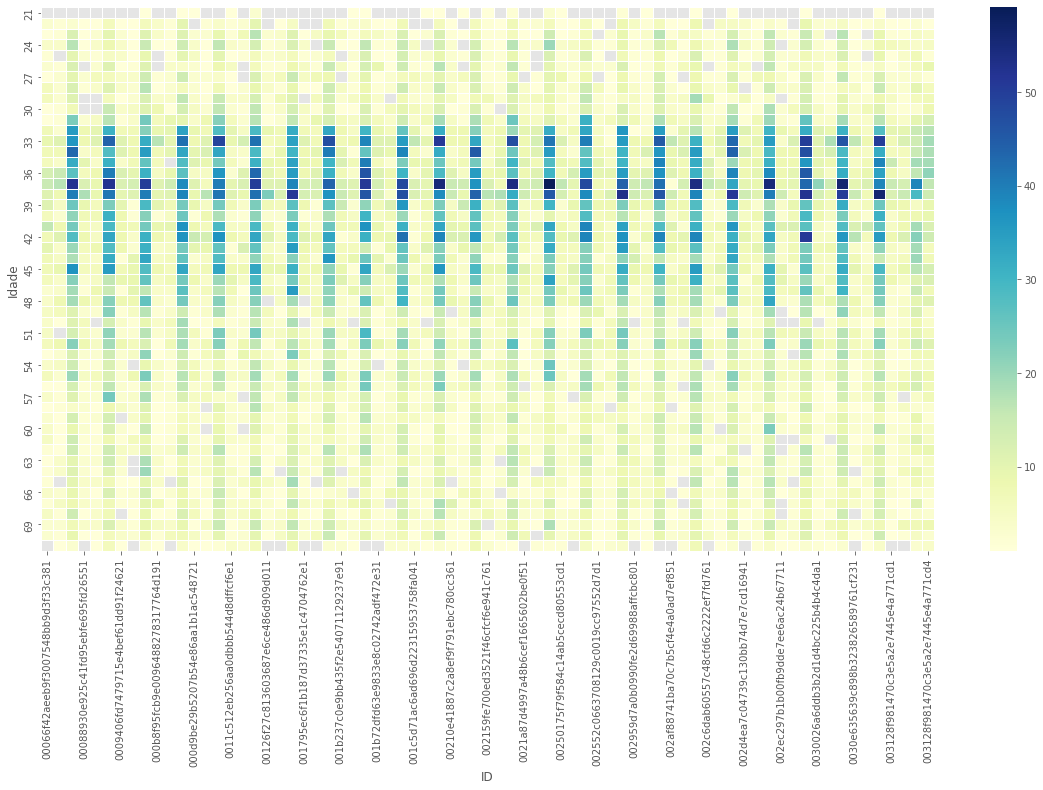

In [386]:
az = sns.heatmap( data = tb1.head(70) , linewidths=1, cmap="YlGnBu")
az.figure.set_size_inches(20, 10)

# Verificando a quantidade de ocorrencias de compras do mesmo cliente no mesmo dia

In [115]:
i = 1
data_aux3[(data_aux3['Date']==data_aux3.loc[i]['Date']) & (data_aux3['ClientID']==data_aux3.loc[i]['ClientID'])]

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,Idade
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G,37


In [116]:
i = 1
ocorrencia_maior_que_um = pd.DataFrame()
ocorrencia_maior_que_um = pd.concat([ocorrencia_maior_que_um, data_aux3[i:i+1]], axis = 1)
ocorrencia_maior_que_um

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,Idade
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,14001,Curitiba,PR,6/28/1985,Homem,001b237c0e9bb435f2e54071129237e93,Thanos,G,37


In [117]:
dicionario_compras_por_dia_por_cliente = {}
ocorrencia_maior_que_um = pd.DataFrame()
for i in data_aux3.index:
    print(round( (i/data_aux3.shape[0]*100), 2 ), '% concluido')
    index_dicionario = str(data_aux3.loc[i]['Date'])+' '+str(data_aux3.loc[i]['ClientID'])
    ocorrencias = data_aux3[(data_aux3['Date']==data_aux3.loc[i]['Date']) & (data_aux3['ClientID']==data_aux3.loc[i]['ClientID'])].shape[0]
    if(ocorrencias>1):
        ocorrencia_maior_que_um = pd.concat([ocorrencia_maior_que_um, data_aux3[i:i+1]])
    dicionario_compras_por_dia_por_cliente[index_dicionario] = ocorrencias

0.0 % concluido
0.0 % concluido
0.01 % concluido
0.01 % concluido
0.01 % concluido
0.02 % concluido
0.02 % concluido
0.02 % concluido
0.02 % concluido
0.03 % concluido
0.03 % concluido
0.03 % concluido
0.04 % concluido
0.04 % concluido
0.04 % concluido
0.05 % concluido
0.05 % concluido
0.05 % concluido
0.05 % concluido
0.06 % concluido
0.06 % concluido
0.06 % concluido
0.07 % concluido
0.07 % concluido
0.07 % concluido
0.08 % concluido
0.08 % concluido
0.08 % concluido
0.09 % concluido
0.09 % concluido
0.09 % concluido
0.09 % concluido
0.1 % concluido
0.1 % concluido
0.1 % concluido
0.11 % concluido
0.11 % concluido
0.11 % concluido
0.12 % concluido
0.12 % concluido
0.12 % concluido
0.13 % concluido
0.13 % concluido
0.13 % concluido
0.13 % concluido
0.14 % concluido
0.14 % concluido
0.14 % concluido
0.15 % concluido
0.15 % concluido
0.15 % concluido
0.16 % concluido
0.16 % concluido
0.16 % concluido
0.16 % concluido
0.17 % concluido
0.17 % concluido
0.17 % concluido
0.18 % concluido
0.

1.55 % concluido
1.56 % concluido
1.56 % concluido
1.56 % concluido
1.57 % concluido
1.57 % concluido
1.57 % concluido
1.58 % concluido
1.58 % concluido
1.58 % concluido
1.58 % concluido
1.59 % concluido
1.59 % concluido
1.59 % concluido
1.6 % concluido
1.6 % concluido
1.6 % concluido
1.61 % concluido
1.61 % concluido
1.61 % concluido
1.62 % concluido
1.62 % concluido
1.62 % concluido
1.62 % concluido
1.63 % concluido
1.63 % concluido
1.63 % concluido
1.64 % concluido
1.64 % concluido
1.64 % concluido
1.65 % concluido
1.65 % concluido
1.65 % concluido
1.65 % concluido
1.66 % concluido
1.66 % concluido
1.66 % concluido
1.67 % concluido
1.67 % concluido
1.67 % concluido
1.68 % concluido
1.68 % concluido
1.68 % concluido
1.69 % concluido
1.69 % concluido
1.69 % concluido
1.69 % concluido
1.7 % concluido
1.7 % concluido
1.7 % concluido
1.71 % concluido
1.71 % concluido
1.71 % concluido
1.72 % concluido
1.72 % concluido
1.72 % concluido
1.73 % concluido
1.73 % concluido
1.73 % concluido
1.7

3.07 % concluido
3.08 % concluido
3.08 % concluido
3.08 % concluido
3.09 % concluido
3.09 % concluido
3.09 % concluido
3.1 % concluido
3.1 % concluido
3.1 % concluido
3.11 % concluido
3.11 % concluido
3.11 % concluido
3.11 % concluido
3.12 % concluido
3.12 % concluido
3.12 % concluido
3.13 % concluido
3.13 % concluido
3.13 % concluido
3.14 % concluido
3.14 % concluido
3.14 % concluido
3.14 % concluido
3.15 % concluido
3.15 % concluido
3.15 % concluido
3.16 % concluido
3.16 % concluido
3.16 % concluido
3.17 % concluido
3.17 % concluido
3.17 % concluido
3.18 % concluido
3.18 % concluido
3.18 % concluido
3.18 % concluido
3.19 % concluido
3.19 % concluido
3.19 % concluido
3.2 % concluido
3.2 % concluido
3.2 % concluido
3.21 % concluido
3.21 % concluido
3.21 % concluido
3.21 % concluido
3.22 % concluido
3.22 % concluido
3.22 % concluido
3.23 % concluido
3.23 % concluido
3.23 % concluido
3.24 % concluido
3.24 % concluido
3.24 % concluido
3.25 % concluido
3.25 % concluido
3.25 % concluido
3.2

4.61 % concluido
4.61 % concluido
4.62 % concluido
4.62 % concluido
4.62 % concluido
4.63 % concluido
4.63 % concluido
4.63 % concluido
4.63 % concluido
4.64 % concluido
4.64 % concluido
4.64 % concluido
4.65 % concluido
4.65 % concluido
4.65 % concluido
4.66 % concluido
4.66 % concluido
4.66 % concluido
4.67 % concluido
4.67 % concluido
4.67 % concluido
4.67 % concluido
4.68 % concluido
4.68 % concluido
4.68 % concluido
4.69 % concluido
4.69 % concluido
4.69 % concluido
4.7 % concluido
4.7 % concluido
4.7 % concluido
4.7 % concluido
4.71 % concluido
4.71 % concluido
4.71 % concluido
4.72 % concluido
4.72 % concluido
4.72 % concluido
4.73 % concluido
4.73 % concluido
4.73 % concluido
4.74 % concluido
4.74 % concluido
4.74 % concluido
4.74 % concluido
4.75 % concluido
4.75 % concluido
4.75 % concluido
4.76 % concluido
4.76 % concluido
4.76 % concluido
4.77 % concluido
4.77 % concluido
4.77 % concluido
4.78 % concluido
4.78 % concluido
4.78 % concluido
4.78 % concluido
4.79 % concluido
4

6.21 % concluido
6.22 % concluido
6.22 % concluido
6.22 % concluido
6.23 % concluido
6.23 % concluido
6.23 % concluido
6.23 % concluido
6.24 % concluido
6.24 % concluido
6.24 % concluido
6.25 % concluido
6.25 % concluido
6.25 % concluido
6.26 % concluido
6.26 % concluido
6.26 % concluido
6.27 % concluido
6.27 % concluido
6.27 % concluido
6.27 % concluido
6.28 % concluido
6.28 % concluido
6.28 % concluido
6.29 % concluido
6.29 % concluido
6.29 % concluido
6.3 % concluido
6.3 % concluido
6.3 % concluido
6.3 % concluido
6.31 % concluido
6.31 % concluido
6.31 % concluido
6.32 % concluido
6.32 % concluido
6.32 % concluido
6.33 % concluido
6.33 % concluido
6.33 % concluido
6.34 % concluido
6.34 % concluido
6.34 % concluido
6.34 % concluido
6.35 % concluido
6.35 % concluido
6.35 % concluido
6.36 % concluido
6.36 % concluido
6.36 % concluido
6.37 % concluido
6.37 % concluido
6.37 % concluido
6.37 % concluido
6.38 % concluido
6.38 % concluido
6.38 % concluido
6.39 % concluido
6.39 % concluido
6

7.7 % concluido
7.7 % concluido
7.71 % concluido
7.71 % concluido
7.71 % concluido
7.72 % concluido
7.72 % concluido
7.72 % concluido
7.72 % concluido
7.73 % concluido
7.73 % concluido
7.73 % concluido
7.74 % concluido
7.74 % concluido
7.74 % concluido
7.75 % concluido
7.75 % concluido
7.75 % concluido
7.76 % concluido
7.76 % concluido
7.76 % concluido
7.76 % concluido
7.77 % concluido
7.77 % concluido
7.77 % concluido
7.78 % concluido
7.78 % concluido
7.78 % concluido
7.79 % concluido
7.79 % concluido
7.79 % concluido
7.79 % concluido
7.8 % concluido
7.8 % concluido
7.8 % concluido
7.81 % concluido
7.81 % concluido
7.81 % concluido
7.82 % concluido
7.82 % concluido
7.82 % concluido
7.83 % concluido
7.83 % concluido
7.83 % concluido
7.83 % concluido
7.84 % concluido
7.84 % concluido
7.84 % concluido
7.85 % concluido
7.85 % concluido
7.85 % concluido
7.86 % concluido
7.86 % concluido
7.86 % concluido
7.86 % concluido
7.87 % concluido
7.87 % concluido
7.87 % concluido
7.88 % concluido
7.

9.28 % concluido
9.28 % concluido
9.28 % concluido
9.29 % concluido
9.29 % concluido
9.29 % concluido
9.3 % concluido
9.3 % concluido
9.3 % concluido
9.31 % concluido
9.31 % concluido
9.31 % concluido
9.32 % concluido
9.32 % concluido
9.32 % concluido
9.32 % concluido
9.33 % concluido
9.33 % concluido
9.33 % concluido
9.34 % concluido
9.34 % concluido
9.34 % concluido
9.35 % concluido
9.35 % concluido
9.35 % concluido
9.35 % concluido
9.36 % concluido
9.36 % concluido
9.36 % concluido
9.37 % concluido
9.37 % concluido
9.37 % concluido
9.38 % concluido
9.38 % concluido
9.38 % concluido
9.39 % concluido
9.39 % concluido
9.39 % concluido
9.39 % concluido
9.4 % concluido
9.4 % concluido
9.4 % concluido
9.41 % concluido
9.41 % concluido
9.41 % concluido
9.42 % concluido
9.42 % concluido
9.42 % concluido
9.43 % concluido
9.43 % concluido
9.43 % concluido
9.43 % concluido
9.44 % concluido
9.44 % concluido
9.44 % concluido
9.45 % concluido
9.45 % concluido
9.45 % concluido
9.46 % concluido
9.4

10.77 % concluido
10.78 % concluido
10.78 % concluido
10.78 % concluido
10.79 % concluido
10.79 % concluido
10.79 % concluido
10.8 % concluido
10.8 % concluido
10.8 % concluido
10.81 % concluido
10.81 % concluido
10.81 % concluido
10.81 % concluido
10.82 % concluido
10.82 % concluido
10.82 % concluido
10.83 % concluido
10.83 % concluido
10.83 % concluido
10.84 % concluido
10.84 % concluido
10.84 % concluido
10.84 % concluido
10.85 % concluido
10.85 % concluido
10.85 % concluido
10.86 % concluido
10.86 % concluido
10.86 % concluido
10.87 % concluido
10.87 % concluido
10.87 % concluido
10.88 % concluido
10.88 % concluido
10.88 % concluido
10.88 % concluido
10.89 % concluido
10.89 % concluido
10.89 % concluido
10.9 % concluido
10.9 % concluido
10.9 % concluido
10.91 % concluido
10.91 % concluido
10.91 % concluido
10.92 % concluido
10.92 % concluido
10.92 % concluido
10.92 % concluido
10.93 % concluido
10.93 % concluido
10.93 % concluido
10.94 % concluido
10.94 % concluido
10.94 % concluid

12.29 % concluido
12.29 % concluido
12.3 % concluido
12.3 % concluido
12.3 % concluido
12.3 % concluido
12.31 % concluido
12.31 % concluido
12.31 % concluido
12.32 % concluido
12.32 % concluido
12.32 % concluido
12.33 % concluido
12.33 % concluido
12.33 % concluido
12.33 % concluido
12.34 % concluido
12.34 % concluido
12.34 % concluido
12.35 % concluido
12.35 % concluido
12.35 % concluido
12.36 % concluido
12.36 % concluido
12.36 % concluido
12.37 % concluido
12.37 % concluido
12.37 % concluido
12.37 % concluido
12.38 % concluido
12.38 % concluido
12.38 % concluido
12.39 % concluido
12.39 % concluido
12.39 % concluido
12.4 % concluido
12.4 % concluido
12.4 % concluido
12.4 % concluido
12.41 % concluido
12.41 % concluido
12.41 % concluido
12.42 % concluido
12.42 % concluido
12.42 % concluido
12.43 % concluido
12.43 % concluido
12.43 % concluido
12.44 % concluido
12.44 % concluido
12.44 % concluido
12.44 % concluido
12.45 % concluido
12.45 % concluido
12.45 % concluido
12.46 % concluido


13.74 % concluido
13.74 % concluido
13.74 % concluido
13.75 % concluido
13.75 % concluido
13.75 % concluido
13.75 % concluido
13.76 % concluido
13.76 % concluido
13.76 % concluido
13.77 % concluido
13.77 % concluido
13.77 % concluido
13.78 % concluido
13.78 % concluido
13.78 % concluido
13.78 % concluido
13.79 % concluido
13.79 % concluido
13.79 % concluido
13.8 % concluido
13.8 % concluido
13.8 % concluido
13.81 % concluido
13.81 % concluido
13.81 % concluido
13.82 % concluido
13.82 % concluido
13.82 % concluido
13.82 % concluido
13.83 % concluido
13.83 % concluido
13.83 % concluido
13.84 % concluido
13.84 % concluido
13.84 % concluido
13.85 % concluido
13.85 % concluido
13.85 % concluido
13.86 % concluido
13.86 % concluido
13.86 % concluido
13.86 % concluido
13.87 % concluido
13.87 % concluido
13.87 % concluido
13.88 % concluido
13.88 % concluido
13.88 % concluido
13.89 % concluido
13.89 % concluido
13.89 % concluido
13.89 % concluido
13.9 % concluido
13.9 % concluido
13.9 % concluid

15.24 % concluido
15.25 % concluido
15.25 % concluido
15.25 % concluido
15.26 % concluido
15.26 % concluido
15.26 % concluido
15.27 % concluido
15.27 % concluido
15.27 % concluido
15.27 % concluido
15.28 % concluido
15.28 % concluido
15.28 % concluido
15.29 % concluido
15.29 % concluido
15.29 % concluido
15.3 % concluido
15.3 % concluido
15.3 % concluido
15.31 % concluido
15.31 % concluido
15.31 % concluido
15.31 % concluido
15.32 % concluido
15.32 % concluido
15.32 % concluido
15.33 % concluido
15.33 % concluido
15.33 % concluido
15.34 % concluido
15.34 % concluido
15.34 % concluido
15.35 % concluido
15.35 % concluido
15.35 % concluido
15.35 % concluido
15.36 % concluido
15.36 % concluido
15.36 % concluido
15.37 % concluido
15.37 % concluido
15.37 % concluido
15.38 % concluido
15.38 % concluido
15.38 % concluido
15.38 % concluido
15.39 % concluido
15.39 % concluido
15.39 % concluido
15.4 % concluido
15.4 % concluido
15.4 % concluido
15.41 % concluido
15.41 % concluido
15.41 % concluid

16.77 % concluido
16.77 % concluido
16.77 % concluido
16.78 % concluido
16.78 % concluido
16.78 % concluido
16.79 % concluido
16.79 % concluido
16.79 % concluido
16.8 % concluido
16.8 % concluido
16.8 % concluido
16.8 % concluido
16.81 % concluido
16.81 % concluido
16.81 % concluido
16.82 % concluido
16.82 % concluido
16.82 % concluido
16.83 % concluido
16.83 % concluido
16.83 % concluido
16.84 % concluido
16.84 % concluido
16.84 % concluido
16.84 % concluido
16.85 % concluido
16.85 % concluido
16.85 % concluido
16.86 % concluido
16.86 % concluido
16.86 % concluido
16.87 % concluido
16.87 % concluido
16.87 % concluido
16.87 % concluido
16.88 % concluido
16.88 % concluido
16.88 % concluido
16.89 % concluido
16.89 % concluido
16.89 % concluido
16.9 % concluido
16.9 % concluido
16.9 % concluido
16.91 % concluido
16.91 % concluido
16.91 % concluido
16.91 % concluido
16.92 % concluido
16.92 % concluido
16.92 % concluido
16.93 % concluido
16.93 % concluido
16.93 % concluido
16.94 % concluido

18.17 % concluido
18.17 % concluido
18.18 % concluido
18.18 % concluido
18.18 % concluido
18.18 % concluido
18.19 % concluido
18.19 % concluido
18.19 % concluido
18.2 % concluido
18.2 % concluido
18.2 % concluido
18.21 % concluido
18.21 % concluido
18.21 % concluido
18.22 % concluido
18.22 % concluido
18.22 % concluido
18.22 % concluido
18.23 % concluido
18.23 % concluido
18.23 % concluido
18.24 % concluido
18.24 % concluido
18.24 % concluido
18.25 % concluido
18.25 % concluido
18.25 % concluido
18.25 % concluido
18.26 % concluido
18.26 % concluido
18.26 % concluido
18.27 % concluido
18.27 % concluido
18.27 % concluido
18.28 % concluido
18.28 % concluido
18.28 % concluido
18.29 % concluido
18.29 % concluido
18.29 % concluido
18.29 % concluido
18.3 % concluido
18.3 % concluido
18.3 % concluido
18.31 % concluido
18.31 % concluido
18.31 % concluido
18.32 % concluido
18.32 % concluido
18.32 % concluido
18.33 % concluido
18.33 % concluido
18.33 % concluido
18.33 % concluido
18.34 % concluid

19.63 % concluido
19.63 % concluido
19.63 % concluido
19.64 % concluido
19.64 % concluido
19.64 % concluido
19.65 % concluido
19.65 % concluido
19.65 % concluido
19.66 % concluido
19.66 % concluido
19.66 % concluido
19.67 % concluido
19.67 % concluido
19.67 % concluido
19.67 % concluido
19.68 % concluido
19.68 % concluido
19.68 % concluido
19.69 % concluido
19.69 % concluido
19.69 % concluido
19.7 % concluido
19.7 % concluido
19.7 % concluido
19.71 % concluido
19.71 % concluido
19.71 % concluido
19.71 % concluido
19.72 % concluido
19.72 % concluido
19.72 % concluido
19.73 % concluido
19.73 % concluido
19.73 % concluido
19.74 % concluido
19.74 % concluido
19.74 % concluido
19.74 % concluido
19.75 % concluido
19.75 % concluido
19.75 % concluido
19.76 % concluido
19.76 % concluido
19.76 % concluido
19.77 % concluido
19.77 % concluido
19.77 % concluido
19.78 % concluido
19.78 % concluido
19.78 % concluido
19.78 % concluido
19.79 % concluido
19.79 % concluido
19.79 % concluido
19.8 % conclu

21.1 % concluido
21.11 % concluido
21.11 % concluido
21.11 % concluido
21.12 % concluido
21.12 % concluido
21.12 % concluido
21.12 % concluido
21.13 % concluido
21.13 % concluido
21.13 % concluido
21.14 % concluido
21.14 % concluido
21.14 % concluido
21.15 % concluido
21.15 % concluido
21.15 % concluido
21.16 % concluido
21.16 % concluido
21.16 % concluido
21.16 % concluido
21.17 % concluido
21.17 % concluido
21.17 % concluido
21.18 % concluido
21.18 % concluido
21.18 % concluido
21.19 % concluido
21.19 % concluido
21.19 % concluido
21.2 % concluido
21.2 % concluido
21.2 % concluido
21.2 % concluido
21.21 % concluido
21.21 % concluido
21.21 % concluido
21.22 % concluido
21.22 % concluido
21.22 % concluido
21.23 % concluido
21.23 % concluido
21.23 % concluido
21.23 % concluido
21.24 % concluido
21.24 % concluido
21.24 % concluido
21.25 % concluido
21.25 % concluido
21.25 % concluido
21.26 % concluido
21.26 % concluido
21.26 % concluido
21.27 % concluido
21.27 % concluido
21.27 % conclui

22.54 % concluido
22.54 % concluido
22.54 % concluido
22.54 % concluido
22.55 % concluido
22.55 % concluido
22.55 % concluido
22.56 % concluido
22.56 % concluido
22.56 % concluido
22.57 % concluido
22.57 % concluido
22.57 % concluido
22.58 % concluido
22.58 % concluido
22.58 % concluido
22.58 % concluido
22.59 % concluido
22.59 % concluido
22.59 % concluido
22.6 % concluido
22.6 % concluido
22.6 % concluido
22.61 % concluido
22.61 % concluido
22.61 % concluido
22.61 % concluido
22.62 % concluido
22.62 % concluido
22.62 % concluido
22.63 % concluido
22.63 % concluido
22.63 % concluido
22.64 % concluido
22.64 % concluido
22.64 % concluido
22.65 % concluido
22.65 % concluido
22.65 % concluido
22.65 % concluido
22.66 % concluido
22.66 % concluido
22.66 % concluido
22.67 % concluido
22.67 % concluido
22.67 % concluido
22.68 % concluido
22.68 % concluido
22.68 % concluido
22.68 % concluido
22.69 % concluido
22.69 % concluido
22.69 % concluido
22.7 % concluido
22.7 % concluido
22.7 % concluid

24.02 % concluido
24.02 % concluido
24.02 % concluido
24.03 % concluido
24.03 % concluido
24.03 % concluido
24.03 % concluido
24.04 % concluido
24.04 % concluido
24.04 % concluido
24.05 % concluido
24.05 % concluido
24.05 % concluido
24.06 % concluido
24.06 % concluido
24.06 % concluido
24.06 % concluido
24.07 % concluido
24.07 % concluido
24.07 % concluido
24.08 % concluido
24.08 % concluido
24.08 % concluido
24.09 % concluido
24.09 % concluido
24.09 % concluido
24.1 % concluido
24.1 % concluido
24.1 % concluido
24.1 % concluido
24.11 % concluido
24.11 % concluido
24.11 % concluido
24.12 % concluido
24.12 % concluido
24.12 % concluido
24.13 % concluido
24.13 % concluido
24.13 % concluido
24.14 % concluido
24.14 % concluido
24.14 % concluido
24.14 % concluido
24.15 % concluido
24.15 % concluido
24.15 % concluido
24.16 % concluido
24.16 % concluido
24.16 % concluido
24.17 % concluido
24.17 % concluido
24.17 % concluido
24.17 % concluido
24.18 % concluido
24.18 % concluido
24.18 % conclu

25.46 % concluido
25.47 % concluido
25.47 % concluido
25.47 % concluido
25.48 % concluido
25.48 % concluido
25.48 % concluido
25.48 % concluido
25.49 % concluido
25.49 % concluido
25.49 % concluido
25.5 % concluido
25.5 % concluido
25.5 % concluido
25.51 % concluido
25.51 % concluido
25.51 % concluido
25.52 % concluido
25.52 % concluido
25.52 % concluido
25.52 % concluido
25.53 % concluido
25.53 % concluido
25.53 % concluido
25.54 % concluido
25.54 % concluido
25.54 % concluido
25.55 % concluido
25.55 % concluido
25.55 % concluido
25.55 % concluido
25.56 % concluido
25.56 % concluido
25.56 % concluido
25.57 % concluido
25.57 % concluido
25.57 % concluido
25.58 % concluido
25.58 % concluido
25.58 % concluido
25.59 % concluido
25.59 % concluido
25.59 % concluido
25.59 % concluido
25.6 % concluido
25.6 % concluido
25.6 % concluido
25.61 % concluido
25.61 % concluido
25.61 % concluido
25.62 % concluido
25.62 % concluido
25.62 % concluido
25.63 % concluido
25.63 % concluido
25.63 % concluid

26.94 % concluido
26.94 % concluido
26.94 % concluido
26.95 % concluido
26.95 % concluido
26.95 % concluido
26.96 % concluido
26.96 % concluido
26.96 % concluido
26.97 % concluido
26.97 % concluido
26.97 % concluido
26.97 % concluido
26.98 % concluido
26.98 % concluido
26.98 % concluido
26.99 % concluido
26.99 % concluido
26.99 % concluido
27.0 % concluido
27.0 % concluido
27.0 % concluido
27.01 % concluido
27.01 % concluido
27.01 % concluido
27.01 % concluido
27.02 % concluido
27.02 % concluido
27.02 % concluido
27.03 % concluido
27.03 % concluido
27.03 % concluido
27.04 % concluido
27.04 % concluido
27.04 % concluido
27.04 % concluido
27.05 % concluido
27.05 % concluido
27.05 % concluido
27.06 % concluido
27.06 % concluido
27.06 % concluido
27.07 % concluido
27.07 % concluido
27.07 % concluido
27.08 % concluido
27.08 % concluido
27.08 % concluido
27.08 % concluido
27.09 % concluido
27.09 % concluido
27.09 % concluido
27.1 % concluido
27.1 % concluido
27.1 % concluido
27.11 % concluid

28.41 % concluido
28.41 % concluido
28.41 % concluido
28.42 % concluido
28.42 % concluido
28.42 % concluido
28.42 % concluido
28.43 % concluido
28.43 % concluido
28.43 % concluido
28.44 % concluido
28.44 % concluido
28.44 % concluido
28.45 % concluido
28.45 % concluido
28.45 % concluido
28.46 % concluido
28.46 % concluido
28.46 % concluido
28.46 % concluido
28.47 % concluido
28.47 % concluido
28.47 % concluido
28.48 % concluido
28.48 % concluido
28.48 % concluido
28.49 % concluido
28.49 % concluido
28.49 % concluido
28.5 % concluido
28.5 % concluido
28.5 % concluido
28.5 % concluido
28.51 % concluido
28.51 % concluido
28.51 % concluido
28.52 % concluido
28.52 % concluido
28.52 % concluido
28.53 % concluido
28.53 % concluido
28.53 % concluido
28.53 % concluido
28.54 % concluido
28.54 % concluido
28.54 % concluido
28.55 % concluido
28.55 % concluido
28.55 % concluido
28.56 % concluido
28.56 % concluido
28.56 % concluido
28.57 % concluido
28.57 % concluido
28.57 % concluido
28.57 % conclu

29.9 % concluido
29.9 % concluido
29.91 % concluido
29.91 % concluido
29.91 % concluido
29.91 % concluido
29.92 % concluido
29.92 % concluido
29.92 % concluido
29.93 % concluido
29.93 % concluido
29.93 % concluido
29.94 % concluido
29.94 % concluido
29.94 % concluido
29.95 % concluido
29.95 % concluido
29.95 % concluido
29.95 % concluido
29.96 % concluido
29.96 % concluido
29.96 % concluido
29.97 % concluido
29.97 % concluido
29.97 % concluido
29.98 % concluido
29.98 % concluido
29.98 % concluido
29.99 % concluido
29.99 % concluido
29.99 % concluido
29.99 % concluido
30.0 % concluido
30.0 % concluido
30.0 % concluido
30.01 % concluido
30.01 % concluido
30.01 % concluido
30.02 % concluido
30.02 % concluido
30.02 % concluido
30.02 % concluido
30.03 % concluido
30.03 % concluido
30.03 % concluido
30.04 % concluido
30.04 % concluido
30.04 % concluido
30.05 % concluido
30.05 % concluido
30.05 % concluido
30.06 % concluido
30.06 % concluido
30.06 % concluido
30.06 % concluido
30.07 % conclui

31.31 % concluido
31.31 % concluido
31.32 % concluido
31.32 % concluido
31.32 % concluido
31.33 % concluido
31.33 % concluido
31.33 % concluido
31.33 % concluido
31.34 % concluido
31.34 % concluido
31.34 % concluido
31.35 % concluido
31.35 % concluido
31.35 % concluido
31.36 % concluido
31.36 % concluido
31.36 % concluido
31.37 % concluido
31.37 % concluido
31.37 % concluido
31.37 % concluido
31.38 % concluido
31.38 % concluido
31.38 % concluido
31.39 % concluido
31.39 % concluido
31.39 % concluido
31.4 % concluido
31.4 % concluido
31.4 % concluido
31.4 % concluido
31.41 % concluido
31.41 % concluido
31.41 % concluido
31.42 % concluido
31.42 % concluido
31.42 % concluido
31.43 % concluido
31.43 % concluido
31.43 % concluido
31.44 % concluido
31.44 % concluido
31.44 % concluido
31.44 % concluido
31.45 % concluido
31.45 % concluido
31.45 % concluido
31.46 % concluido
31.46 % concluido
31.46 % concluido
31.47 % concluido
31.47 % concluido
31.47 % concluido
31.47 % concluido
31.48 % conclu

32.75 % concluido
32.75 % concluido
32.75 % concluido
32.76 % concluido
32.76 % concluido
32.76 % concluido
32.77 % concluido
32.77 % concluido
32.77 % concluido
32.78 % concluido
32.78 % concluido
32.78 % concluido
32.78 % concluido
32.79 % concluido
32.79 % concluido
32.79 % concluido
32.8 % concluido
32.8 % concluido
32.8 % concluido
32.81 % concluido
32.81 % concluido
32.81 % concluido
32.82 % concluido
32.82 % concluido
32.82 % concluido
32.82 % concluido
32.83 % concluido
32.83 % concluido
32.83 % concluido
32.84 % concluido
32.84 % concluido
32.84 % concluido
32.85 % concluido
32.85 % concluido
32.85 % concluido
32.86 % concluido
32.86 % concluido
32.86 % concluido
32.86 % concluido
32.87 % concluido
32.87 % concluido
32.87 % concluido
32.88 % concluido
32.88 % concluido
32.88 % concluido
32.89 % concluido
32.89 % concluido
32.89 % concluido
32.89 % concluido
32.9 % concluido
32.9 % concluido
32.9 % concluido
32.91 % concluido
32.91 % concluido
32.91 % concluido
32.92 % concluid

34.27 % concluido
34.27 % concluido
34.27 % concluido
34.28 % concluido
34.28 % concluido
34.28 % concluido
34.29 % concluido
34.29 % concluido
34.29 % concluido
34.3 % concluido
34.3 % concluido
34.3 % concluido
34.31 % concluido
34.31 % concluido
34.31 % concluido
34.31 % concluido
34.32 % concluido
34.32 % concluido
34.32 % concluido
34.33 % concluido
34.33 % concluido
34.33 % concluido
34.34 % concluido
34.34 % concluido
34.34 % concluido
34.34 % concluido
34.35 % concluido
34.35 % concluido
34.35 % concluido
34.36 % concluido
34.36 % concluido
34.36 % concluido
34.37 % concluido
34.37 % concluido
34.37 % concluido
34.38 % concluido
34.38 % concluido
34.38 % concluido
34.38 % concluido
34.39 % concluido
34.39 % concluido
34.39 % concluido
34.4 % concluido
34.4 % concluido
34.4 % concluido
34.41 % concluido
34.41 % concluido
34.41 % concluido
34.42 % concluido
34.42 % concluido
34.42 % concluido
34.42 % concluido
34.43 % concluido
34.43 % concluido
34.43 % concluido
34.44 % concluid

35.83 % concluido
35.84 % concluido
35.84 % concluido
35.84 % concluido
35.85 % concluido
35.85 % concluido
35.85 % concluido
35.86 % concluido
35.86 % concluido
35.86 % concluido
35.87 % concluido
35.87 % concluido
35.87 % concluido
35.87 % concluido
35.88 % concluido
35.88 % concluido
35.88 % concluido
35.89 % concluido
35.89 % concluido
35.89 % concluido
35.9 % concluido
35.9 % concluido
35.9 % concluido
35.91 % concluido
35.91 % concluido
35.91 % concluido
35.91 % concluido
35.92 % concluido
35.92 % concluido
35.92 % concluido
35.93 % concluido
35.93 % concluido
35.93 % concluido
35.94 % concluido
35.94 % concluido
35.94 % concluido
35.94 % concluido
35.95 % concluido
35.95 % concluido
35.95 % concluido
35.96 % concluido
35.96 % concluido
35.96 % concluido
35.97 % concluido
35.97 % concluido
35.97 % concluido
35.98 % concluido
35.98 % concluido
35.98 % concluido
35.98 % concluido
35.99 % concluido
35.99 % concluido
35.99 % concluido
36.0 % concluido
36.0 % concluido
36.0 % concluid

37.3 % concluido
37.3 % concluido
37.31 % concluido
37.31 % concluido
37.31 % concluido
37.32 % concluido
37.32 % concluido
37.32 % concluido
37.32 % concluido
37.33 % concluido
37.33 % concluido
37.33 % concluido
37.34 % concluido
37.34 % concluido
37.34 % concluido
37.35 % concluido
37.35 % concluido
37.35 % concluido
37.36 % concluido
37.36 % concluido
37.36 % concluido
37.36 % concluido
37.37 % concluido
37.37 % concluido
37.37 % concluido
37.38 % concluido
37.38 % concluido
37.38 % concluido
37.39 % concluido
37.39 % concluido
37.39 % concluido
37.4 % concluido
37.4 % concluido
37.4 % concluido
37.4 % concluido
37.41 % concluido
37.41 % concluido
37.41 % concluido
37.42 % concluido
37.42 % concluido
37.42 % concluido
37.43 % concluido
37.43 % concluido
37.43 % concluido
37.43 % concluido
37.44 % concluido
37.44 % concluido
37.44 % concluido
37.45 % concluido
37.45 % concluido
37.45 % concluido
37.46 % concluido
37.46 % concluido
37.46 % concluido
37.47 % concluido
37.47 % concluid

38.91 % concluido
38.92 % concluido
38.92 % concluido
38.92 % concluido
38.92 % concluido
38.93 % concluido
38.93 % concluido
38.93 % concluido
38.94 % concluido
38.94 % concluido
38.94 % concluido
38.95 % concluido
38.95 % concluido
38.95 % concluido
38.96 % concluido
38.96 % concluido
38.96 % concluido
38.96 % concluido
38.97 % concluido
38.97 % concluido
38.97 % concluido
38.98 % concluido
38.98 % concluido
38.98 % concluido
38.99 % concluido
38.99 % concluido
38.99 % concluido
38.99 % concluido
39.0 % concluido
39.0 % concluido
39.0 % concluido
39.01 % concluido
39.01 % concluido
39.01 % concluido
39.02 % concluido
39.02 % concluido
39.02 % concluido
39.03 % concluido
39.03 % concluido
39.03 % concluido
39.03 % concluido
39.04 % concluido
39.04 % concluido
39.04 % concluido
39.05 % concluido
39.05 % concluido
39.05 % concluido
39.06 % concluido
39.06 % concluido
39.06 % concluido
39.07 % concluido
39.07 % concluido
39.07 % concluido
39.07 % concluido
39.08 % concluido
39.08 % concl

40.49 % concluido
40.49 % concluido
40.5 % concluido
40.5 % concluido
40.5 % concluido
40.51 % concluido
40.51 % concluido
40.51 % concluido
40.52 % concluido
40.52 % concluido
40.52 % concluido
40.52 % concluido
40.53 % concluido
40.53 % concluido
40.53 % concluido
40.54 % concluido
40.54 % concluido
40.54 % concluido
40.55 % concluido
40.55 % concluido
40.55 % concluido
40.56 % concluido
40.56 % concluido
40.56 % concluido
40.56 % concluido
40.57 % concluido
40.57 % concluido
40.57 % concluido
40.58 % concluido
40.58 % concluido
40.58 % concluido
40.59 % concluido
40.59 % concluido
40.59 % concluido
40.59 % concluido
40.6 % concluido
40.6 % concluido
40.6 % concluido
40.61 % concluido
40.61 % concluido
40.61 % concluido
40.62 % concluido
40.62 % concluido
40.62 % concluido
40.63 % concluido
40.63 % concluido
40.63 % concluido
40.63 % concluido
40.64 % concluido
40.64 % concluido
40.64 % concluido
40.65 % concluido
40.65 % concluido
40.65 % concluido
40.66 % concluido
40.66 % concluid

41.98 % concluido
41.98 % concluido
41.99 % concluido
41.99 % concluido
41.99 % concluido
42.0 % concluido
42.0 % concluido
42.0 % concluido
42.01 % concluido
42.01 % concluido
42.01 % concluido
42.01 % concluido
42.02 % concluido
42.02 % concluido
42.02 % concluido
42.03 % concluido
42.03 % concluido
42.03 % concluido
42.04 % concluido
42.04 % concluido
42.04 % concluido
42.05 % concluido
42.05 % concluido
42.05 % concluido
42.05 % concluido
42.06 % concluido
42.06 % concluido
42.06 % concluido
42.07 % concluido
42.07 % concluido
42.07 % concluido
42.08 % concluido
42.08 % concluido
42.08 % concluido
42.08 % concluido
42.09 % concluido
42.09 % concluido
42.09 % concluido
42.1 % concluido
42.1 % concluido
42.1 % concluido
42.11 % concluido
42.11 % concluido
42.11 % concluido
42.12 % concluido
42.12 % concluido
42.12 % concluido
42.12 % concluido
42.13 % concluido
42.13 % concluido
42.13 % concluido
42.14 % concluido
42.14 % concluido
42.14 % concluido
42.15 % concluido
42.15 % concluid

43.48 % concluido
43.48 % concluido
43.49 % concluido
43.49 % concluido
43.49 % concluido
43.5 % concluido
43.5 % concluido
43.5 % concluido
43.5 % concluido
43.51 % concluido
43.51 % concluido
43.51 % concluido
43.52 % concluido
43.52 % concluido
43.52 % concluido
43.53 % concluido
43.53 % concluido
43.53 % concluido
43.53 % concluido
43.54 % concluido
43.54 % concluido
43.54 % concluido
43.55 % concluido
43.55 % concluido
43.55 % concluido
43.56 % concluido
43.56 % concluido
43.56 % concluido
43.57 % concluido
43.57 % concluido
43.57 % concluido
43.57 % concluido
43.58 % concluido
43.58 % concluido
43.58 % concluido
43.59 % concluido
43.59 % concluido
43.59 % concluido
43.6 % concluido
43.6 % concluido
43.6 % concluido
43.61 % concluido
43.61 % concluido
43.61 % concluido
43.61 % concluido
43.62 % concluido
43.62 % concluido
43.62 % concluido
43.63 % concluido
43.63 % concluido
43.63 % concluido
43.64 % concluido
43.64 % concluido
43.64 % concluido
43.64 % concluido
43.65 % concluido

44.88 % concluido
44.88 % concluido
44.89 % concluido
44.89 % concluido
44.89 % concluido
44.9 % concluido
44.9 % concluido
44.9 % concluido
44.91 % concluido
44.91 % concluido
44.91 % concluido
44.91 % concluido
44.92 % concluido
44.92 % concluido
44.92 % concluido
44.93 % concluido
44.93 % concluido
44.93 % concluido
44.94 % concluido
44.94 % concluido
44.94 % concluido
44.95 % concluido
44.95 % concluido
44.95 % concluido
44.95 % concluido
44.96 % concluido
44.96 % concluido
44.96 % concluido
44.97 % concluido
44.97 % concluido
44.97 % concluido
44.98 % concluido
44.98 % concluido
44.98 % concluido
44.99 % concluido
44.99 % concluido
44.99 % concluido
44.99 % concluido
45.0 % concluido
45.0 % concluido
45.0 % concluido
45.01 % concluido
45.01 % concluido
45.01 % concluido
45.02 % concluido
45.02 % concluido
45.02 % concluido
45.02 % concluido
45.03 % concluido
45.03 % concluido
45.03 % concluido
45.04 % concluido
45.04 % concluido
45.04 % concluido
45.05 % concluido
45.05 % concluid

46.41 % concluido
46.42 % concluido
46.42 % concluido
46.42 % concluido
46.43 % concluido
46.43 % concluido
46.43 % concluido
46.44 % concluido
46.44 % concluido
46.44 % concluido
46.44 % concluido
46.45 % concluido
46.45 % concluido
46.45 % concluido
46.46 % concluido
46.46 % concluido
46.46 % concluido
46.47 % concluido
46.47 % concluido
46.47 % concluido
46.48 % concluido
46.48 % concluido
46.48 % concluido
46.48 % concluido
46.49 % concluido
46.49 % concluido
46.49 % concluido
46.5 % concluido
46.5 % concluido
46.5 % concluido
46.51 % concluido
46.51 % concluido
46.51 % concluido
46.51 % concluido
46.52 % concluido
46.52 % concluido
46.52 % concluido
46.53 % concluido
46.53 % concluido
46.53 % concluido
46.54 % concluido
46.54 % concluido
46.54 % concluido
46.55 % concluido
46.55 % concluido
46.55 % concluido
46.55 % concluido
46.56 % concluido
46.56 % concluido
46.56 % concluido
46.57 % concluido
46.57 % concluido
46.57 % concluido
46.58 % concluido
46.58 % concluido
46.58 % concl

47.92 % concluido
47.93 % concluido
47.93 % concluido
47.93 % concluido
47.93 % concluido
47.94 % concluido
47.94 % concluido
47.94 % concluido
47.95 % concluido
47.95 % concluido
47.95 % concluido
47.96 % concluido
47.96 % concluido
47.96 % concluido
47.97 % concluido
47.97 % concluido
47.97 % concluido
47.97 % concluido
47.98 % concluido
47.98 % concluido
47.98 % concluido
47.99 % concluido
47.99 % concluido
47.99 % concluido
48.0 % concluido
48.0 % concluido
48.0 % concluido
48.0 % concluido
48.01 % concluido
48.01 % concluido
48.01 % concluido
48.02 % concluido
48.02 % concluido
48.02 % concluido
48.03 % concluido
48.03 % concluido
48.03 % concluido
48.04 % concluido
48.04 % concluido
48.04 % concluido
48.04 % concluido
48.05 % concluido
48.05 % concluido
48.05 % concluido
48.06 % concluido
48.06 % concluido
48.06 % concluido
48.07 % concluido
48.07 % concluido
48.07 % concluido
48.07 % concluido
48.08 % concluido
48.08 % concluido
48.08 % concluido
48.09 % concluido
48.09 % conclu

49.45 % concluido
49.46 % concluido
49.46 % concluido
49.46 % concluido
49.46 % concluido
49.47 % concluido
49.47 % concluido
49.47 % concluido
49.48 % concluido
49.48 % concluido
49.48 % concluido
49.49 % concluido
49.49 % concluido
49.49 % concluido
49.49 % concluido
49.5 % concluido
49.5 % concluido
49.5 % concluido
49.51 % concluido
49.51 % concluido
49.51 % concluido
49.52 % concluido
49.52 % concluido
49.52 % concluido
49.53 % concluido
49.53 % concluido
49.53 % concluido
49.53 % concluido
49.54 % concluido
49.54 % concluido
49.54 % concluido
49.55 % concluido
49.55 % concluido
49.55 % concluido
49.56 % concluido
49.56 % concluido
49.56 % concluido
49.56 % concluido
49.57 % concluido
49.57 % concluido
49.57 % concluido
49.58 % concluido
49.58 % concluido
49.58 % concluido
49.59 % concluido
49.59 % concluido
49.59 % concluido
49.6 % concluido
49.6 % concluido
49.6 % concluido
49.6 % concluido
49.61 % concluido
49.61 % concluido
49.61 % concluido
49.62 % concluido
49.62 % concluido

50.85 % concluido
50.86 % concluido
50.86 % concluido
50.86 % concluido
50.87 % concluido
50.87 % concluido
50.87 % concluido
50.87 % concluido
50.88 % concluido
50.88 % concluido
50.88 % concluido
50.89 % concluido
50.89 % concluido
50.89 % concluido
50.9 % concluido
50.9 % concluido
50.9 % concluido
50.91 % concluido
50.91 % concluido
50.91 % concluido
50.91 % concluido
50.92 % concluido
50.92 % concluido
50.92 % concluido
50.93 % concluido
50.93 % concluido
50.93 % concluido
50.94 % concluido
50.94 % concluido
50.94 % concluido
50.94 % concluido
50.95 % concluido
50.95 % concluido
50.95 % concluido
50.96 % concluido
50.96 % concluido
50.96 % concluido
50.97 % concluido
50.97 % concluido
50.97 % concluido
50.98 % concluido
50.98 % concluido
50.98 % concluido
50.98 % concluido
50.99 % concluido
50.99 % concluido
50.99 % concluido
51.0 % concluido
51.0 % concluido
51.0 % concluido
51.01 % concluido
51.01 % concluido
51.01 % concluido
51.02 % concluido
51.02 % concluido
51.02 % concluid

52.39 % concluido
52.39 % concluido
52.39 % concluido
52.4 % concluido
52.4 % concluido
52.4 % concluido
52.4 % concluido
52.41 % concluido
52.41 % concluido
52.41 % concluido
52.42 % concluido
52.42 % concluido
52.42 % concluido
52.43 % concluido
52.43 % concluido
52.43 % concluido
52.43 % concluido
52.44 % concluido
52.44 % concluido
52.44 % concluido
52.45 % concluido
52.45 % concluido
52.45 % concluido
52.46 % concluido
52.46 % concluido
52.46 % concluido
52.47 % concluido
52.47 % concluido
52.47 % concluido
52.47 % concluido
52.48 % concluido
52.48 % concluido
52.48 % concluido
52.49 % concluido
52.49 % concluido
52.49 % concluido
52.5 % concluido
52.5 % concluido
52.5 % concluido
52.51 % concluido
52.51 % concluido
52.51 % concluido
52.51 % concluido
52.52 % concluido
52.52 % concluido
52.52 % concluido
52.53 % concluido
52.53 % concluido
52.53 % concluido
52.54 % concluido
52.54 % concluido
52.54 % concluido
52.54 % concluido
52.55 % concluido
52.55 % concluido
52.55 % concluido

53.96 % concluido
53.96 % concluido
53.96 % concluido
53.97 % concluido
53.97 % concluido
53.97 % concluido
53.98 % concluido
53.98 % concluido
53.98 % concluido
53.99 % concluido
53.99 % concluido
53.99 % concluido
54.0 % concluido
54.0 % concluido
54.0 % concluido
54.0 % concluido
54.01 % concluido
54.01 % concluido
54.01 % concluido
54.02 % concluido
54.02 % concluido
54.02 % concluido
54.03 % concluido
54.03 % concluido
54.03 % concluido
54.03 % concluido
54.04 % concluido
54.04 % concluido
54.04 % concluido
54.05 % concluido
54.05 % concluido
54.05 % concluido
54.06 % concluido
54.06 % concluido
54.06 % concluido
54.07 % concluido
54.07 % concluido
54.07 % concluido
54.07 % concluido
54.08 % concluido
54.08 % concluido
54.08 % concluido
54.09 % concluido
54.09 % concluido
54.09 % concluido
54.1 % concluido
54.1 % concluido
54.1 % concluido
54.1 % concluido
54.11 % concluido
54.11 % concluido
54.11 % concluido
54.12 % concluido
54.12 % concluido
54.12 % concluido
54.13 % concluido


55.46 % concluido
55.47 % concluido
55.47 % concluido
55.47 % concluido
55.48 % concluido
55.48 % concluido
55.48 % concluido
55.48 % concluido
55.49 % concluido
55.49 % concluido
55.49 % concluido
55.5 % concluido
55.5 % concluido
55.5 % concluido
55.51 % concluido
55.51 % concluido
55.51 % concluido
55.52 % concluido
55.52 % concluido
55.52 % concluido
55.52 % concluido
55.53 % concluido
55.53 % concluido
55.53 % concluido
55.54 % concluido
55.54 % concluido
55.54 % concluido
55.55 % concluido
55.55 % concluido
55.55 % concluido
55.56 % concluido
55.56 % concluido
55.56 % concluido
55.56 % concluido
55.57 % concluido
55.57 % concluido
55.57 % concluido
55.58 % concluido
55.58 % concluido
55.58 % concluido
55.59 % concluido
55.59 % concluido
55.59 % concluido
55.59 % concluido
55.6 % concluido
55.6 % concluido
55.6 % concluido
55.61 % concluido
55.61 % concluido
55.61 % concluido
55.62 % concluido
55.62 % concluido
55.62 % concluido
55.63 % concluido
55.63 % concluido
55.63 % concluid

56.93 % concluido
56.93 % concluido
56.94 % concluido
56.94 % concluido
56.94 % concluido
56.94 % concluido
56.95 % concluido
56.95 % concluido
56.95 % concluido
56.96 % concluido
56.96 % concluido
56.96 % concluido
56.97 % concluido
56.97 % concluido
56.97 % concluido
56.97 % concluido
56.98 % concluido
56.98 % concluido
56.98 % concluido
56.99 % concluido
56.99 % concluido
56.99 % concluido
57.0 % concluido
57.0 % concluido
57.0 % concluido
57.01 % concluido
57.01 % concluido
57.01 % concluido
57.01 % concluido
57.02 % concluido
57.02 % concluido
57.02 % concluido
57.03 % concluido
57.03 % concluido
57.03 % concluido
57.04 % concluido
57.04 % concluido
57.04 % concluido
57.05 % concluido
57.05 % concluido
57.05 % concluido
57.05 % concluido
57.06 % concluido
57.06 % concluido
57.06 % concluido
57.07 % concluido
57.07 % concluido
57.07 % concluido
57.08 % concluido
57.08 % concluido
57.08 % concluido
57.08 % concluido
57.09 % concluido
57.09 % concluido
57.09 % concluido
57.1 % conclu

58.46 % concluido
58.47 % concluido
58.47 % concluido
58.47 % concluido
58.48 % concluido
58.48 % concluido
58.48 % concluido
58.49 % concluido
58.49 % concluido
58.49 % concluido
58.5 % concluido
58.5 % concluido
58.5 % concluido
58.5 % concluido
58.51 % concluido
58.51 % concluido
58.51 % concluido
58.52 % concluido
58.52 % concluido
58.52 % concluido
58.53 % concluido
58.53 % concluido
58.53 % concluido
58.54 % concluido
58.54 % concluido
58.54 % concluido
58.54 % concluido
58.55 % concluido
58.55 % concluido
58.55 % concluido
58.56 % concluido
58.56 % concluido
58.56 % concluido
58.57 % concluido
58.57 % concluido
58.57 % concluido
58.57 % concluido
58.58 % concluido
58.58 % concluido
58.58 % concluido
58.59 % concluido
58.59 % concluido
58.59 % concluido
58.6 % concluido
58.6 % concluido
58.6 % concluido
58.61 % concluido
58.61 % concluido
58.61 % concluido
58.61 % concluido
58.62 % concluido
58.62 % concluido
58.62 % concluido
58.63 % concluido
58.63 % concluido
58.63 % concluido

59.91 % concluido
59.91 % concluido
59.92 % concluido
59.92 % concluido
59.92 % concluido
59.92 % concluido
59.93 % concluido
59.93 % concluido
59.93 % concluido
59.94 % concluido
59.94 % concluido
59.94 % concluido
59.95 % concluido
59.95 % concluido
59.95 % concluido
59.95 % concluido
59.96 % concluido
59.96 % concluido
59.96 % concluido
59.97 % concluido
59.97 % concluido
59.97 % concluido
59.98 % concluido
59.98 % concluido
59.98 % concluido
59.99 % concluido
59.99 % concluido
59.99 % concluido
59.99 % concluido
60.0 % concluido
60.0 % concluido
60.0 % concluido
60.01 % concluido
60.01 % concluido
60.01 % concluido
60.02 % concluido
60.02 % concluido
60.02 % concluido
60.03 % concluido
60.03 % concluido
60.03 % concluido
60.03 % concluido
60.04 % concluido
60.04 % concluido
60.04 % concluido
60.05 % concluido
60.05 % concluido
60.05 % concluido
60.06 % concluido
60.06 % concluido
60.06 % concluido
60.06 % concluido
60.07 % concluido
60.07 % concluido
60.07 % concluido
60.08 % concl

61.35 % concluido
61.36 % concluido
61.36 % concluido
61.36 % concluido
61.37 % concluido
61.37 % concluido
61.37 % concluido
61.37 % concluido
61.38 % concluido
61.38 % concluido
61.38 % concluido
61.39 % concluido
61.39 % concluido
61.39 % concluido
61.4 % concluido
61.4 % concluido
61.4 % concluido
61.41 % concluido
61.41 % concluido
61.41 % concluido
61.41 % concluido
61.42 % concluido
61.42 % concluido
61.42 % concluido
61.43 % concluido
61.43 % concluido
61.43 % concluido
61.44 % concluido
61.44 % concluido
61.44 % concluido
61.44 % concluido
61.45 % concluido
61.45 % concluido
61.45 % concluido
61.46 % concluido
61.46 % concluido
61.46 % concluido
61.47 % concluido
61.47 % concluido
61.47 % concluido
61.48 % concluido
61.48 % concluido
61.48 % concluido
61.48 % concluido
61.49 % concluido
61.49 % concluido
61.49 % concluido
61.5 % concluido
61.5 % concluido
61.5 % concluido
61.51 % concluido
61.51 % concluido
61.51 % concluido
61.51 % concluido
61.52 % concluido
61.52 % concluid

62.78 % concluido
62.78 % concluido
62.79 % concluido
62.79 % concluido
62.79 % concluido
62.79 % concluido
62.8 % concluido
62.8 % concluido
62.8 % concluido
62.81 % concluido
62.81 % concluido
62.81 % concluido
62.82 % concluido
62.82 % concluido
62.82 % concluido
62.82 % concluido
62.83 % concluido
62.83 % concluido
62.83 % concluido
62.84 % concluido
62.84 % concluido
62.84 % concluido
62.85 % concluido
62.85 % concluido
62.85 % concluido
62.86 % concluido
62.86 % concluido
62.86 % concluido
62.86 % concluido
62.87 % concluido
62.87 % concluido
62.87 % concluido
62.88 % concluido
62.88 % concluido
62.88 % concluido
62.89 % concluido
62.89 % concluido
62.89 % concluido
62.9 % concluido
62.9 % concluido
62.9 % concluido
62.9 % concluido
62.91 % concluido
62.91 % concluido
62.91 % concluido
62.92 % concluido
62.92 % concluido
62.92 % concluido
62.93 % concluido
62.93 % concluido
62.93 % concluido
62.93 % concluido
62.94 % concluido
62.94 % concluido
62.94 % concluido
62.95 % concluido

64.21 % concluido
64.22 % concluido
64.22 % concluido
64.22 % concluido
64.23 % concluido
64.23 % concluido
64.23 % concluido
64.24 % concluido
64.24 % concluido
64.24 % concluido
64.24 % concluido
64.25 % concluido
64.25 % concluido
64.25 % concluido
64.26 % concluido
64.26 % concluido
64.26 % concluido
64.27 % concluido
64.27 % concluido
64.27 % concluido
64.28 % concluido
64.28 % concluido
64.28 % concluido
64.28 % concluido
64.29 % concluido
64.29 % concluido
64.29 % concluido
64.3 % concluido
64.3 % concluido
64.3 % concluido
64.31 % concluido
64.31 % concluido
64.31 % concluido
64.31 % concluido
64.32 % concluido
64.32 % concluido
64.32 % concluido
64.33 % concluido
64.33 % concluido
64.33 % concluido
64.34 % concluido
64.34 % concluido
64.34 % concluido
64.35 % concluido
64.35 % concluido
64.35 % concluido
64.35 % concluido
64.36 % concluido
64.36 % concluido
64.36 % concluido
64.37 % concluido
64.37 % concluido
64.37 % concluido
64.38 % concluido
64.38 % concluido
64.38 % concl

65.64 % concluido
65.64 % concluido
65.65 % concluido
65.65 % concluido
65.65 % concluido
65.66 % concluido
65.66 % concluido
65.66 % concluido
65.66 % concluido
65.67 % concluido
65.67 % concluido
65.67 % concluido
65.68 % concluido
65.68 % concluido
65.68 % concluido
65.69 % concluido
65.69 % concluido
65.69 % concluido
65.69 % concluido
65.7 % concluido
65.7 % concluido
65.7 % concluido
65.71 % concluido
65.71 % concluido
65.71 % concluido
65.72 % concluido
65.72 % concluido
65.72 % concluido
65.73 % concluido
65.73 % concluido
65.73 % concluido
65.73 % concluido
65.74 % concluido
65.74 % concluido
65.74 % concluido
65.75 % concluido
65.75 % concluido
65.75 % concluido
65.76 % concluido
65.76 % concluido
65.76 % concluido
65.76 % concluido
65.77 % concluido
65.77 % concluido
65.77 % concluido
65.78 % concluido
65.78 % concluido
65.78 % concluido
65.79 % concluido
65.79 % concluido
65.79 % concluido
65.8 % concluido
65.8 % concluido
65.8 % concluido
65.8 % concluido
65.81 % concluido

67.09 % concluido
67.09 % concluido
67.1 % concluido
67.1 % concluido
67.1 % concluido
67.11 % concluido
67.11 % concluido
67.11 % concluido
67.11 % concluido
67.12 % concluido
67.12 % concluido
67.12 % concluido
67.13 % concluido
67.13 % concluido
67.13 % concluido
67.14 % concluido
67.14 % concluido
67.14 % concluido
67.14 % concluido
67.15 % concluido
67.15 % concluido
67.15 % concluido
67.16 % concluido
67.16 % concluido
67.16 % concluido
67.17 % concluido
67.17 % concluido
67.17 % concluido
67.18 % concluido
67.18 % concluido
67.18 % concluido
67.18 % concluido
67.19 % concluido
67.19 % concluido
67.19 % concluido
67.2 % concluido
67.2 % concluido
67.2 % concluido
67.21 % concluido
67.21 % concluido
67.21 % concluido
67.22 % concluido
67.22 % concluido
67.22 % concluido
67.22 % concluido
67.23 % concluido
67.23 % concluido
67.23 % concluido
67.24 % concluido
67.24 % concluido
67.24 % concluido
67.25 % concluido
67.25 % concluido
67.25 % concluido
67.25 % concluido
67.26 % concluid

68.55 % concluido
68.55 % concluido
68.55 % concluido
68.56 % concluido
68.56 % concluido
68.56 % concluido
68.56 % concluido
68.57 % concluido
68.57 % concluido
68.57 % concluido
68.58 % concluido
68.58 % concluido
68.58 % concluido
68.59 % concluido
68.59 % concluido
68.59 % concluido
68.6 % concluido
68.6 % concluido
68.6 % concluido
68.6 % concluido
68.61 % concluido
68.61 % concluido
68.61 % concluido
68.62 % concluido
68.62 % concluido
68.62 % concluido
68.63 % concluido
68.63 % concluido
68.63 % concluido
68.63 % concluido
68.64 % concluido
68.64 % concluido
68.64 % concluido
68.65 % concluido
68.65 % concluido
68.65 % concluido
68.66 % concluido
68.66 % concluido
68.66 % concluido
68.67 % concluido
68.67 % concluido
68.67 % concluido
68.67 % concluido
68.68 % concluido
68.68 % concluido
68.68 % concluido
68.69 % concluido
68.69 % concluido
68.69 % concluido
68.7 % concluido
68.7 % concluido
68.7 % concluido
68.71 % concluido
68.71 % concluido
68.71 % concluido
68.71 % concluido

70.01 % concluido
70.01 % concluido
70.01 % concluido
70.01 % concluido
70.02 % concluido
70.02 % concluido
70.02 % concluido
70.03 % concluido
70.03 % concluido
70.03 % concluido
70.04 % concluido
70.04 % concluido
70.04 % concluido
70.05 % concluido
70.05 % concluido
70.05 % concluido
70.05 % concluido
70.06 % concluido
70.06 % concluido
70.06 % concluido
70.07 % concluido
70.07 % concluido
70.07 % concluido
70.08 % concluido
70.08 % concluido
70.08 % concluido
70.09 % concluido
70.09 % concluido
70.09 % concluido
70.09 % concluido
70.1 % concluido
70.1 % concluido
70.1 % concluido
70.11 % concluido
70.11 % concluido
70.11 % concluido
70.12 % concluido
70.12 % concluido
70.12 % concluido
70.12 % concluido
70.13 % concluido
70.13 % concluido
70.13 % concluido
70.14 % concluido
70.14 % concluido
70.14 % concluido
70.15 % concluido
70.15 % concluido
70.15 % concluido
70.16 % concluido
70.16 % concluido
70.16 % concluido
70.16 % concluido
70.17 % concluido
70.17 % concluido
70.17 % concl

71.55 % concluido
71.55 % concluido
71.56 % concluido
71.56 % concluido
71.56 % concluido
71.57 % concluido
71.57 % concluido
71.57 % concluido
71.58 % concluido
71.58 % concluido
71.58 % concluido
71.58 % concluido
71.59 % concluido
71.59 % concluido
71.59 % concluido
71.6 % concluido
71.6 % concluido
71.6 % concluido
71.61 % concluido
71.61 % concluido
71.61 % concluido
71.61 % concluido
71.62 % concluido
71.62 % concluido
71.62 % concluido
71.63 % concluido
71.63 % concluido
71.63 % concluido
71.64 % concluido
71.64 % concluido
71.64 % concluido
71.65 % concluido
71.65 % concluido
71.65 % concluido
71.65 % concluido
71.66 % concluido
71.66 % concluido
71.66 % concluido
71.67 % concluido
71.67 % concluido
71.67 % concluido
71.68 % concluido
71.68 % concluido
71.68 % concluido
71.69 % concluido
71.69 % concluido
71.69 % concluido
71.69 % concluido
71.7 % concluido
71.7 % concluido
71.7 % concluido
71.71 % concluido
71.71 % concluido
71.71 % concluido
71.72 % concluido
71.72 % concluid

72.99 % concluido
72.99 % concluido
73.0 % concluido
73.0 % concluido
73.0 % concluido
73.01 % concluido
73.01 % concluido
73.01 % concluido
73.02 % concluido
73.02 % concluido
73.02 % concluido
73.03 % concluido
73.03 % concluido
73.03 % concluido
73.03 % concluido
73.04 % concluido
73.04 % concluido
73.04 % concluido
73.05 % concluido
73.05 % concluido
73.05 % concluido
73.06 % concluido
73.06 % concluido
73.06 % concluido
73.07 % concluido
73.07 % concluido
73.07 % concluido
73.07 % concluido
73.08 % concluido
73.08 % concluido
73.08 % concluido
73.09 % concluido
73.09 % concluido
73.09 % concluido
73.1 % concluido
73.1 % concluido
73.1 % concluido
73.1 % concluido
73.11 % concluido
73.11 % concluido
73.11 % concluido
73.12 % concluido
73.12 % concluido
73.12 % concluido
73.13 % concluido
73.13 % concluido
73.13 % concluido
73.14 % concluido
73.14 % concluido
73.14 % concluido
73.14 % concluido
73.15 % concluido
73.15 % concluido
73.15 % concluido
73.16 % concluido
73.16 % concluido

74.44 % concluido
74.45 % concluido
74.45 % concluido
74.45 % concluido
74.45 % concluido
74.46 % concluido
74.46 % concluido
74.46 % concluido
74.47 % concluido
74.47 % concluido
74.47 % concluido
74.48 % concluido
74.48 % concluido
74.48 % concluido
74.48 % concluido
74.49 % concluido
74.49 % concluido
74.49 % concluido
74.5 % concluido
74.5 % concluido
74.5 % concluido
74.51 % concluido
74.51 % concluido
74.51 % concluido
74.52 % concluido
74.52 % concluido
74.52 % concluido
74.52 % concluido
74.53 % concluido
74.53 % concluido
74.53 % concluido
74.54 % concluido
74.54 % concluido
74.54 % concluido
74.55 % concluido
74.55 % concluido
74.55 % concluido
74.56 % concluido
74.56 % concluido
74.56 % concluido
74.56 % concluido
74.57 % concluido
74.57 % concluido
74.57 % concluido
74.58 % concluido
74.58 % concluido
74.58 % concluido
74.59 % concluido
74.59 % concluido
74.59 % concluido
74.59 % concluido
74.6 % concluido
74.6 % concluido
74.6 % concluido
74.61 % concluido
74.61 % concluid

75.87 % concluido
75.88 % concluido
75.88 % concluido
75.88 % concluido
75.89 % concluido
75.89 % concluido
75.89 % concluido
75.9 % concluido
75.9 % concluido
75.9 % concluido
75.9 % concluido
75.91 % concluido
75.91 % concluido
75.91 % concluido
75.92 % concluido
75.92 % concluido
75.92 % concluido
75.93 % concluido
75.93 % concluido
75.93 % concluido
75.94 % concluido
75.94 % concluido
75.94 % concluido
75.94 % concluido
75.95 % concluido
75.95 % concluido
75.95 % concluido
75.96 % concluido
75.96 % concluido
75.96 % concluido
75.97 % concluido
75.97 % concluido
75.97 % concluido
75.97 % concluido
75.98 % concluido
75.98 % concluido
75.98 % concluido
75.99 % concluido
75.99 % concluido
75.99 % concluido
76.0 % concluido
76.0 % concluido
76.0 % concluido
76.01 % concluido
76.01 % concluido
76.01 % concluido
76.01 % concluido
76.02 % concluido
76.02 % concluido
76.02 % concluido
76.03 % concluido
76.03 % concluido
76.03 % concluido
76.04 % concluido
76.04 % concluido
76.04 % concluido

77.29 % concluido
77.3 % concluido
77.3 % concluido
77.3 % concluido
77.31 % concluido
77.31 % concluido
77.31 % concluido
77.32 % concluido
77.32 % concluido
77.32 % concluido
77.32 % concluido
77.33 % concluido
77.33 % concluido
77.33 % concluido
77.34 % concluido
77.34 % concluido
77.34 % concluido
77.35 % concluido
77.35 % concluido
77.35 % concluido
77.35 % concluido
77.36 % concluido
77.36 % concluido
77.36 % concluido
77.37 % concluido
77.37 % concluido
77.37 % concluido
77.38 % concluido
77.38 % concluido
77.38 % concluido
77.39 % concluido
77.39 % concluido
77.39 % concluido
77.39 % concluido
77.4 % concluido
77.4 % concluido
77.4 % concluido
77.41 % concluido
77.41 % concluido
77.41 % concluido
77.42 % concluido
77.42 % concluido
77.42 % concluido
77.42 % concluido
77.43 % concluido
77.43 % concluido
77.43 % concluido
77.44 % concluido
77.44 % concluido
77.44 % concluido
77.45 % concluido
77.45 % concluido
77.45 % concluido
77.46 % concluido
77.46 % concluido
77.46 % concluid

78.82 % concluido
78.83 % concluido
78.83 % concluido
78.83 % concluido
78.84 % concluido
78.84 % concluido
78.84 % concluido
78.84 % concluido
78.85 % concluido
78.85 % concluido
78.85 % concluido
78.86 % concluido
78.86 % concluido
78.86 % concluido
78.87 % concluido
78.87 % concluido
78.87 % concluido
78.88 % concluido
78.88 % concluido
78.88 % concluido
78.88 % concluido
78.89 % concluido
78.89 % concluido
78.89 % concluido
78.9 % concluido
78.9 % concluido
78.9 % concluido
78.91 % concluido
78.91 % concluido
78.91 % concluido
78.91 % concluido
78.92 % concluido
78.92 % concluido
78.92 % concluido
78.93 % concluido
78.93 % concluido
78.93 % concluido
78.94 % concluido
78.94 % concluido
78.94 % concluido
78.95 % concluido
78.95 % concluido
78.95 % concluido
78.95 % concluido
78.96 % concluido
78.96 % concluido
78.96 % concluido
78.97 % concluido
78.97 % concluido
78.97 % concluido
78.98 % concluido
78.98 % concluido
78.98 % concluido
78.99 % concluido
78.99 % concluido
78.99 % concl

80.33 % concluido
80.34 % concluido
80.34 % concluido
80.34 % concluido
80.35 % concluido
80.35 % concluido
80.35 % concluido
80.36 % concluido
80.36 % concluido
80.36 % concluido
80.37 % concluido
80.37 % concluido
80.37 % concluido
80.37 % concluido
80.38 % concluido
80.38 % concluido
80.38 % concluido
80.39 % concluido
80.39 % concluido
80.39 % concluido
80.4 % concluido
80.4 % concluido
80.4 % concluido
80.4 % concluido
80.41 % concluido
80.41 % concluido
80.41 % concluido
80.42 % concluido
80.42 % concluido
80.42 % concluido
80.43 % concluido
80.43 % concluido
80.43 % concluido
80.44 % concluido
80.44 % concluido
80.44 % concluido
80.44 % concluido
80.45 % concluido
80.45 % concluido
80.45 % concluido
80.46 % concluido
80.46 % concluido
80.46 % concluido
80.47 % concluido
80.47 % concluido
80.47 % concluido
80.48 % concluido
80.48 % concluido
80.48 % concluido
80.48 % concluido
80.49 % concluido
80.49 % concluido
80.49 % concluido
80.5 % concluido
80.5 % concluido
80.5 % concluido

81.75 % concluido
81.75 % concluido
81.75 % concluido
81.76 % concluido
81.76 % concluido
81.76 % concluido
81.77 % concluido
81.77 % concluido
81.77 % concluido
81.78 % concluido
81.78 % concluido
81.78 % concluido
81.78 % concluido
81.79 % concluido
81.79 % concluido
81.79 % concluido
81.8 % concluido
81.8 % concluido
81.8 % concluido
81.81 % concluido
81.81 % concluido
81.81 % concluido
81.82 % concluido
81.82 % concluido
81.82 % concluido
81.82 % concluido
81.83 % concluido
81.83 % concluido
81.83 % concluido
81.84 % concluido
81.84 % concluido
81.84 % concluido
81.85 % concluido
81.85 % concluido
81.85 % concluido
81.86 % concluido
81.86 % concluido
81.86 % concluido
81.86 % concluido
81.87 % concluido
81.87 % concluido
81.87 % concluido
81.88 % concluido
81.88 % concluido
81.88 % concluido
81.89 % concluido
81.89 % concluido
81.89 % concluido
81.89 % concluido
81.9 % concluido
81.9 % concluido
81.9 % concluido
81.91 % concluido
81.91 % concluido
81.91 % concluido
81.92 % concluid

83.25 % concluido
83.26 % concluido
83.26 % concluido
83.26 % concluido
83.27 % concluido
83.27 % concluido
83.27 % concluido
83.27 % concluido
83.28 % concluido
83.28 % concluido
83.28 % concluido
83.29 % concluido
83.29 % concluido
83.29 % concluido
83.3 % concluido
83.3 % concluido
83.3 % concluido
83.31 % concluido
83.31 % concluido
83.31 % concluido
83.31 % concluido
83.32 % concluido
83.32 % concluido
83.32 % concluido
83.33 % concluido
83.33 % concluido
83.33 % concluido
83.34 % concluido
83.34 % concluido
83.34 % concluido
83.35 % concluido
83.35 % concluido
83.35 % concluido
83.35 % concluido
83.36 % concluido
83.36 % concluido
83.36 % concluido
83.37 % concluido
83.37 % concluido
83.37 % concluido
83.38 % concluido
83.38 % concluido
83.38 % concluido
83.38 % concluido
83.39 % concluido
83.39 % concluido
83.39 % concluido
83.4 % concluido
83.4 % concluido
83.4 % concluido
83.41 % concluido
83.41 % concluido
83.41 % concluido
83.42 % concluido
83.42 % concluido
83.42 % concluid

84.74 % concluido
84.75 % concluido
84.75 % concluido
84.75 % concluido
84.76 % concluido
84.76 % concluido
84.76 % concluido
84.76 % concluido
84.77 % concluido
84.77 % concluido
84.77 % concluido
84.78 % concluido
84.78 % concluido
84.78 % concluido
84.79 % concluido
84.79 % concluido
84.79 % concluido
84.8 % concluido
84.8 % concluido
84.8 % concluido
84.8 % concluido
84.81 % concluido
84.81 % concluido
84.81 % concluido
84.82 % concluido
84.82 % concluido
84.82 % concluido
84.83 % concluido
84.83 % concluido
84.83 % concluido
84.83 % concluido
84.84 % concluido
84.84 % concluido
84.84 % concluido
84.85 % concluido
84.85 % concluido
84.85 % concluido
84.86 % concluido
84.86 % concluido
84.86 % concluido
84.87 % concluido
84.87 % concluido
84.87 % concluido
84.87 % concluido
84.88 % concluido
84.88 % concluido
84.88 % concluido
84.89 % concluido
84.89 % concluido
84.89 % concluido
84.9 % concluido
84.9 % concluido
84.9 % concluido
84.91 % concluido
84.91 % concluido
84.91 % concluido

86.25 % concluido
86.26 % concluido
86.26 % concluido
86.26 % concluido
86.27 % concluido
86.27 % concluido
86.27 % concluido
86.28 % concluido
86.28 % concluido
86.28 % concluido
86.29 % concluido
86.29 % concluido
86.29 % concluido
86.29 % concluido
86.3 % concluido
86.3 % concluido
86.3 % concluido
86.31 % concluido
86.31 % concluido
86.31 % concluido
86.32 % concluido
86.32 % concluido
86.32 % concluido
86.32 % concluido
86.33 % concluido
86.33 % concluido
86.33 % concluido
86.34 % concluido
86.34 % concluido
86.34 % concluido
86.35 % concluido
86.35 % concluido
86.35 % concluido
86.36 % concluido
86.36 % concluido
86.36 % concluido
86.36 % concluido
86.37 % concluido
86.37 % concluido
86.37 % concluido
86.38 % concluido
86.38 % concluido
86.38 % concluido
86.39 % concluido
86.39 % concluido
86.39 % concluido
86.4 % concluido
86.4 % concluido
86.4 % concluido
86.4 % concluido
86.41 % concluido
86.41 % concluido
86.41 % concluido
86.42 % concluido
86.42 % concluido
86.42 % concluido

87.75 % concluido
87.75 % concluido
87.76 % concluido
87.76 % concluido
87.76 % concluido
87.77 % concluido
87.77 % concluido
87.77 % concluido
87.78 % concluido
87.78 % concluido
87.78 % concluido
87.78 % concluido
87.79 % concluido
87.79 % concluido
87.79 % concluido
87.8 % concluido
87.8 % concluido
87.8 % concluido
87.81 % concluido
87.81 % concluido
87.81 % concluido
87.81 % concluido
87.82 % concluido
87.82 % concluido
87.82 % concluido
87.83 % concluido
87.83 % concluido
87.83 % concluido
87.84 % concluido
87.84 % concluido
87.84 % concluido
87.85 % concluido
87.85 % concluido
87.85 % concluido
87.85 % concluido
87.86 % concluido
87.86 % concluido
87.86 % concluido
87.87 % concluido
87.87 % concluido
87.87 % concluido
87.88 % concluido
87.88 % concluido
87.88 % concluido
87.89 % concluido
87.89 % concluido
87.89 % concluido
87.89 % concluido
87.9 % concluido
87.9 % concluido
87.9 % concluido
87.91 % concluido
87.91 % concluido
87.91 % concluido
87.92 % concluido
87.92 % concluid

89.23 % concluido
89.23 % concluido
89.23 % concluido
89.23 % concluido
89.24 % concluido
89.24 % concluido
89.24 % concluido
89.25 % concluido
89.25 % concluido
89.25 % concluido
89.26 % concluido
89.26 % concluido
89.26 % concluido
89.27 % concluido
89.27 % concluido
89.27 % concluido
89.27 % concluido
89.28 % concluido
89.28 % concluido
89.28 % concluido
89.29 % concluido
89.29 % concluido
89.29 % concluido
89.3 % concluido
89.3 % concluido
89.3 % concluido
89.3 % concluido
89.31 % concluido
89.31 % concluido
89.31 % concluido
89.32 % concluido
89.32 % concluido
89.32 % concluido
89.33 % concluido
89.33 % concluido
89.33 % concluido
89.34 % concluido
89.34 % concluido
89.34 % concluido
89.34 % concluido
89.35 % concluido
89.35 % concluido
89.35 % concluido
89.36 % concluido
89.36 % concluido
89.36 % concluido
89.37 % concluido
89.37 % concluido
89.37 % concluido
89.38 % concluido
89.38 % concluido
89.38 % concluido
89.38 % concluido
89.39 % concluido
89.39 % concluido
89.39 % conclu

90.74 % concluido
90.74 % concluido
90.74 % concluido
90.75 % concluido
90.75 % concluido
90.75 % concluido
90.76 % concluido
90.76 % concluido
90.76 % concluido
90.76 % concluido
90.77 % concluido
90.77 % concluido
90.77 % concluido
90.78 % concluido
90.78 % concluido
90.78 % concluido
90.79 % concluido
90.79 % concluido
90.79 % concluido
90.79 % concluido
90.8 % concluido
90.8 % concluido
90.8 % concluido
90.81 % concluido
90.81 % concluido
90.81 % concluido
90.82 % concluido
90.82 % concluido
90.82 % concluido
90.83 % concluido
90.83 % concluido
90.83 % concluido
90.83 % concluido
90.84 % concluido
90.84 % concluido
90.84 % concluido
90.85 % concluido
90.85 % concluido
90.85 % concluido
90.86 % concluido
90.86 % concluido
90.86 % concluido
90.86 % concluido
90.87 % concluido
90.87 % concluido
90.87 % concluido
90.88 % concluido
90.88 % concluido
90.88 % concluido
90.89 % concluido
90.89 % concluido
90.89 % concluido
90.9 % concluido
90.9 % concluido
90.9 % concluido
90.9 % concluido

92.18 % concluido
92.19 % concluido
92.19 % concluido
92.19 % concluido
92.2 % concluido
92.2 % concluido
92.2 % concluido
92.21 % concluido
92.21 % concluido
92.21 % concluido
92.21 % concluido
92.22 % concluido
92.22 % concluido
92.22 % concluido
92.23 % concluido
92.23 % concluido
92.23 % concluido
92.24 % concluido
92.24 % concluido
92.24 % concluido
92.24 % concluido
92.25 % concluido
92.25 % concluido
92.25 % concluido
92.26 % concluido
92.26 % concluido
92.26 % concluido
92.27 % concluido
92.27 % concluido
92.27 % concluido
92.28 % concluido
92.28 % concluido
92.28 % concluido
92.28 % concluido
92.29 % concluido
92.29 % concluido
92.29 % concluido
92.3 % concluido
92.3 % concluido
92.3 % concluido
92.31 % concluido
92.31 % concluido
92.31 % concluido
92.32 % concluido
92.32 % concluido
92.32 % concluido
92.32 % concluido
92.33 % concluido
92.33 % concluido
92.33 % concluido
92.34 % concluido
92.34 % concluido
92.34 % concluido
92.35 % concluido
92.35 % concluido
92.35 % concluid

93.65 % concluido
93.65 % concluido
93.65 % concluido
93.66 % concluido
93.66 % concluido
93.66 % concluido
93.66 % concluido
93.67 % concluido
93.67 % concluido
93.67 % concluido
93.68 % concluido
93.68 % concluido
93.68 % concluido
93.69 % concluido
93.69 % concluido
93.69 % concluido
93.7 % concluido
93.7 % concluido
93.7 % concluido
93.7 % concluido
93.71 % concluido
93.71 % concluido
93.71 % concluido
93.72 % concluido
93.72 % concluido
93.72 % concluido
93.73 % concluido
93.73 % concluido
93.73 % concluido
93.73 % concluido
93.74 % concluido
93.74 % concluido
93.74 % concluido
93.75 % concluido
93.75 % concluido
93.75 % concluido
93.76 % concluido
93.76 % concluido
93.76 % concluido
93.77 % concluido
93.77 % concluido
93.77 % concluido
93.77 % concluido
93.78 % concluido
93.78 % concluido
93.78 % concluido
93.79 % concluido
93.79 % concluido
93.79 % concluido
93.8 % concluido
93.8 % concluido
93.8 % concluido
93.81 % concluido
93.81 % concluido
93.81 % concluido
93.81 % concluido

95.11 % concluido
95.12 % concluido
95.12 % concluido
95.12 % concluido
95.13 % concluido
95.13 % concluido
95.13 % concluido
95.14 % concluido
95.14 % concluido
95.14 % concluido
95.15 % concluido
95.15 % concluido
95.15 % concluido
95.15 % concluido
95.16 % concluido
95.16 % concluido
95.16 % concluido
95.17 % concluido
95.17 % concluido
95.17 % concluido
95.18 % concluido
95.18 % concluido
95.18 % concluido
95.19 % concluido
95.19 % concluido
95.19 % concluido
95.19 % concluido
95.2 % concluido
95.2 % concluido
95.2 % concluido
95.21 % concluido
95.21 % concluido
95.21 % concluido
95.22 % concluido
95.22 % concluido
95.22 % concluido
95.22 % concluido
95.23 % concluido
95.23 % concluido
95.23 % concluido
95.24 % concluido
95.24 % concluido
95.24 % concluido
95.25 % concluido
95.25 % concluido
95.25 % concluido
95.26 % concluido
95.26 % concluido
95.26 % concluido
95.26 % concluido
95.27 % concluido
95.27 % concluido
95.27 % concluido
95.28 % concluido
95.28 % concluido
95.28 % concl

96.55 % concluido
96.55 % concluido
96.56 % concluido
96.56 % concluido
96.56 % concluido
96.57 % concluido
96.57 % concluido
96.57 % concluido
96.57 % concluido
96.58 % concluido
96.58 % concluido
96.58 % concluido
96.59 % concluido
96.59 % concluido
96.59 % concluido
96.6 % concluido
96.6 % concluido
96.6 % concluido
96.6 % concluido
96.61 % concluido
96.61 % concluido
96.61 % concluido
96.62 % concluido
96.62 % concluido
96.62 % concluido
96.63 % concluido
96.63 % concluido
96.63 % concluido
96.64 % concluido
96.64 % concluido
96.64 % concluido
96.64 % concluido
96.65 % concluido
96.65 % concluido
96.65 % concluido
96.66 % concluido
96.66 % concluido
96.66 % concluido
96.67 % concluido
96.67 % concluido
96.67 % concluido
96.68 % concluido
96.68 % concluido
96.68 % concluido
96.68 % concluido
96.69 % concluido
96.69 % concluido
96.69 % concluido
96.7 % concluido
96.7 % concluido
96.7 % concluido
96.71 % concluido
96.71 % concluido
96.71 % concluido
96.71 % concluido
96.72 % concluido

97.99 % concluido
98.0 % concluido
98.0 % concluido
98.0 % concluido
98.01 % concluido
98.01 % concluido
98.01 % concluido
98.02 % concluido
98.02 % concluido
98.02 % concluido
98.02 % concluido
98.03 % concluido
98.03 % concluido
98.03 % concluido
98.04 % concluido
98.04 % concluido
98.04 % concluido
98.05 % concluido
98.05 % concluido
98.05 % concluido
98.06 % concluido
98.06 % concluido
98.06 % concluido
98.06 % concluido
98.07 % concluido
98.07 % concluido
98.07 % concluido
98.08 % concluido
98.08 % concluido
98.08 % concluido
98.09 % concluido
98.09 % concluido
98.09 % concluido
98.09 % concluido
98.1 % concluido
98.1 % concluido
98.1 % concluido
98.11 % concluido
98.11 % concluido
98.11 % concluido
98.12 % concluido
98.12 % concluido
98.12 % concluido
98.13 % concluido
98.13 % concluido
98.13 % concluido
98.13 % concluido
98.14 % concluido
98.14 % concluido
98.14 % concluido
98.15 % concluido
98.15 % concluido
98.15 % concluido
98.16 % concluido
98.16 % concluido
98.16 % concluid

99.5 % concluido
99.5 % concluido
99.51 % concluido
99.51 % concluido
99.51 % concluido
99.51 % concluido
99.52 % concluido
99.52 % concluido
99.52 % concluido
99.53 % concluido
99.53 % concluido
99.53 % concluido
99.54 % concluido
99.54 % concluido
99.54 % concluido
99.55 % concluido
99.55 % concluido
99.55 % concluido
99.55 % concluido
99.56 % concluido
99.56 % concluido
99.56 % concluido
99.57 % concluido
99.57 % concluido
99.57 % concluido
99.58 % concluido
99.58 % concluido
99.58 % concluido
99.58 % concluido
99.59 % concluido
99.59 % concluido
99.59 % concluido
99.6 % concluido
99.6 % concluido
99.6 % concluido
99.61 % concluido
99.61 % concluido
99.61 % concluido
99.62 % concluido
99.62 % concluido
99.62 % concluido
99.62 % concluido
99.63 % concluido
99.63 % concluido
99.63 % concluido
99.64 % concluido
99.64 % concluido
99.64 % concluido
99.65 % concluido
99.65 % concluido
99.65 % concluido
99.65 % concluido
99.66 % concluido
99.66 % concluido
99.66 % concluido
99.67 % conclui

In [356]:
aux = dicionario_compras_por_dia_por_cliente.groupby([0]).count()
aux

,ocorrencias,Data e ClienteID
0,,
1,32639,32639
2,57,57


# Transações que foram feitas pelo mesmo cliente no mesmo dia

In [123]:
ocorrencia_maior_que_um

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,Idade
137,NaN,NaN,4b257c5e6346b9b382c18364d6bf51c3,000b8f95fcb9e0096488278317764d193,14055,"0,1","201,6",1,3,2/23/2019,14055,Porto Alegre,RS,8/26/1965,Homem,000b8f95fcb9e0096488278317764d193,Pantera Negra,G,57
138,NaN,NaN,494e5e7faa93467e7da809ca3b59c74b,002159fe700ed3521f46cfcf6e941c763,14055,"0,1","156,8",1,3,2/23/2019,14055,Porto Alegre,RS,8/26/1965,Homem,002159fe700ed3521f46cfcf6e941c763,Pokemon Go Squirtle,G,57
328,NaN,NaN,072a8923b88a4247c16f4c0bca2f3177,002af88741ba70c7b5cf4e4a0ad7ef852,14129,"0,1","134,4",1,2,11/14/2018,14129,Rio de Janeiro,RJ,8/9/1975,Homem,002af88741ba70c7b5cf4e4a0ad7ef852,Dragon Ball Z,M,47
329,NaN,NaN,4f78cf9df18b4661ea0096c43db9f402,002ec297b1b00fb9dde7ee6ac24b67713,14129,"0,1","218,4",1,2,11/14/2018,14129,Rio de Janeiro,RJ,8/9/1975,Homem,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G,47
453,NaN,NaN,a62bd4a3b6736d7f889292ee18e372a9,00210e41887c2a8ef9f791ebc780cc363,14180,"0,08",406,1,4,6/21/2019,14180,Curitiba,PR,5/8/1985,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741,NaN,NaN,38dbc93c7cdcf9081f75b317967ce3b5,002959d7a0b0990fe2d69988affcbc803,28241,"0,08","261,8",1,7,6/5/2018,28241,São Paulo,SP,1/27/1966,Homem,002959d7a0b0990fe2d69988affcbc803,Ciclope,G,56
31845,NaN,NaN,15f90e8c1633db2288d96c9338c302b6,0009406fd7479715e4bef61dd91f24623,28287,"0,08","254,8",1,1,12/5/2018,28287,Florianópolis,SC,5/3/1966,Homem,0009406fd7479715e4bef61dd91f24623,Deadpool,G,56
31846,NaN,NaN,b69bd58058e7fc58b745d22ad1c62eb6,002c6dab60557c48cfd6c2222ef7fd763,28287,"0,08","148,4",2,1,12/5/2018,28287,Florianópolis,SC,5/3/1966,Homem,002c6dab60557c48cfd6c2222ef7fd763,Darth Vader,G,56
32744,NaN,NaN,2ec3fb192c828ca618c797ccb2c22a3e,001b237c0e9bb435f2e54071129237e92,28692,"0,08","162,4",1,3,12/17/2018,28692,Porto Alegre,RS,10/19/1985,Homem,001b237c0e9bb435f2e54071129237e92,Thanos,M,37


In [124]:
ocorrencia_maior_que_um.drop_duplicates()

,Unnamed: 0,Unnamed: 1,ID_x,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,ID_y,City,State,DateOfBirth,Sex,ID,Name,Size,Idade
137,NaN,NaN,4b257c5e6346b9b382c18364d6bf51c3,000b8f95fcb9e0096488278317764d193,14055,"0,1","201,6",1,3,2/23/2019,14055,Porto Alegre,RS,8/26/1965,Homem,000b8f95fcb9e0096488278317764d193,Pantera Negra,G,57
138,NaN,NaN,494e5e7faa93467e7da809ca3b59c74b,002159fe700ed3521f46cfcf6e941c763,14055,"0,1","156,8",1,3,2/23/2019,14055,Porto Alegre,RS,8/26/1965,Homem,002159fe700ed3521f46cfcf6e941c763,Pokemon Go Squirtle,G,57
328,NaN,NaN,072a8923b88a4247c16f4c0bca2f3177,002af88741ba70c7b5cf4e4a0ad7ef852,14129,"0,1","134,4",1,2,11/14/2018,14129,Rio de Janeiro,RJ,8/9/1975,Homem,002af88741ba70c7b5cf4e4a0ad7ef852,Dragon Ball Z,M,47
329,NaN,NaN,4f78cf9df18b4661ea0096c43db9f402,002ec297b1b00fb9dde7ee6ac24b67713,14129,"0,1","218,4",1,2,11/14/2018,14129,Rio de Janeiro,RJ,8/9/1975,Homem,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G,47
453,NaN,NaN,a62bd4a3b6736d7f889292ee18e372a9,00210e41887c2a8ef9f791ebc780cc363,14180,"0,08",406,1,4,6/21/2019,14180,Curitiba,PR,5/8/1985,Homem,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741,NaN,NaN,38dbc93c7cdcf9081f75b317967ce3b5,002959d7a0b0990fe2d69988affcbc803,28241,"0,08","261,8",1,7,6/5/2018,28241,São Paulo,SP,1/27/1966,Homem,002959d7a0b0990fe2d69988affcbc803,Ciclope,G,56
31845,NaN,NaN,15f90e8c1633db2288d96c9338c302b6,0009406fd7479715e4bef61dd91f24623,28287,"0,08","254,8",1,1,12/5/2018,28287,Florianópolis,SC,5/3/1966,Homem,0009406fd7479715e4bef61dd91f24623,Deadpool,G,56
31846,NaN,NaN,b69bd58058e7fc58b745d22ad1c62eb6,002c6dab60557c48cfd6c2222ef7fd763,28287,"0,08","148,4",2,1,12/5/2018,28287,Florianópolis,SC,5/3/1966,Homem,002c6dab60557c48cfd6c2222ef7fd763,Darth Vader,G,56
32744,NaN,NaN,2ec3fb192c828ca618c797ccb2c22a3e,001b237c0e9bb435f2e54071129237e92,28692,"0,08","162,4",1,3,12/17/2018,28692,Porto Alegre,RS,10/19/1985,Homem,001b237c0e9bb435f2e54071129237e92,Thanos,M,37


# Numero de compras de cada produto por sexo

In [144]:
dicionario_quantidade_itens_ambos_sexo = {}
for j in data_aux3['Sex'].unique():
    dicionario_compras_por_sexo = {}
    for i in data_aux3['ID'].unique():
        dicionario_compras_por_sexo[i] = data_aux3[(data_aux3['ID']==i) & (data_aux3['Sex']==j)]['Quantity'].sum()
    dicionario_compras_por_sexo = pd.Series(dicionario_compras_por_sexo)
    dicionario_quantidade_itens_ambos_sexo[j] = pd.DataFrame(dicionario_compras_por_sexo, columns = [j])
contador = 0
for key in dicionario_quantidade_itens_ambos_sexo:
    if(contador != 0):
        quantidade_itens_ambos_sexo = pd.merge(quantidade_itens_ambos_sexo, dicionario_quantidade_itens_ambos_sexo[key], left_index=True, right_index=True)
    elif(contador == 0):
        quantidade_itens_ambos_sexo = dicionario_quantidade_itens_ambos_sexo[key]
    contador += 1
quantidade_itens_ambos_sexo

,Homem,Mulher
002552c0663708129c0019cc97552d7d3,837,112
001b237c0e9bb435f2e54071129237e93,869,121
00066f42aeeb9f3007548bb9d3f33c381,230,30
001b72dfd63e9833e8c02742adf472e33,828,137
00210e41887c2a8ef9f791ebc780cc363,802,110
...,...,...
001c5d71ac6ad696d22315953758fa041,206,33
002ec297b1b00fb9dde7ee6ac24b67711,189,28
0011c512eb256aa0dbbb544d8dffcf6e2,205,21
00250175f79f584c14ab5cecd80553cd2,210,21


In [145]:
dicionario_compras_ambos_sexo = {}
for j in data_aux3['Sex'].unique():
    dicionario_compras_por_sexo = {}
    for i in data_aux3['ID'].unique():
        dicionario_compras_por_sexo[i] = data_aux3[(data_aux3['ID']==i) & (data_aux3['Sex']==j)]['Quantity'].shape[0]
    dicionario_compras_por_sexo = pd.Series(dicionario_compras_por_sexo).sort_values(ascending=False)
    dicionario_compras_ambos_sexo[j] = pd.DataFrame(dicionario_compras_por_sexo, columns = [j])
contador = 0
for key in dicionario_compras_ambos_sexo:
    if(contador != 0):
        compras_ambos_sexo = pd.merge(compras_ambos_sexo, dicionario_compras_ambos_sexo[key], left_index=True, right_index=True)
    elif(contador == 0):
        compras_ambos_sexo = dicionario_compras_ambos_sexo[key]
    contador += 1
compras_ambos_sexo

,Homem,Mulher
002d4ea7c04739c130bb74d7e7cd16943,859,104
002ec297b1b00fb9dde7ee6ac24b67713,835,131
002c6dab60557c48cfd6c2222ef7fd763,835,103
00126f27c813603687e6ce486d909d013,828,105
001b237c0e9bb435f2e54071129237e93,824,111
...,...,...
0030026a6ddb3b2d1d4bc225b4b4c4da2,181,41
00066f42aeeb9f3007548bb9d3f33c382,179,29
002ec297b1b00fb9dde7ee6ac24b67711,176,26
001b237c0e9bb435f2e54071129237e92,175,22


In [146]:
aux = data_aux3[data_aux3['Sex']=='Homem'].groupby(["ID"]).size().sort_values(ascending=False)
aux1 = data_aux3[data_aux3['Sex']=='Mulher'].groupby(["ID"]).size().sort_values(ascending=False)
aux = pd.DataFrame(aux, columns = ['Homem'])
aux1 = pd.DataFrame(aux1, columns = ['Mulher'])
aux2 = pd.merge(aux, aux1, left_index=True, right_index=True)
aux2['ID_x'] = aux2.index
aux2

,Homem,Mulher,ID_x
ID,,,
002d4ea7c04739c130bb74d7e7cd16943,859,104,002d4ea7c04739c130bb74d7e7cd16943
002ec297b1b00fb9dde7ee6ac24b67713,835,131,002ec297b1b00fb9dde7ee6ac24b67713
002c6dab60557c48cfd6c2222ef7fd763,835,103,002c6dab60557c48cfd6c2222ef7fd763
00126f27c813603687e6ce486d909d013,828,105,00126f27c813603687e6ce486d909d013
001b237c0e9bb435f2e54071129237e93,824,111,001b237c0e9bb435f2e54071129237e93
...,...,...,...
002c6dab60557c48cfd6c2222ef7fd762,181,24,002c6dab60557c48cfd6c2222ef7fd762
00066f42aeeb9f3007548bb9d3f33c382,179,29,00066f42aeeb9f3007548bb9d3f33c382
002ec297b1b00fb9dde7ee6ac24b67711,176,26,002ec297b1b00fb9dde7ee6ac24b67711


In [147]:
data_aux2 = pd.DataFrame()
for j in range(len(aux2)):
    for i in range(len(data1)):
        if(data1['ID'][i] == aux2['ID_x'][j]):
            data_aux2 = pd.concat([data_aux2,data1[i:i+1]])
            break

data_aux2.index = data_aux2['ID']
data_aux2 = pd.merge(aux2, data_aux2, left_index=True, right_index=True)
data_aux2 = data_aux2[['ID', 'Name', 'Size','Homem', 'Mulher']]
data_aux2

,ID,Name,Size,Homem,Mulher
ID,,,,,
002d4ea7c04739c130bb74d7e7cd16943,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,859,104
002ec297b1b00fb9dde7ee6ac24b67713,002ec297b1b00fb9dde7ee6ac24b67713,Bazinga,G,835,131
002c6dab60557c48cfd6c2222ef7fd763,002c6dab60557c48cfd6c2222ef7fd763,Darth Vader,G,835,103
00126f27c813603687e6ce486d909d013,00126f27c813603687e6ce486d909d013,Coringa,G,828,105
001b237c0e9bb435f2e54071129237e93,001b237c0e9bb435f2e54071129237e93,Thanos,G,824,111
...,...,...,...,...,...
002c6dab60557c48cfd6c2222ef7fd762,002c6dab60557c48cfd6c2222ef7fd762,Darth Vader,M,181,24
00066f42aeeb9f3007548bb9d3f33c382,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M,179,29
002ec297b1b00fb9dde7ee6ac24b67711,002ec297b1b00fb9dde7ee6ac24b67711,Bazinga,P,176,26


# Correlação entre o numero de compras de cada produto por sexo

In [148]:
data_aux2.corr()

,Homem,Mulher
Homem,1.000000,0.979805
Mulher,0.979805,1.000000


In [149]:
for i in data_aux3.columns:
    print(i)
    print(data_aux3[i].unique())
    print(data_aux3[i].unique().size)

Unnamed: 0
[nan]
1
Unnamed: 1
[nan]
1
ID_x
['80260d682079b6090c8285b398c50d97' '3275736da1234f55d52bdf09d86b93bc'
 'f3513eec8f1434b5b7e04ddf3598df40' ... 'db9a034f34174edd577b9f64cc982952'
 'ee00fa5093eb96d8573403b382fb60a8' '56c87d433bb46c7862e35e791b1907fa']
32753
ProductID
['002552c0663708129c0019cc97552d7d3' '001b237c0e9bb435f2e54071129237e93'
 '00066f42aeeb9f3007548bb9d3f33c381' '001b72dfd63e9833e8c02742adf472e33'
 '00210e41887c2a8ef9f791ebc780cc363' '002959d7a0b0990fe2d69988affcbc803'
 '00126f27c813603687e6ce486d909d013' '001795ec6f1b187d37335e1c4704762e3'
 '001c5d71ac6ad696d22315953758fa043' '002c6dab60557c48cfd6c2222ef7fd763'
 '0021a87d4997a48b6cef1665602be0f53' '002af88741ba70c7b5cf4e4a0ad7ef853'
 '002552c0663708129c0019cc97552d7d1' '003128f981470c3e5a2e7445e4a771cd3'
 '002ec297b1b00fb9dde7ee6ac24b67713' '000b8f95fcb9e0096488278317764d193'
 '0011c512eb256aa0dbbb544d8dffcf6e3' '000d9be29b5207b54e86aa1b1ac548722'
 '00066f42aeeb9f3007548bb9d3f33c383' '002159fe700ed3521f46cfcf6e94

In [150]:
for i in data_aux3.columns:
    print(i)
    print(data_aux3[i].describe())
    print("**************************************************************************")

Unnamed: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 0, dtype: float64
**************************************************************************
Unnamed: 1
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 1, dtype: float64
**************************************************************************
ID_x
count                                32753
unique                               32753
top       80260d682079b6090c8285b398c50d97
freq                                     1
Name: ID_x, dtype: object
**************************************************************************
ProductID
count                                 32753
unique                                   73
top       002ec297b1b00fb9dde7ee6ac24b67713
freq                                    966
Name: ProductID, dtype: object
***********************************************************

In [151]:
#data_aux3['ID_x'] = data_aux3['ID_x'].str.replace(',','.').apply(pd.to_numeric)
data_aux3['Discount'] = data_aux3['Discount'].str.replace(',','.').apply(pd.to_numeric)
data_aux3['UnitPrice'] = data_aux3['UnitPrice'].str.replace(',','.').apply(pd.to_numeric)

In [152]:
data_aux3.corr()

,Unnamed: 0,Unnamed: 1,ClientID,Discount,UnitPrice,Quantity,StoreID,ID_y,Idade
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClientID,NaN,NaN,1.000000,-0.007249,0.002822,-0.009241,0.148303,1.000000,-0.005119
Discount,NaN,NaN,-0.007249,1.000000,0.002603,-0.012507,-0.002989,-0.007249,0.001662
UnitPrice,NaN,NaN,0.002822,0.002603,1.000000,0.004049,0.004705,0.002822,-0.004897
Quantity,NaN,NaN,-0.009241,-0.012507,0.004049,1.000000,0.000788,-0.009241,-0.006623
StoreID,NaN,NaN,0.148303,-0.002989,0.004705,0.000788,1.000000,0.148303,0.009855
ID_y,NaN,NaN,1.000000,-0.007249,0.002822,-0.009241,0.148303,1.000000,-0.005119
Idade,NaN,NaN,-0.005119,0.001662,-0.004897,-0.006623,0.009855,-0.005119,1.000000


In [19]:
#[''] = [''].str.replace(',','.').apply(pd.to_numeric)

In [354]:
# data_aux4 = data_aux3[['Date','Quantity']]
# data_aux4['Quantity'].unique()
# data_aux4['Date'] = pd.to_datetime(data_aux4.Date)
# data_aux4

In [266]:
dicionario = {}
for i in data_aux4['Date'].unique():
    dicionario[i] = data_aux4[data_aux4['Date'] == i]['Quantity'].sum()

data_dicionario = pd.Series(dicionario)
data_dicionario = pd.DataFrame(data_dicionario)
data_dicionario['Date'] = data_dicionario.index
data_dicionario['Date'] = pd.to_datetime(data_dicionario.Date)
data_dicionario = data_dicionario.sort_values(by = 'Date', ascending = True)
data_dicionario['month-year_column'] = data_dicionario['Date'].dt.strftime('%Y-%m')
data_dicionario.index = np.arange(0, data_dicionario.shape[0], 1, int)
data_dicionario['Date_formato_br'] = data_dicionario['Date'].dt.strftime('%d-%m-%Y')
data_dicionario

,0,Date,month-year_column,Date_formato_br
0,1,2018-03-09,2018-03,09-03-2018
1,1,2018-03-11,2018-03,11-03-2018
2,2,2018-03-15,2018-03,15-03-2018
3,1,2018-03-16,2018-03,16-03-2018
4,1,2018-03-18,2018-03,18-03-2018
...,...,...,...,...
180,1,2020-01-01,2020-01,01-01-2020
181,1,2020-01-04,2020-01,04-01-2020
182,1,2020-01-15,2020-01,15-01-2020
183,2,2020-01-20,2020-01,20-01-2020


In [264]:
dicionario = {}
for i in data_dicionario['month-year_column'].unique():
    dicionario[i] = data_dicionario[data_dicionario['month-year_column'] == i][0].sum()
data_dicionario1 = pd.Series(dicionario)
data_dicionario1 = pd.DataFrame(data_dicionario1)
data_dicionario1

,0
2018-03,8
2018-04,11
2018-05,17
2018-06,10
2018-07,18
2018-08,22
2018-09,13
2018-10,13
2018-11,19
2018-12,20


# Correlação entre o numero de vendas de cada produto ao longo do tempo:        _____  DIA A DIA, OBSERVAR: que a correlação é pequena ao contrário de mês a mês


In [276]:
data_dicionario3 = pd.DataFrame()
contador = 0
for j in data_aux3["ProductID"].unique():
    print(round((contador/(data_aux3["ProductID"].unique().shape[0])*100), 2 ), '% concluido')
    data_aux4 = data_aux3[data_aux3["ProductID"] == j]
    data_aux4 = data_aux4[['Date','Quantity']]
    
    dicionario = {}
    for i in data_aux4['Date'].unique():
        dicionario[i] = data_aux4[data_aux4['Date'] == i]['Quantity'].sum()

    data_dicionario = pd.Series(dicionario)
    data_dicionario = pd.DataFrame(data_dicionario)
    data_dicionario['Date'] = data_dicionario.index
    data_dicionario['Date'] = pd.to_datetime(data_dicionario.Date, errors='coerce')
    data_dicionario = data_dicionario.sort_values(by = 'Date', ascending = True)
    data_dicionario['month-year_column'] = data_dicionario['Date'].dt.strftime('%Y-%m')
    data_dicionario.index = np.arange(0, data_dicionario.shape[0], 1, int)
    
    dicionario = {}
    for i in data_dicionario['Date'].unique():
        dicionario[i] = data_dicionario[data_dicionario['Date'] == i][0].sum()
    data_dicionario1 = pd.Series(dicionario)
    data_dicionario1 = pd.DataFrame(data_dicionario1)
    name_column = data_aux3[data_aux3["ProductID"] == j]['Name'].unique()[0] + '-'+ data_aux3[data_aux3["ProductID"] == j]['Size'].unique()[0]
    
    data_dicionario1 = data_dicionario1.rename(columns={0: name_column})
    data_dicionario3 = pd.concat([data_dicionario1, data_dicionario3], axis=1)
    contador += 1
data_dicionario3

0.0 % concluido
1.37 % concluido
2.74 % concluido
4.11 % concluido
5.48 % concluido
6.85 % concluido
8.22 % concluido
9.59 % concluido
10.96 % concluido
12.33 % concluido
13.7 % concluido
15.07 % concluido
16.44 % concluido
17.81 % concluido
19.18 % concluido
20.55 % concluido
21.92 % concluido
23.29 % concluido
24.66 % concluido
26.03 % concluido
27.4 % concluido
28.77 % concluido
30.14 % concluido
31.51 % concluido
32.88 % concluido
34.25 % concluido
35.62 % concluido
36.99 % concluido
38.36 % concluido
39.73 % concluido
41.1 % concluido
42.47 % concluido
43.84 % concluido
45.21 % concluido
46.58 % concluido
47.95 % concluido
49.32 % concluido
50.68 % concluido
52.05 % concluido
53.42 % concluido
54.79 % concluido
56.16 % concluido
57.53 % concluido
58.9 % concluido
60.27 % concluido
61.64 % concluido
63.01 % concluido
64.38 % concluido
65.75 % concluido
67.12 % concluido
68.49 % concluido
69.86 % concluido
71.23 % concluido
72.6 % concluido
73.97 % concluido
75.34 % concluido
76.71 

,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,Pokemon Go Squirtle-M,...,Darth Vader-G,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G
2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
2018-03-02,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,1.0,1.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0
2018-03-04,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0,1.0
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,3.0,2.0,NaN,3.0,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2020-01-28,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN


In [212]:
df2 = data_dicionario3.sum(axis=1)
df2 = df2.sum(axis=0)
df2

34674.0

In [277]:
data_dicionario3['Date'] = data_dicionario3.index

In [278]:
data_dicionario3 = data_dicionario3.sort_values(by = 'Date', ascending = False)
data_dicionario3

,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,Pokemon Go Squirtle-M,...,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G,Date
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,3.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,2020-01-31
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2020-01-30
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2020-01-29
2020-01-28,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2020-01-28
2020-01-27,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,3.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,3.0,2.0,NaN,3.0,NaN,4.0,1.0,2018-03-05
2018-03-04,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0,1.0,2018-03-04
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0,2018-03-03
2018-03-02,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,1.0,1.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,2018-03-02


In [309]:
dicionario = {}
data_dicionario4 = pd.DataFrame()
for i in data_aux3['Date'].unique():
        dicionario[i] = data_aux3[data_aux3['Date'] == i]['Quantity'].sum()
data_dicionario1 = pd.Series(dicionario)
data_dicionario1 = pd.DataFrame(data_dicionario1)
data_dicionario1.index = pd.to_datetime(data_dicionario1.index)

data_dicionario1 = data_dicionario1.rename(columns={0: 'Todos'})
data_dicionario4 = pd.concat([data_dicionario1, data_dicionario3], axis=1)
#data_dicionario4 = pd.merge(data_dicionario1, data_dicionario3, left_index=True, right_index=True)
data_dicionario4

,Todos,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,...,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G,Date
2018-03-01,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,2018-03-01
2018-03-02,39,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,2018-03-02
2018-03-03,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0,2018-03-03
2018-03-04,36,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,2.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0,1.0,2018-03-04
2018-03-05,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,3.0,2.0,NaN,3.0,NaN,4.0,1.0,2018-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,18,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2020-01-27
2020-01-28,19,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2020-01-28
2020-01-29,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2020-01-29
2020-01-30,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2020-01-30


In [310]:
data_dicionario4['Todos'].sum()

34674

<AxesSubplot:>

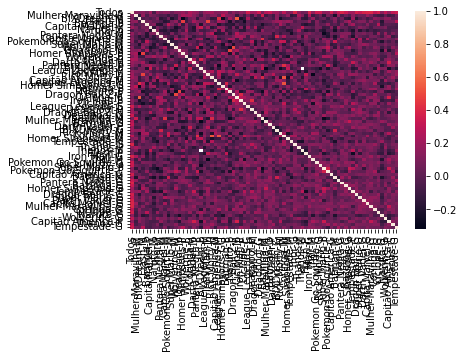

In [311]:
import seaborn as sns

#corr = data_dicionario3.iloc[:10,:10].corr()
corr = data_dicionario4.corr()
#corr = data_dicionario3.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Correlação entre o numero de vendas de cada produto ao longo do tempo:        _____  MÊS A MÊS

In [63]:
data_dicionario3 = pd.DataFrame()
contador = 0
for j in data_aux3["ProductID"].unique():
    print(round((contador/(data_aux3["ProductID"].unique().shape[0])*100), 2 ), '% concluido')
    data_aux4 = data_aux3[data_aux3["ProductID"] == j]
    data_aux4 = data_aux4[['Date','Quantity']]
    
    dicionario = {}
    for i in data_aux4['Date'].unique():
        dicionario[i] = data_aux4[data_aux4['Date'] == i]['Quantity'].sum()

    data_dicionario = pd.Series(dicionario)
    data_dicionario = pd.DataFrame(data_dicionario)
    data_dicionario['Date'] = data_dicionario.index
    data_dicionario['Date'] = pd.to_datetime(data_dicionario.Date, errors='coerce')
    data_dicionario = data_dicionario.sort_values(by = 'Date', ascending = True)
    data_dicionario['month-year_column'] = data_dicionario['Date'].dt.strftime('%Y-%m')
    data_dicionario.index = np.arange(0, data_dicionario.shape[0], 1, int)
    data_dicionario['Date_formato_br'] = data_dicionario['Date'].dt.strftime('%d-%m-%Y')
    data_dicionario
    dicionario = {}
    for i in data_dicionario['month-year_column'].unique():
        dicionario[i] = data_dicionario[data_dicionario['month-year_column'] == i][0].sum()
    data_dicionario1 = pd.Series(dicionario)
    data_dicionario1 = pd.DataFrame(data_dicionario1)
    name_column = data_aux3[data_aux3["ProductID"] == j]['Name'].unique()[0] + '-'+ data_aux3[data_aux3["ProductID"] == j]['Size'].unique()[0]
    data_dicionario1 = data_dicionario1.rename(columns={0: name_column})
    data_dicionario3 = pd.concat([data_dicionario1, data_dicionario3], axis=1)
    contador += 1
data_dicionario3

0.0 % concluido
1.37 % concluido
2.74 % concluido
4.11 % concluido
5.48 % concluido
6.85 % concluido
8.22 % concluido
9.59 % concluido
10.96 % concluido
12.33 % concluido
13.7 % concluido
15.07 % concluido
16.44 % concluido
17.81 % concluido
19.18 % concluido
20.55 % concluido
21.92 % concluido
23.29 % concluido
24.66 % concluido
26.03 % concluido
27.4 % concluido
28.77 % concluido
30.14 % concluido
31.51 % concluido
32.88 % concluido
34.25 % concluido
35.62 % concluido
36.99 % concluido
38.36 % concluido
39.73 % concluido
41.1 % concluido
42.47 % concluido
43.84 % concluido
45.21 % concluido
46.58 % concluido
47.95 % concluido
49.32 % concluido
50.68 % concluido
52.05 % concluido
53.42 % concluido
54.79 % concluido
56.16 % concluido
57.53 % concluido
58.9 % concluido
60.27 % concluido
61.64 % concluido
63.01 % concluido
64.38 % concluido
65.75 % concluido
67.12 % concluido
68.49 % concluido
69.86 % concluido
71.23 % concluido
72.6 % concluido
73.97 % concluido
75.34 % concluido
76.71 

,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,Pokemon Go Squirtle-M,...,Darth Vader-G,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G
2018-03,8,NaN,10,15,13,1.0,8,8,11,12,...,35,48,38,43,46,NaN,33,11,58,33
2018-04,11,NaN,20,14,12,NaN,10,6,14,17,...,35,54,32,42,35,6.0,42,11,48,46
2018-05,17,NaN,6,9,11,1.0,8,11,13,12,...,47,49,44,39,54,3.0,60,9,56,49
2018-06,10,NaN,10,11,16,6.0,11,15,14,11,...,65,61,46,57,64,7.0,57,15,55,56
2018-07,18,NaN,14,11,17,NaN,14,9,13,18,...,73,58,68,74,65,6.0,52,14,61,60
2018-08,22,1.0,14,13,15,NaN,13,17,11,14,...,52,55,55,63,47,6.0,52,16,53,62
2018-09,13,1.0,15,13,9,1.0,17,17,13,9,...,64,50,61,47,59,5.0,51,24,59,58
2018-10,13,NaN,10,17,11,2.0,13,14,16,15,...,45,55,62,59,43,14.0,50,19,58,59
2018-11,19,NaN,13,10,10,4.0,8,17,14,15,...,54,85,64,74,45,7.0,77,11,68,53
2018-12,20,4.0,20,17,22,4.0,30,17,11,22,...,78,77,86,71,87,8.0,80,21,85,82


In [69]:
teste_teste = pd.DataFrame(data_dicionario3['Iron Man-G'])

In [77]:
teste_teste[10:22]

,Iron Man-G
2019-01,30
2019-02,22
2019-03,27
2019-04,31
2019-05,35
2019-06,56
2019-07,38
2019-08,65
2019-09,25
2019-10,30


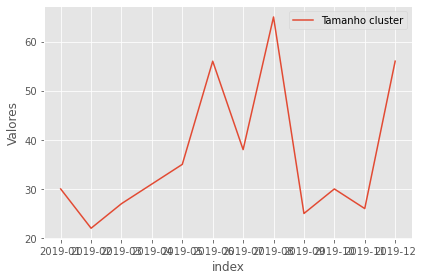

In [78]:
plt.style.use('ggplot')

fig, ax2 = plt.subplots()

ax2.plot(teste_teste[10:22].index, teste_teste[10:22]['Iron Man-G'], label='Tamanho cluster')
#ax2.plot(dicionario_tamanho1['index'], dicionario_tamanho1['1'], label='Desvio padrão')
ax2.set_ylabel('Valores')
ax2.set_xlabel('index')

#ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

In [335]:
data_aux4 = data_aux3[['Date','Quantity']]
data_aux4['Date'] = pd.to_datetime(data_aux4.Date)
data_aux4['month-year_column'] = data_aux4['Date'].dt.strftime('%Y-%m')
dicionario = {}
data_dicionario4 = pd.DataFrame()
for i in data_aux4['month-year_column'].unique():
        dicionario[i] = data_aux4[data_aux4['month-year_column'] == i]['Quantity'].sum()
data_dicionario1 = pd.Series(dicionario)
data_dicionario1 = pd.DataFrame(data_dicionario1)
data_dicionario1 = data_dicionario1.rename(columns={0: 'Todos'})

data_dicionario4 = pd.concat([data_dicionario1, data_dicionario3], axis=1)
#data_dicionario4 = pd.merge(data_dicionario1, data_dicionario3, left_index=True, right_index=True)
data_dicionario4

C:\Users\jcjcj\AppData\Local\Temp/ipykernel_9636/3176393307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux4['Date'] = pd.to_datetime(data_aux4.Date)
C:\Users\jcjcj\AppData\Local\Temp/ipykernel_9636/3176393307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux4['month-year_column'] = data_aux4['Date'].dt.strftime('%Y-%m')


,Todos,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,...,Darth Vader-G,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G
2018-12,2617,20,4.0,20,17,22,4.0,30,17,11,...,78,77,86,71,87,8.0,80,21,85,82
2019-04,1078,4,25.0,3,5,6,12.0,4,4,6,...,29,21,21,26,27,71.0,26,6,36,27
2019-07,1028,6,14.0,6,5,8,16.0,4,5,8,...,20,32,26,34,19,67.0,25,10,22,28
2018-04,1434,11,NaN,20,14,12,NaN,10,6,14,...,35,54,32,42,35,6.0,42,11,48,46
2019-01,1057,8,7.0,8,8,10,3.0,5,13,4,...,28,27,27,32,29,26.0,28,6,20,26
2019-03,1186,7,26.0,4,5,7,29.0,8,9,9,...,31,31,30,27,36,91.0,25,7,27,35
2019-08,2035,13,25.0,10,6,16,23.0,17,13,17,...,67,51,53,63,65,92.0,55,11,58,49
2019-12,1927,10,29.0,17,9,10,15.0,11,12,7,...,50,48,43,50,63,92.0,47,10,44,49
2018-06,1921,10,NaN,10,11,16,6.0,11,15,14,...,65,61,46,57,64,7.0,57,15,55,56
2018-10,1637,13,NaN,10,17,11,2.0,13,14,16,...,45,55,62,59,43,14.0,50,19,58,59


In [62]:
data_dicionario3.corr()

,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,Pokemon Go Squirtle-M,...,Darth Vader-G,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G
Mulher-Maravilha-P,1.000000,-0.349640,0.612738,0.559001,0.670366,-0.251401,0.640509,0.667609,0.522972,0.687827,...,0.738307,0.799421,0.773321,0.762227,0.661780,-0.470810,0.807677,0.608633,0.769400,0.789168
BIXDream-M,-0.349640,1.000000,-0.298292,-0.360008,-0.115580,0.788881,-0.172148,-0.254461,0.052684,-0.144576,...,-0.142661,-0.196970,-0.295507,-0.132899,-0.048885,0.942658,-0.199411,-0.483382,-0.204076,-0.250497
Flash-M,0.612738,-0.298292,1.000000,0.688332,0.641006,-0.214742,0.652930,0.560226,0.452502,0.797263,...,0.673171,0.707959,0.703635,0.706564,0.664110,-0.392246,0.660087,0.692351,0.711016,0.746030
Bazinga-P,0.559001,-0.360008,0.688332,1.000000,0.672040,-0.306523,0.649312,0.640817,0.615656,0.681120,...,0.581174,0.701751,0.728787,0.649022,0.605090,-0.429333,0.640035,0.747397,0.734681,0.723991
Capitã Marvel-P,0.670366,-0.115580,0.641006,0.672040,1.000000,-0.069493,0.812168,0.611466,0.556950,0.722748,...,0.822484,0.737323,0.753661,0.802180,0.826948,-0.249216,0.737668,0.576541,0.768657,0.801274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Naruto-G,-0.470810,0.942658,-0.392246,-0.429333,-0.249216,0.915385,-0.180797,-0.322631,-0.221313,-0.360689,...,-0.326300,-0.467473,-0.409863,-0.372623,-0.268754,1.000000,-0.419558,-0.455996,-0.484671,-0.472084
Wolverine-G,0.807677,-0.199411,0.660087,0.640035,0.737668,-0.224116,0.733089,0.782679,0.703061,0.759240,...,0.852888,0.900117,0.871754,0.861718,0.832430,-0.419558,1.000000,0.639999,0.895905,0.858843
Capitão América-P,0.608633,-0.483382,0.692351,0.747397,0.576541,-0.293942,0.731500,0.699436,0.589122,0.498670,...,0.741738,0.655377,0.823016,0.673555,0.668998,-0.455996,0.639999,1.000000,0.746843,0.812313
Thanos-G,0.769400,-0.204076,0.711016,0.734681,0.768657,-0.348807,0.764274,0.718494,0.707440,0.722373,...,0.863045,0.901565,0.892970,0.875719,0.868733,-0.484671,0.895905,0.746843,1.000000,0.902458


In [98]:
type(data_dicionario4.loc['06-2018','Thor-P'])

numpy.int64

In [336]:
# data_dicionario4 = data_dicionario3
# data_dicionario4 = data_dicionario4.fillna(0)
# data_dicionario4 = data_dicionario4.astype(int)
# data_dicionario4

In [339]:
data_dicionario4_corr = data_dicionario4.corr()
data_dicionario4_corr

,Todos,Mulher-Maravilha-P,BIXDream-M,Flash-M,Bazinga-P,Capitã Marvel-P,Naruto-M,Thor-P,Pantera Negra-M,Capitã Marvel-M,...,Darth Vader-G,Capitã Marvel-G,Mulher-Maravilha-G,Coringa-G,Ciclope-G,Naruto-G,Wolverine-G,Capitão América-P,Thanos-G,Tempestade-G
Todos,1.000000,0.772323,-0.055582,0.749589,0.688266,0.830214,-0.045244,0.829817,0.835430,0.674260,...,0.931535,0.887988,0.928252,0.927333,0.913043,-0.241884,0.907897,0.726135,0.894217,0.922854
Mulher-Maravilha-P,0.772323,1.000000,-0.349640,0.612738,0.559001,0.670366,-0.251401,0.640509,0.667609,0.522972,...,0.738307,0.799421,0.773321,0.762227,0.661780,-0.470810,0.807677,0.608633,0.769400,0.789168
BIXDream-M,-0.055582,-0.349640,1.000000,-0.298292,-0.360008,-0.115580,0.788881,-0.172148,-0.254461,0.052684,...,-0.142661,-0.196970,-0.295507,-0.132899,-0.048885,0.942658,-0.199411,-0.483382,-0.204076,-0.250497
Flash-M,0.749589,0.612738,-0.298292,1.000000,0.688332,0.641006,-0.214742,0.652930,0.560226,0.452502,...,0.673171,0.707959,0.703635,0.706564,0.664110,-0.392246,0.660087,0.692351,0.711016,0.746030
Bazinga-P,0.688266,0.559001,-0.360008,0.688332,1.000000,0.672040,-0.306523,0.649312,0.640817,0.615656,...,0.581174,0.701751,0.728787,0.649022,0.605090,-0.429333,0.640035,0.747397,0.734681,0.723991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Naruto-G,-0.241884,-0.470810,0.942658,-0.392246,-0.429333,-0.249216,0.915385,-0.180797,-0.322631,-0.221313,...,-0.326300,-0.467473,-0.409863,-0.372623,-0.268754,1.000000,-0.419558,-0.455996,-0.484671,-0.472084
Wolverine-G,0.907897,0.807677,-0.199411,0.660087,0.640035,0.737668,-0.224116,0.733089,0.782679,0.703061,...,0.852888,0.900117,0.871754,0.861718,0.832430,-0.419558,1.000000,0.639999,0.895905,0.858843
Capitão América-P,0.726135,0.608633,-0.483382,0.692351,0.747397,0.576541,-0.293942,0.731500,0.699436,0.589122,...,0.741738,0.655377,0.823016,0.673555,0.668998,-0.455996,0.639999,1.000000,0.746843,0.812313
Thanos-G,0.894217,0.769400,-0.204076,0.711016,0.734681,0.768657,-0.348807,0.764274,0.718494,0.707440,...,0.863045,0.901565,0.892970,0.875719,0.868733,-0.484671,0.895905,0.746843,1.000000,0.902458


In [340]:
data_dicionario4_corr = data_dicionario4_corr.sort_values(by=["Todos"], axis=1, ascending = False)
data_dicionario4_corr = data_dicionario4_corr.sort_values(by=["Todos"], ascending = False)
data_dicionario4_corr

,Todos,Capitão América-G,Rick Morty-G,Iron Man-G,Pantera Negra-G,Darth Vader-G,Thor-G,Mulher-Maravilha-G,Coringa-G,Dragon Ball Z-G,...,Darth Vader-M,Homer Simpsons-GG,Mulher-Maravilha-M,Iron Man-P,Naruto-M,BIXDream-M,BIXDream-P,BIXDream-G,Naruto-G,Naruto-P
Todos,1.000000,0.942134,0.940931,0.936816,0.936067,0.931535,0.929424,0.928252,0.927333,0.926782,...,0.637120,0.636089,0.605255,0.596295,-0.045244,-0.055582,-0.110104,-0.209213,-0.241884,-0.245749
Capitão América-G,0.942134,1.000000,0.888717,0.892869,0.894946,0.860176,0.920657,0.906652,0.840259,0.847902,...,0.533789,0.619673,0.421981,0.630839,-0.123709,-0.224372,-0.148319,-0.320317,-0.327335,-0.300581
Rick Morty-G,0.940931,0.888717,1.000000,0.915842,0.877380,0.915798,0.883514,0.900019,0.895131,0.900382,...,0.653370,0.726888,0.546261,0.673929,-0.209246,-0.203787,-0.317205,-0.317035,-0.405299,-0.357217
Iron Man-G,0.936816,0.892869,0.915842,1.000000,0.887988,0.893453,0.831213,0.835002,0.885068,0.928269,...,0.521624,0.613091,0.507126,0.590313,-0.052030,-0.184373,-0.128443,-0.228169,-0.269338,-0.280435
Pantera Negra-G,0.936067,0.894946,0.877380,0.887988,1.000000,0.869610,0.919537,0.917571,0.907460,0.858734,...,0.577973,0.632686,0.504593,0.580268,-0.181711,-0.259642,-0.173795,-0.360641,-0.352239,-0.416959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BIXDream-M,-0.055582,-0.224372,-0.203787,-0.184373,-0.259642,-0.142661,-0.314745,-0.295507,-0.132899,-0.092111,...,-0.012840,-0.609142,0.358459,-0.305005,0.788881,1.000000,0.759686,0.913561,0.942658,0.907792
BIXDream-P,-0.110104,-0.148319,-0.317205,-0.128443,-0.173795,-0.215079,-0.308929,-0.312564,-0.290642,-0.201880,...,-0.151246,-0.602924,-0.082071,-0.164580,0.784127,0.759686,1.000000,0.923740,0.911336,0.764988
BIXDream-G,-0.209213,-0.320317,-0.317035,-0.228169,-0.360641,-0.266472,-0.420862,-0.357041,-0.368482,-0.246665,...,-0.119074,-0.616847,0.015068,-0.212427,0.897371,0.913561,0.923740,1.000000,0.973514,0.918907
Naruto-G,-0.241884,-0.327335,-0.405299,-0.269338,-0.352239,-0.326300,-0.436842,-0.409863,-0.372623,-0.308029,...,-0.149233,-0.735929,-0.103317,-0.341647,0.915385,0.942658,0.911336,0.973514,1.000000,0.932662


<AxesSubplot:>

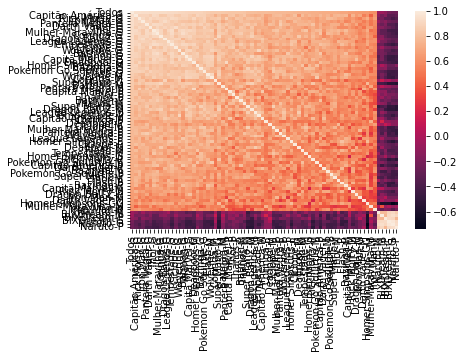

In [341]:
#corr = data_dicionario3.iloc[:10,:10].corr()
#corr = data_dicionario4.corr()
corr = data_dicionario4_corr

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Venda de todos os produtos ao longo do tempo

In [347]:
data_aux4 = data_aux3[['Date','Quantity']]
data_aux4['Date'] = pd.to_datetime(data_aux4.Date)
data_aux4['month-year_column'] = data_aux4['Date'].dt.strftime('%Y-%m')
dicionario = {}
data_dicionario4 = pd.DataFrame()
for i in data_aux4['month-year_column'].unique():
        dicionario[i] = data_aux4[data_aux4['month-year_column'] == i]['Quantity'].sum()
data_dicionario1 = pd.Series(dicionario)
data_dicionario1 = pd.DataFrame(data_dicionario1)
data_dicionario1 = data_dicionario1.rename(columns={0: 'Todos'})
data_dicionario1['month-year_column'] = data_dicionario1.index
data_dicionario1 = data_dicionario1.sort_values(by = 'month-year_column')
data_dicionario1

C:\Users\jcjcj\AppData\Local\Temp/ipykernel_9636/3359760451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux4['Date'] = pd.to_datetime(data_aux4.Date)
C:\Users\jcjcj\AppData\Local\Temp/ipykernel_9636/3359760451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux4['month-year_column'] = data_aux4['Date'].dt.strftime('%Y-%m')


,Todos,month-year_column
2018-03,1417,2018-03
2018-04,1434,2018-04
2018-05,1523,2018-05
2018-06,1921,2018-06
2018-07,2031,2018-07
2018-08,1970,2018-08
2018-09,1834,2018-09
2018-10,1637,2018-10
2018-11,2110,2018-11
2018-12,2617,2018-12


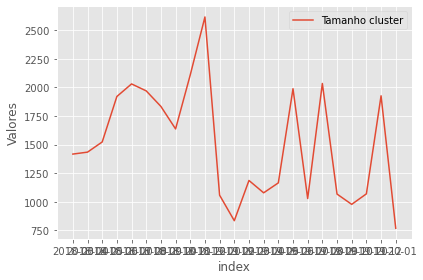

In [349]:
plt.style.use('ggplot')

fig, ax2 = plt.subplots()

ax2.plot(data_dicionario1.index, data_dicionario1['Todos'], label='Tamanho cluster')
#ax2.plot(dicionario_tamanho1['index'], dicionario_tamanho1['1'], label='Desvio padrão')
ax2.set_ylabel('Valores')
ax2.set_xlabel('index')

#ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

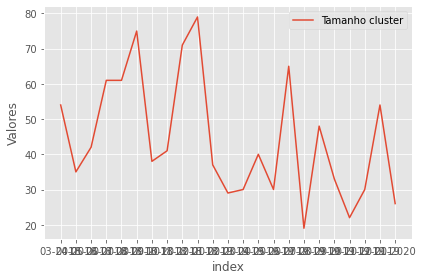

In [115]:
plt.style.use('ggplot')

fig, ax2 = plt.subplots()

ax2.plot(data_dicionario1.index, data_dicionario1[0], label='Tamanho cluster')
#ax2.plot(dicionario_tamanho1['index'], dicionario_tamanho1['1'], label='Desvio padrão')
ax2.set_ylabel('Valores')
ax2.set_xlabel('index')

#ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

In [ ]:
import datetime

#df = pd.to_datetime(data_aux3.Date, format='%Y-%m-%d %H:%M:%S')
#df['year'] = df['Date'].dt.strftime('%Y')
#df['month'] = df['Date'].dt.strftime('%m')
pd.to_datetime(data_dicionario.Date, errors='coerce')

In [4]:
def formato(born):
    if(born[3]=='0'):
        auxiliar = born[:3] + born[4:]
    else:
        auxiliar = born
    return auxiliar

In [6]:
age(formato('04/03/1993'))
#df['idade anos'] = df['idade meses'] // 12

356

In [38]:
age('04/03/1993')

356

In [47]:
def busca_arvore(ordenado, busca):
    meio_array = len(ordenado) // 2
    aux = abs(ordenado[ordenado.index[0]+meio_array]-busca)
    aux1 = abs(ordenado[ordenado.index[0]+meio_array+1]-busca)
    if(aux == 0):
        return(ordenado.index[0]+meio_array)
    elif(aux1 == 0):
        return(ordenado.index[0]+meio_array+1)
    elif(aux<aux1):
        if(ordenado[:meio_array].size>1):
            return(busca_arvore(ordenado[:meio_array], busca))
        else:
            return(ordenado.index[0])
    elif(aux>aux1):
        if(ordenado[meio_array:].size>1):
            return(busca_arvore(ordenado[meio_array:], busca))
        else:
            return(ordenado.index[0])
     

In [141]:
def busca_arvore(ordenado, busca):
    meio_array = len(ordenado) // 2
    print(ordenado.index)
    print(meio_array)
    print("meio_array:")
    #print(ordenado[meio_array])
    aux = abs(ordenado[ordenado.index[0]+meio_array]-busca)
    aux1 = abs(ordenado[ordenado.index[0]+meio_array+1]-busca)
    print("aux:")
    print(aux)
    print("aux1")
    print(aux1)
    if(aux == 0):
        print("entrou no terceiro")
        return(ordenado.index[0]+meio_array)
    elif(aux1 == 0):
        print("entrou no quarto")
        return(ordenado.index[0]+meio_array+1)
    elif(aux<aux1):
        print("entrou no primeiro")
        if(ordenado[:meio_array].size>1):
            return(busca_arvore(ordenado[:meio_array], busca))
        else:
            return(ordenado.index[0])
    elif(aux>aux1):
        print("entrou no segundo")
        if(ordenado[meio_array:].size>1):
            return(busca_arvore(ordenado[meio_array:], busca))
        else:
            return(ordenado.index[0])
    

In [ ]:
def busca_arvore(ordenado, busca):
    meio_array = ordenado.index[(len(ordenado.index) // 2)]
    print(ordenado.index)
    print(meio_array)
    print("meio_array:")